In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv('data.csv')

groups = ['CLOTHING', 'EDUCATION', 'ENTERTAINMENT', 'FINES', 'GAMBLING', 'GROCERIES', 'HEALTH', 'HOUSING', 'TAX', 'TRAVEL', 'UTILITIES']

data.drop(['CUST_ID', 'CREDIT_SCORE'], axis=1, inplace=True)
data['CAT_GAMBLING'] = data['CAT_GAMBLING'].map({'No': 0, 'High': 2, 'Low': 1})
train, test = train_test_split(data, test_size=0.2, random_state=42)


train.columns

Index(['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
       'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING',
       'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT',
       'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME',
       'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12',
       'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME',
       'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12',
       'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING',
       'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT',
       'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME',
       'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6',
       'R_HEALTH', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT',
       'T_HOUSING_12', 'T_HOUSING_6', 'R_HOUSING',

<AxesSubplot: >

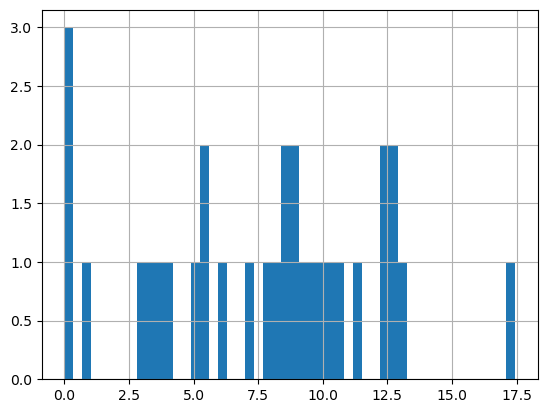

In [109]:
train[train['INCOME']==0]['R_DEBT_INCOME'].hist(bins=50)

<AxesSubplot: >

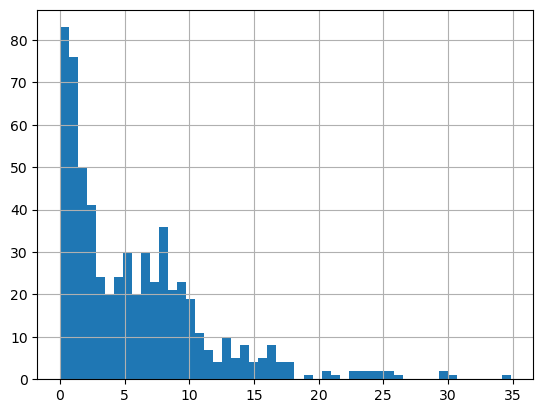

In [110]:
train[train['INCOME']!=0]['R_DEBT_INCOME'].hist(bins = 50)

<h1></h1>

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_62926/629838966.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 7))


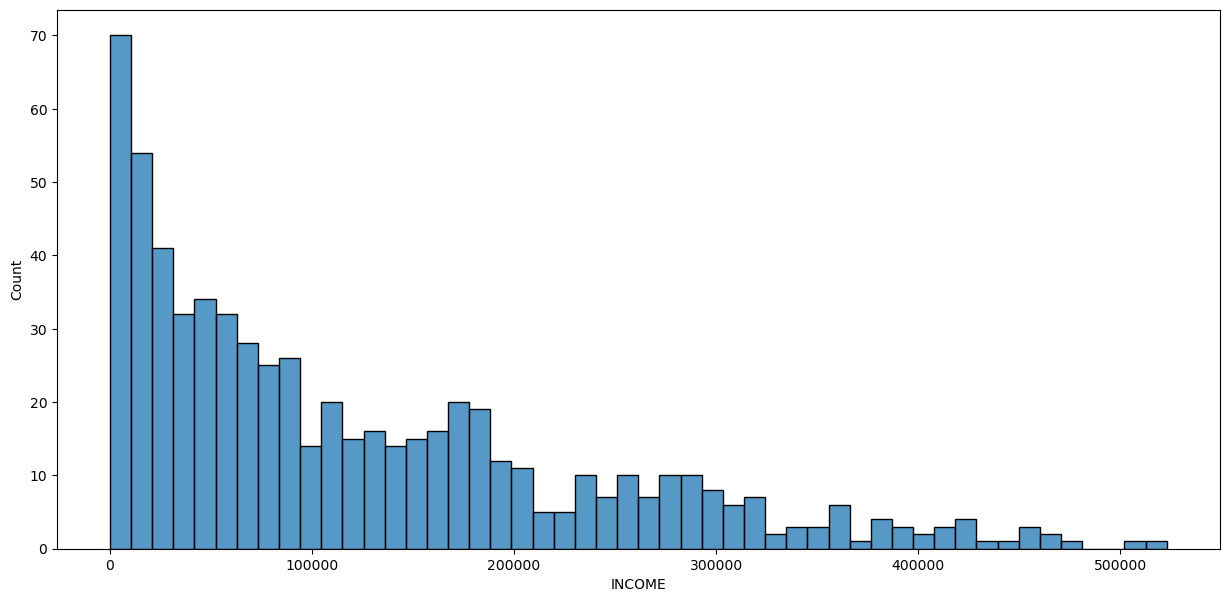

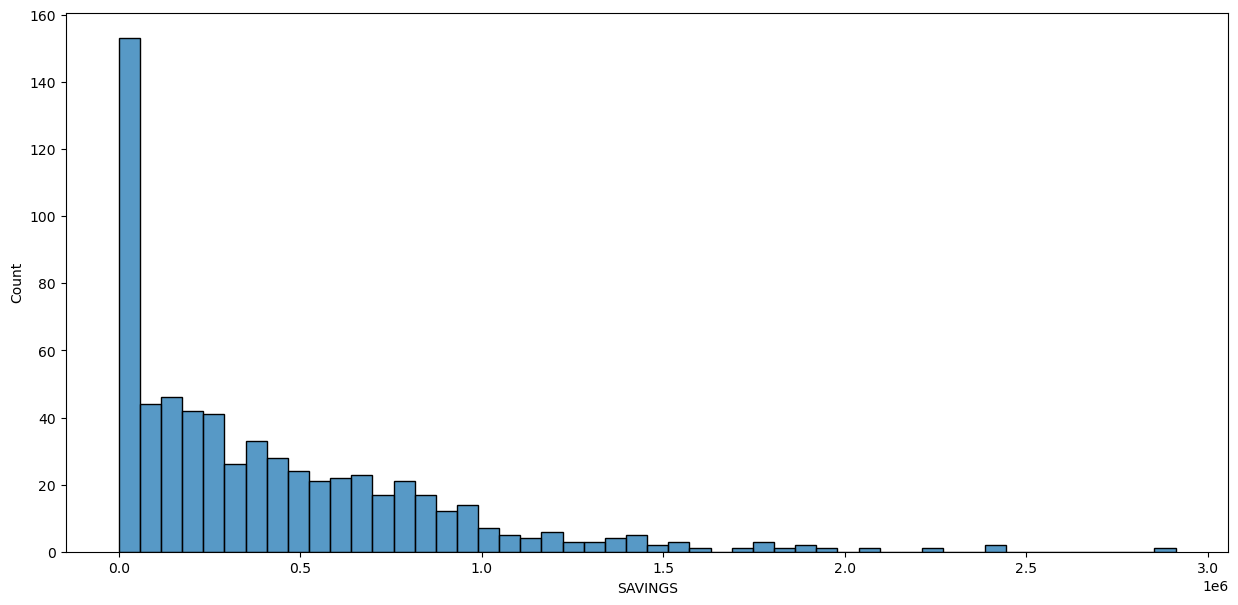

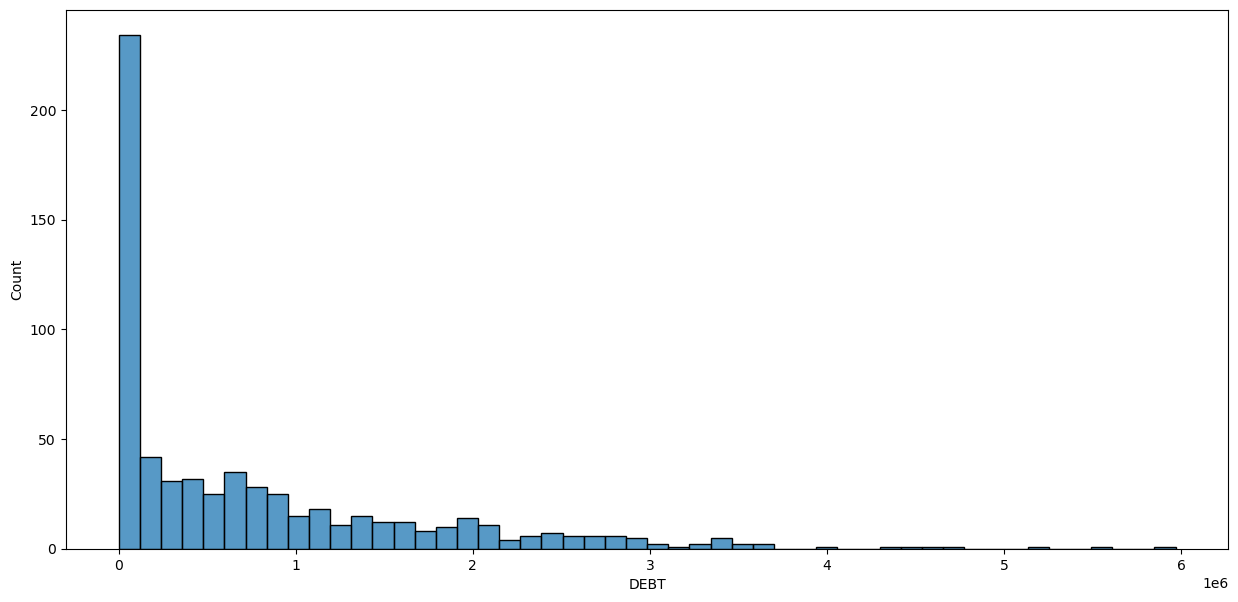

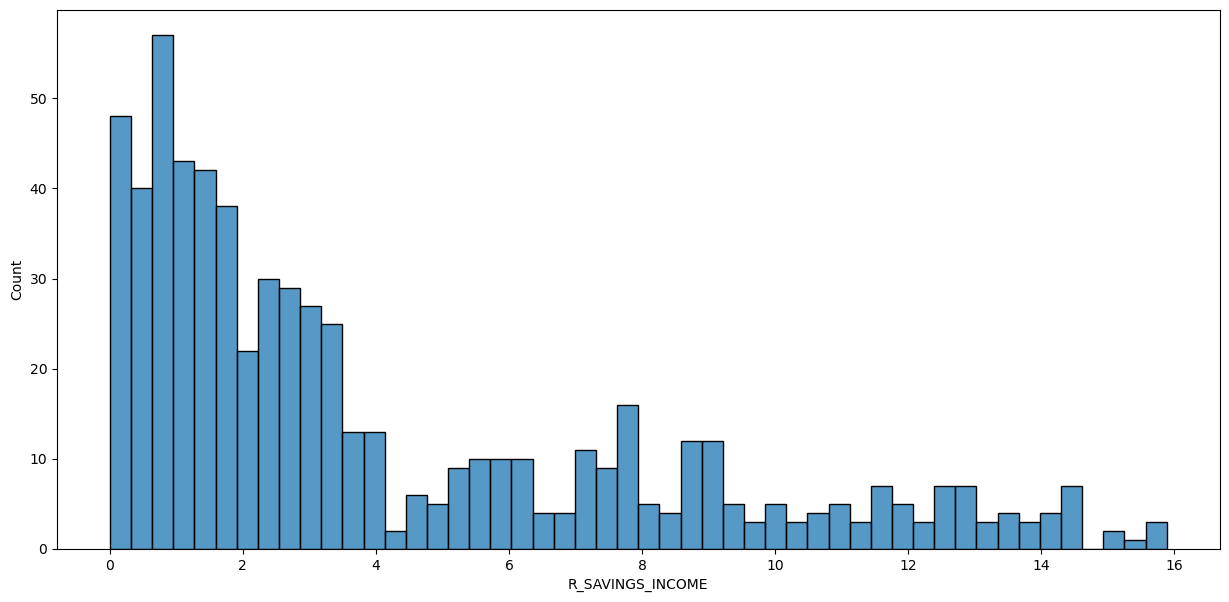

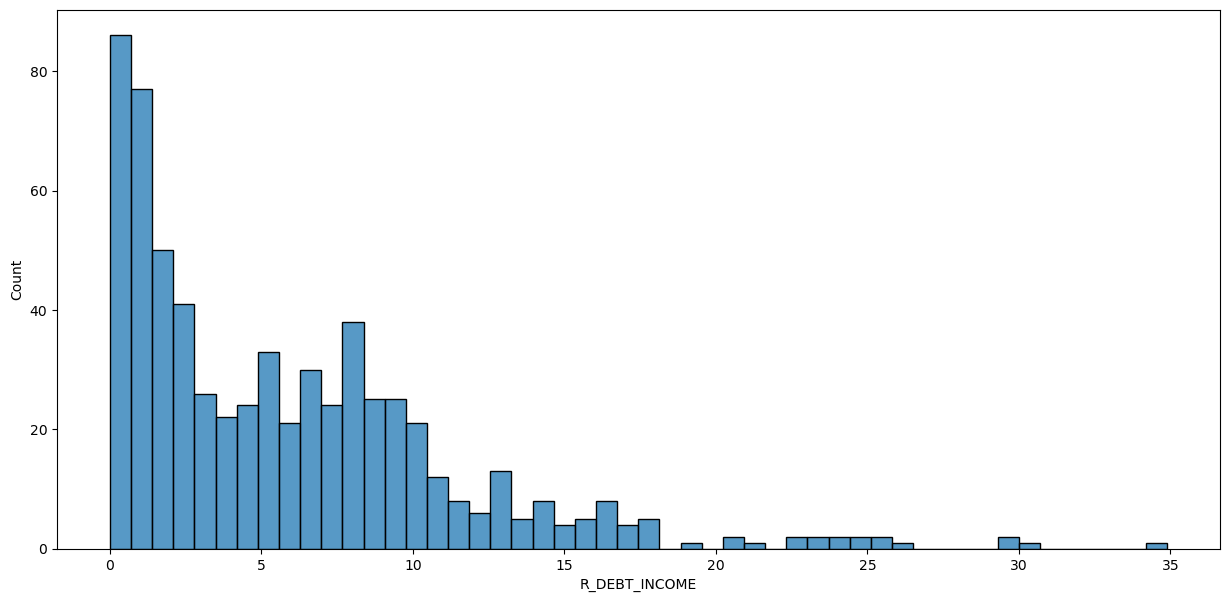

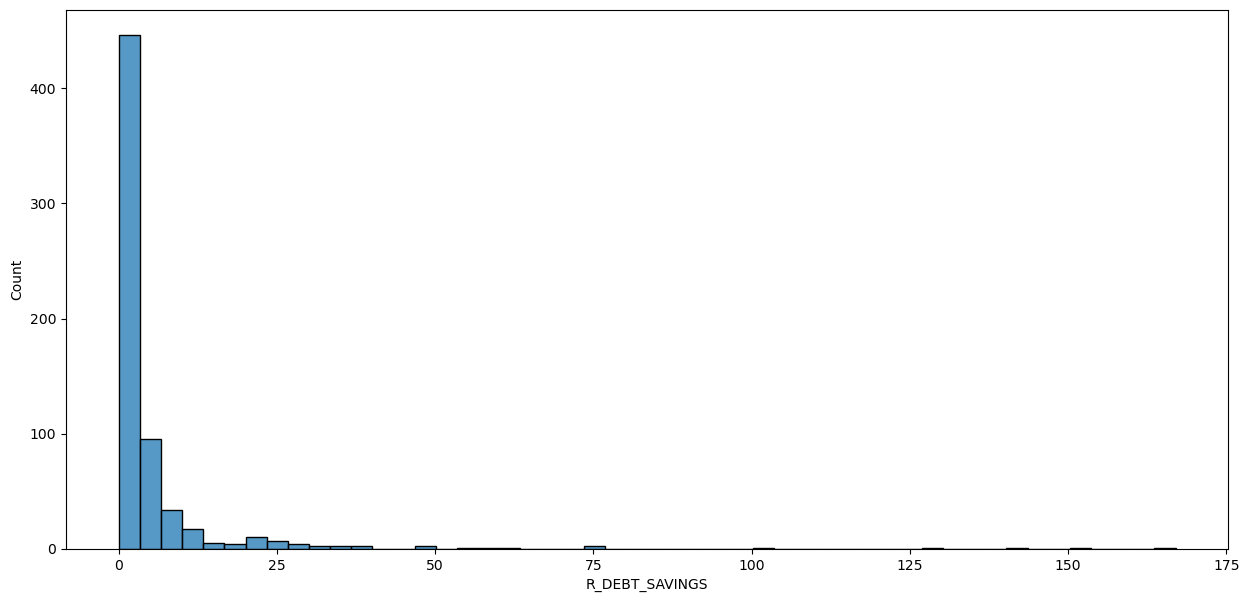

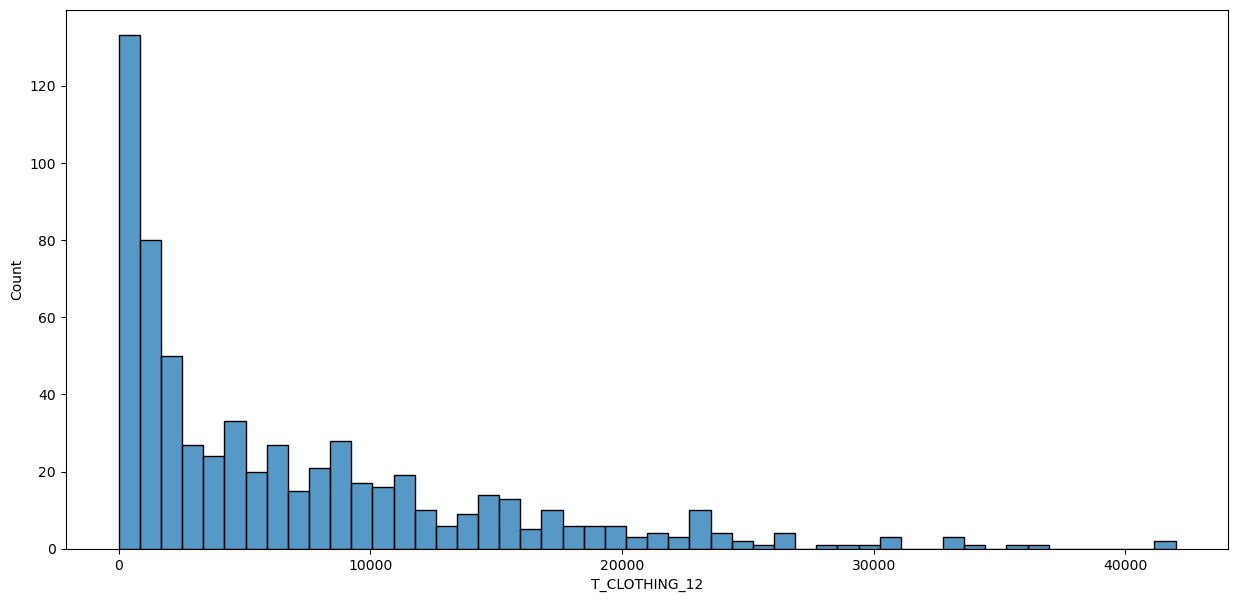

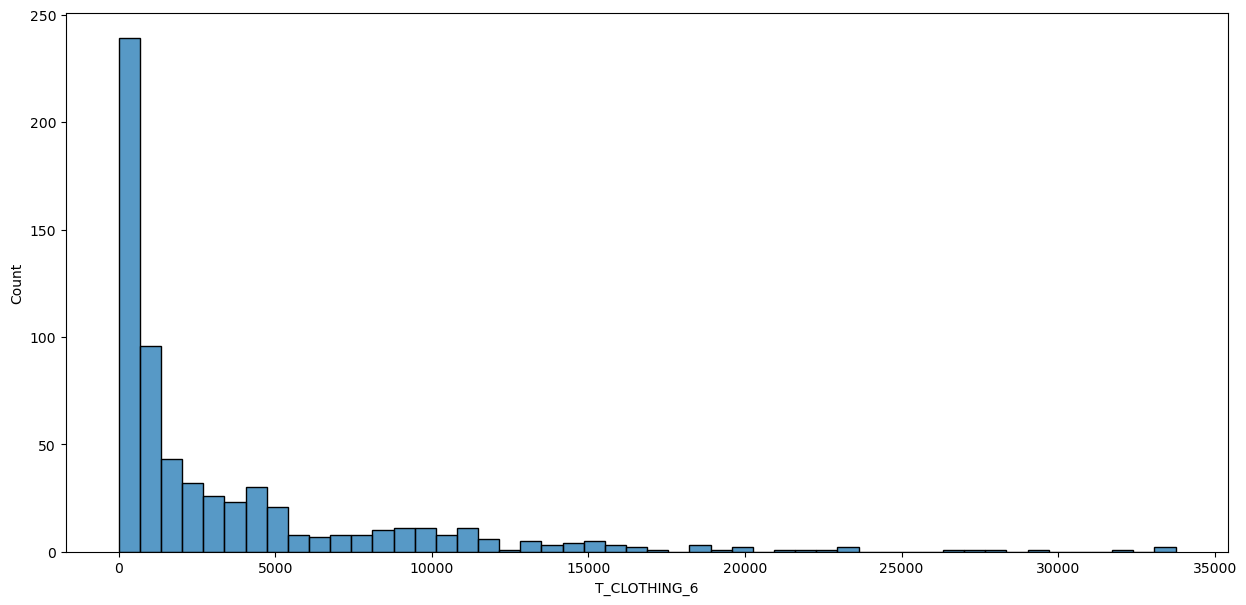

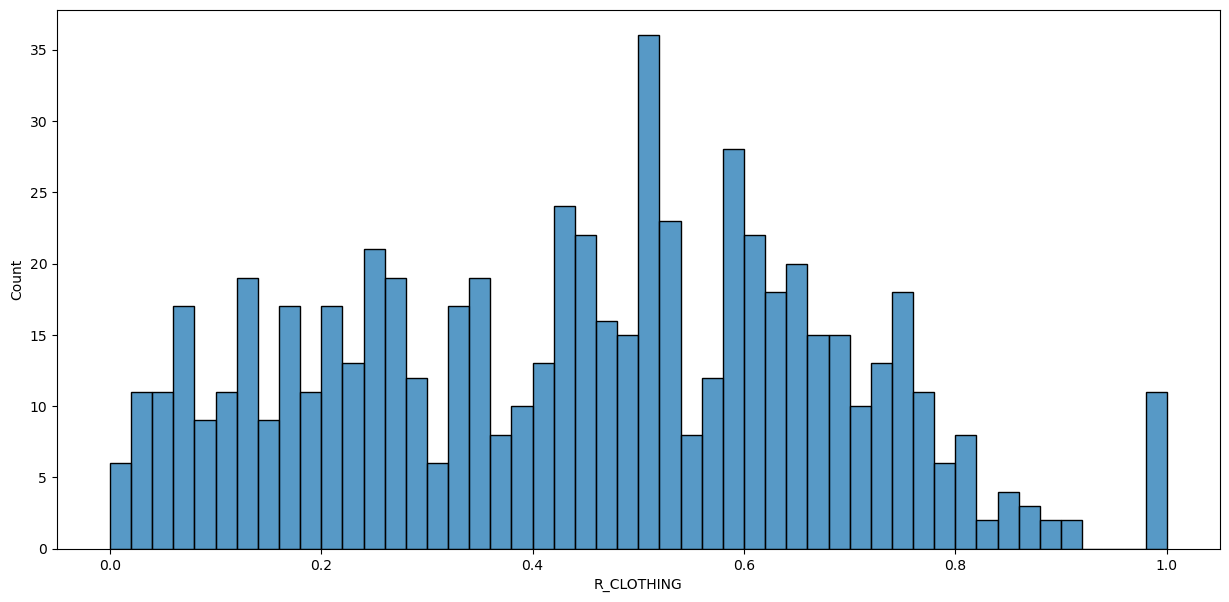

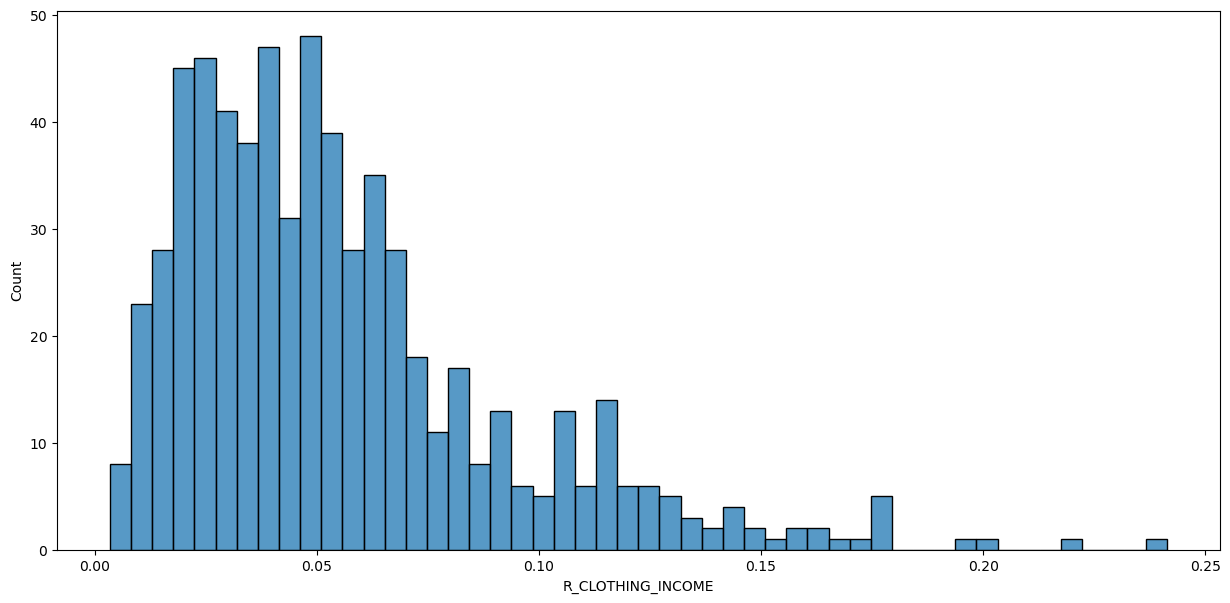

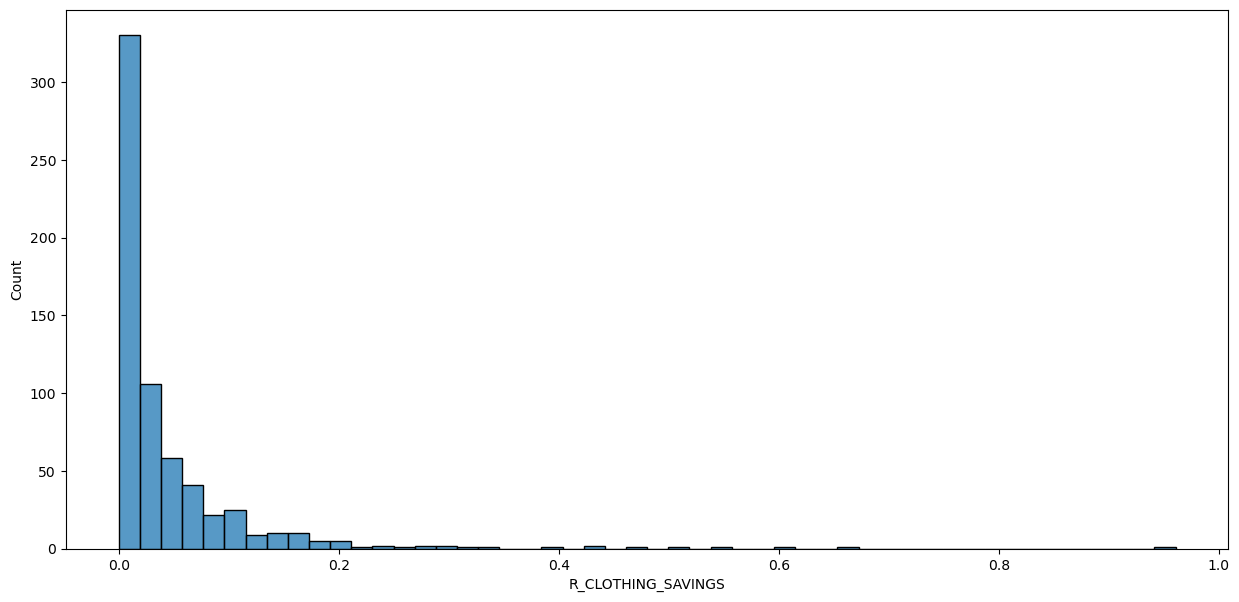

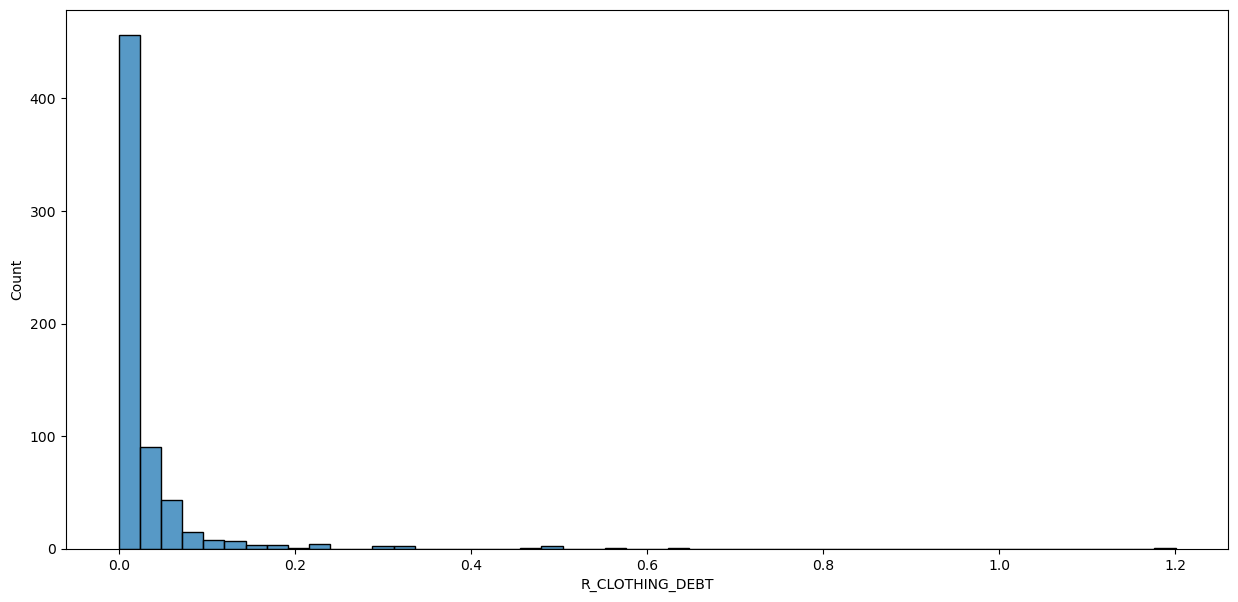

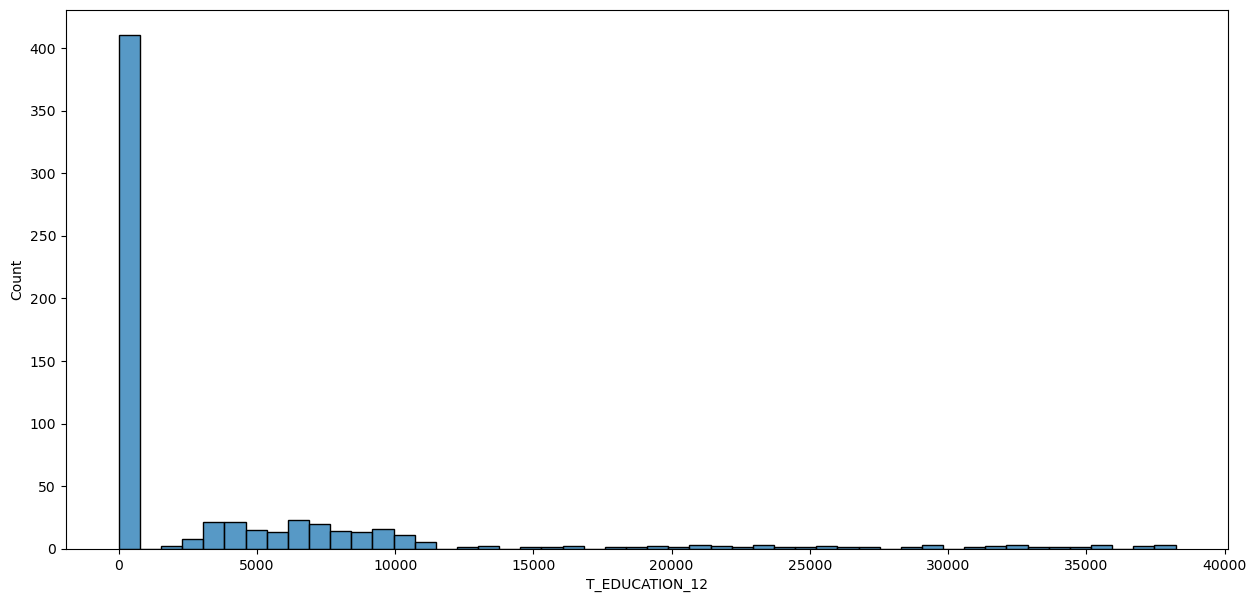

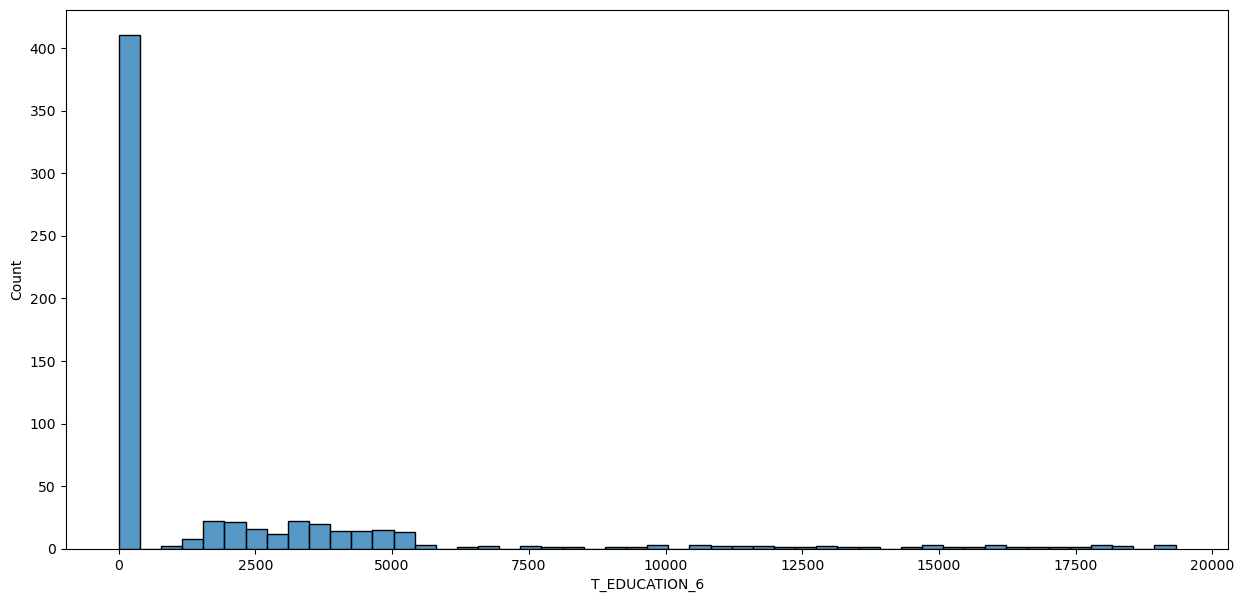

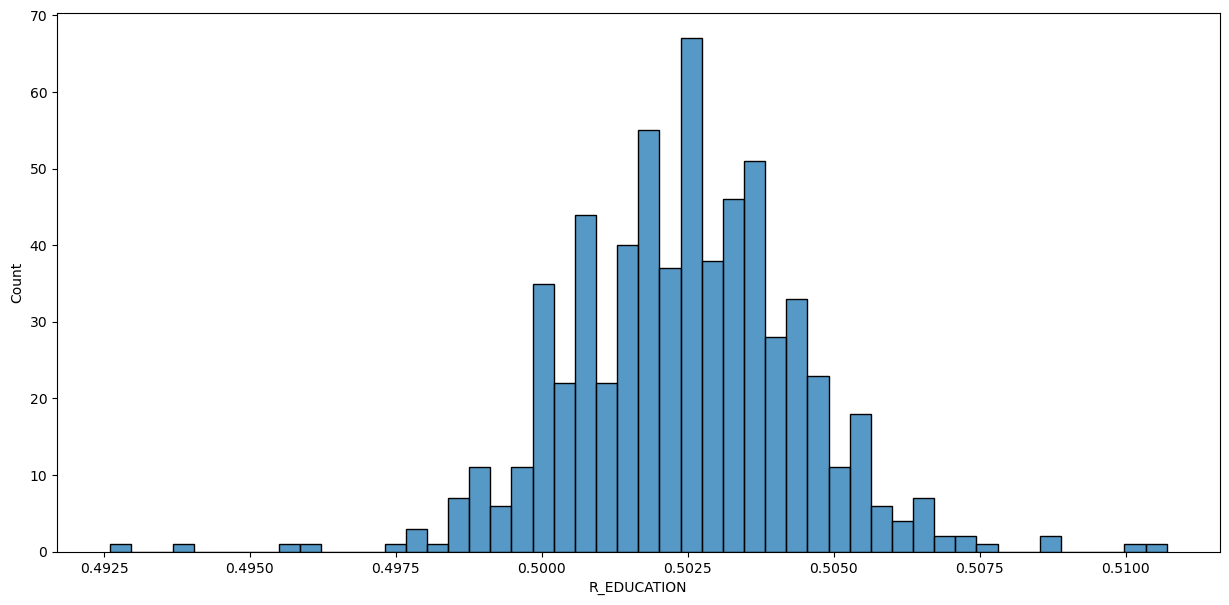

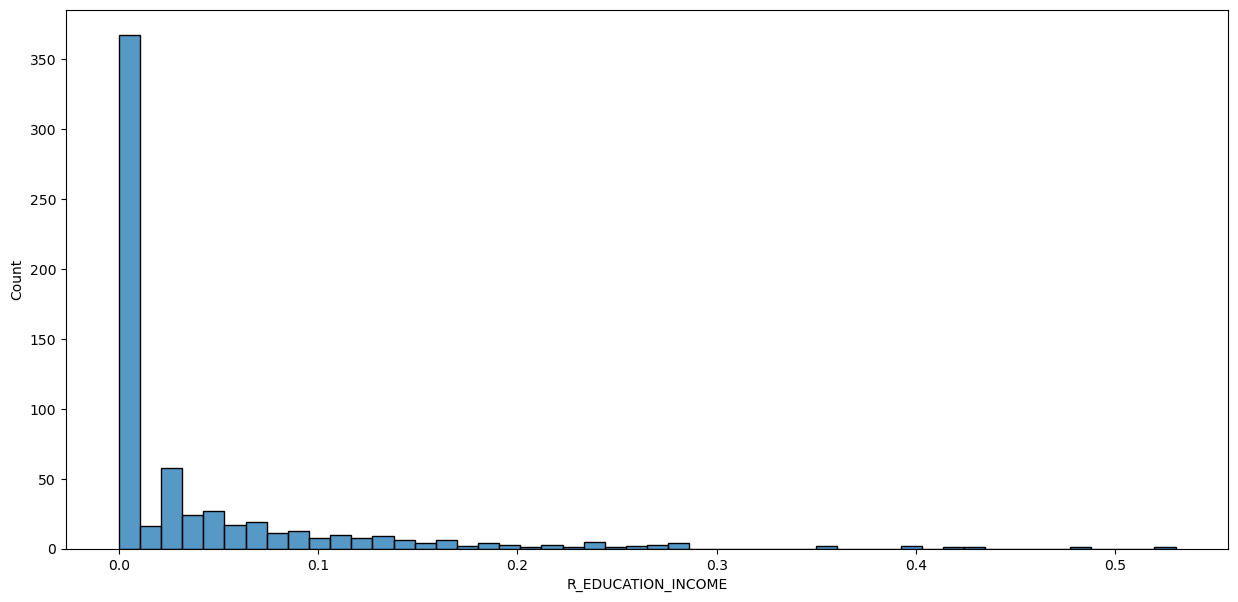

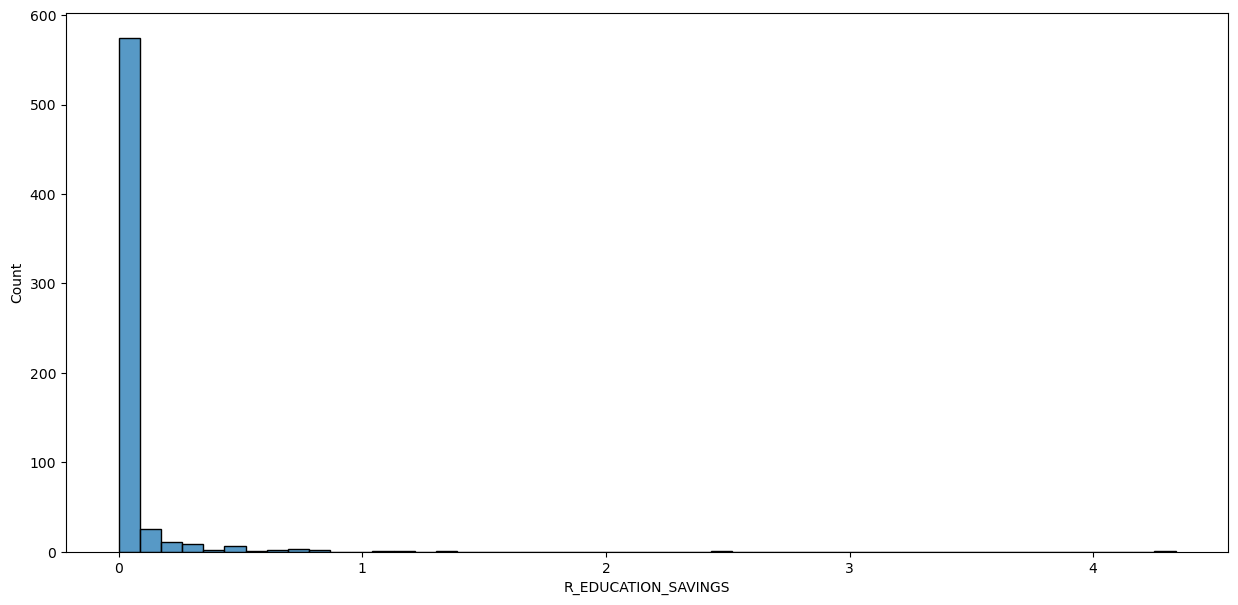

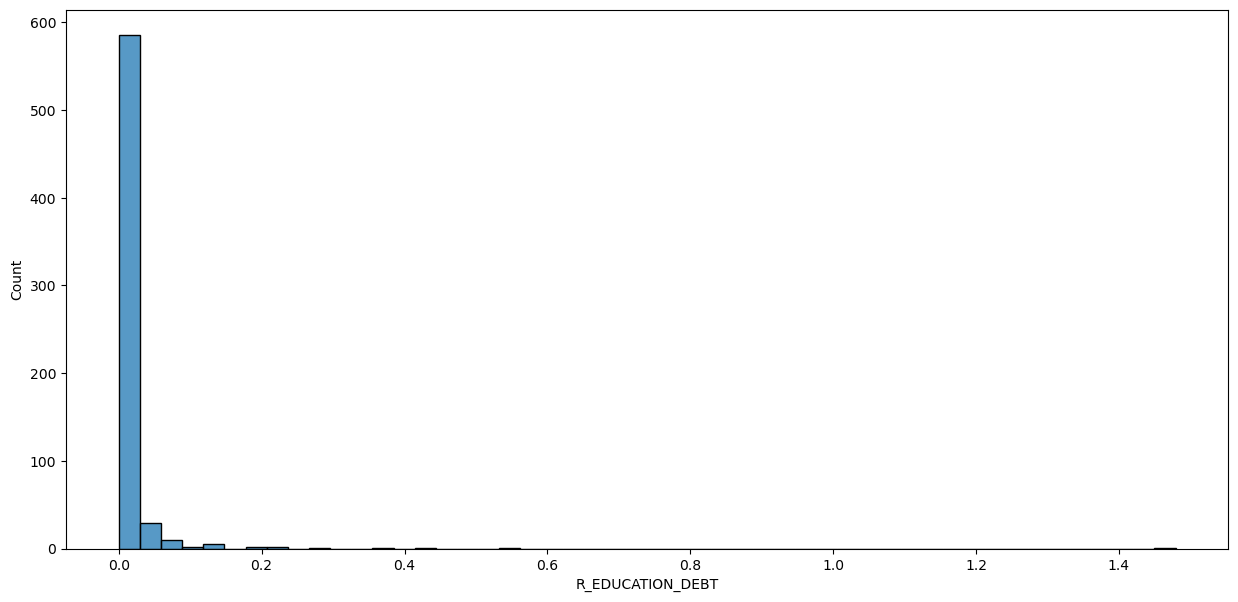

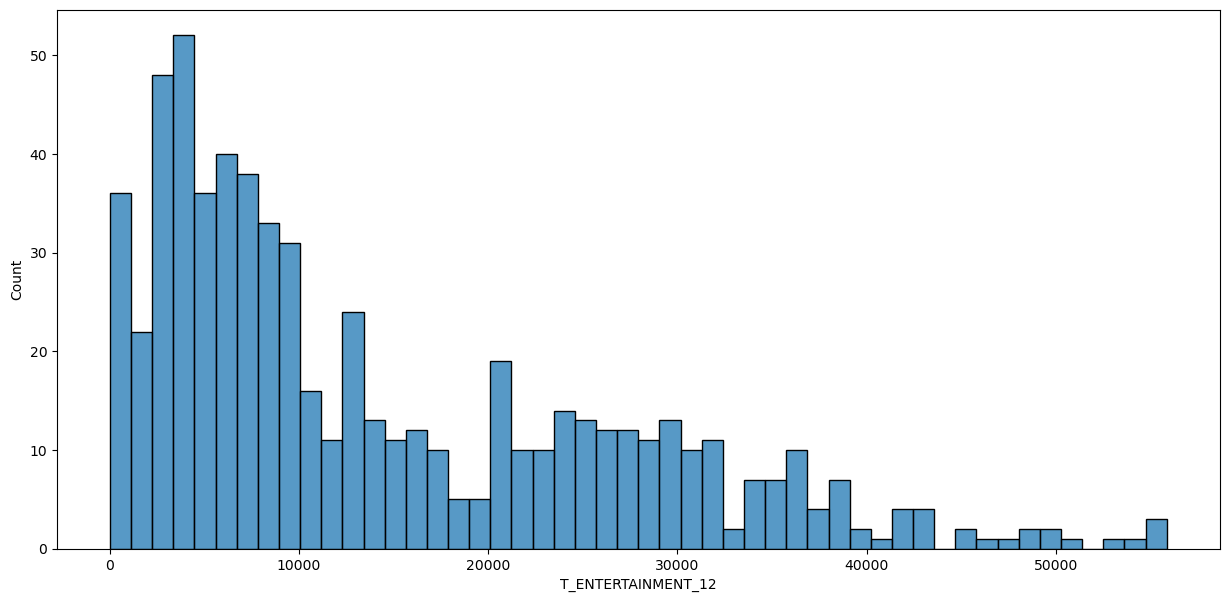

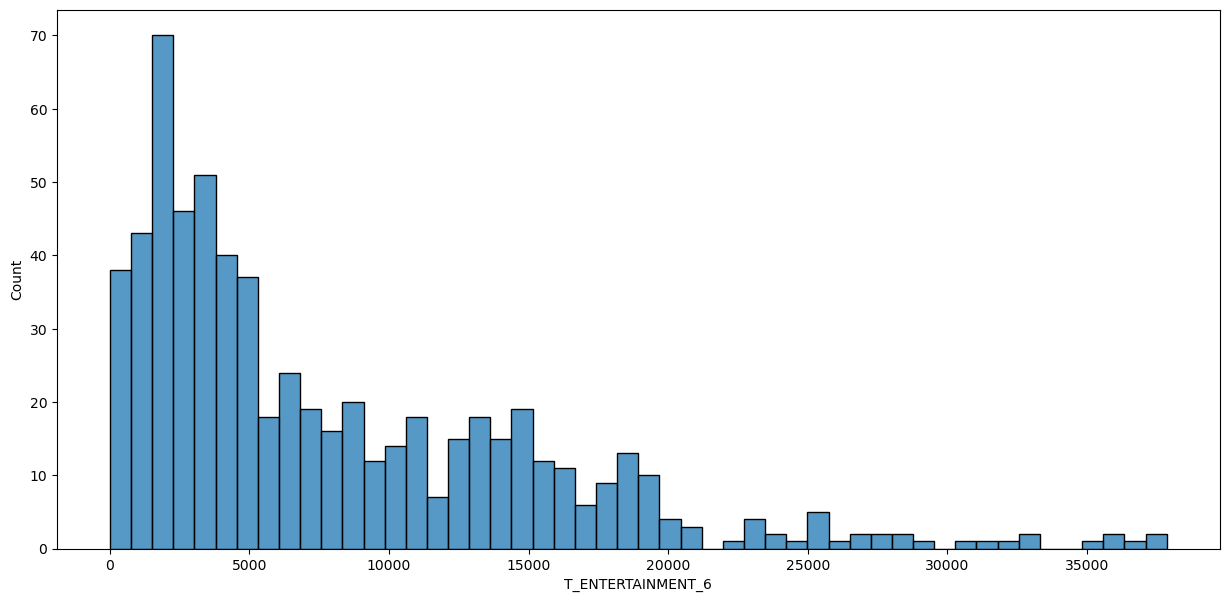

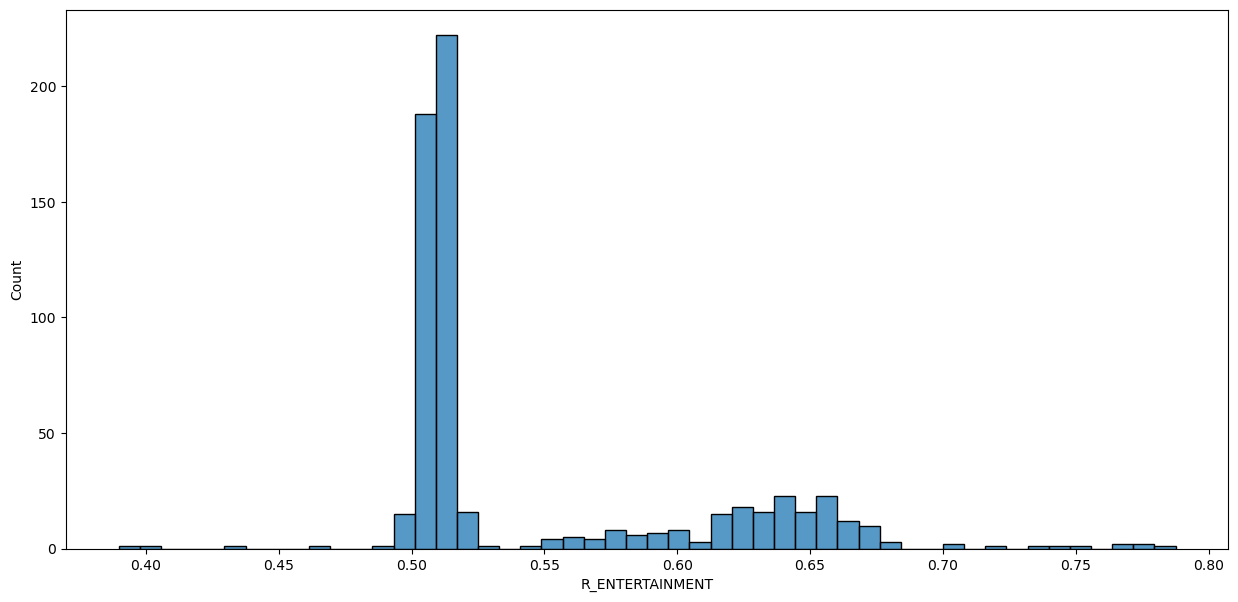

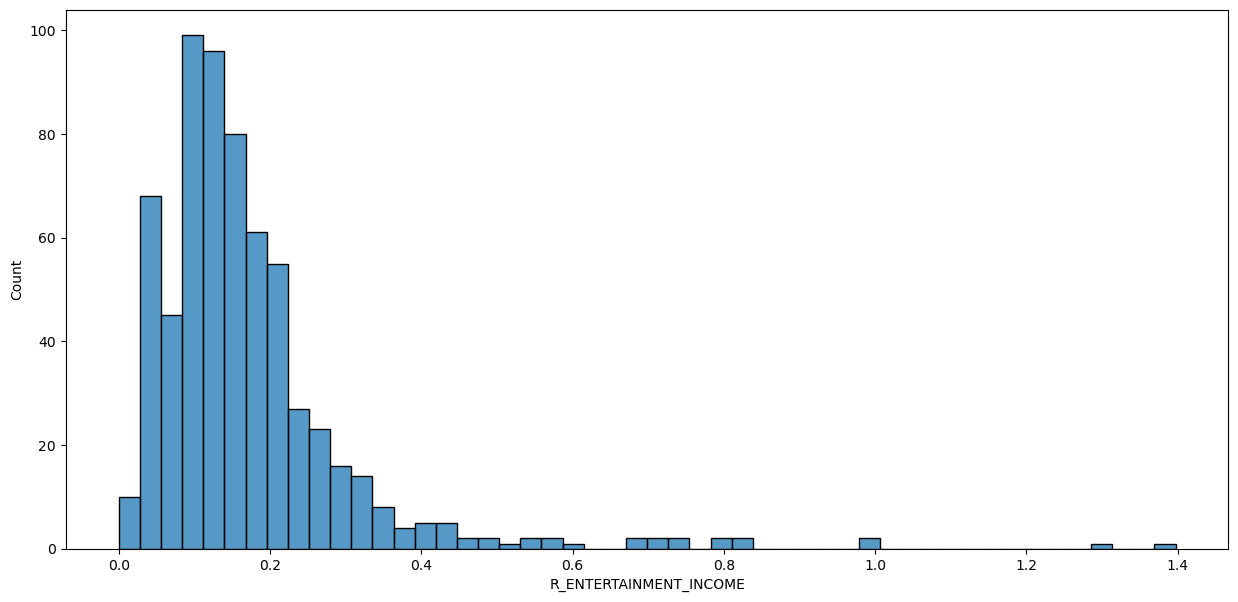

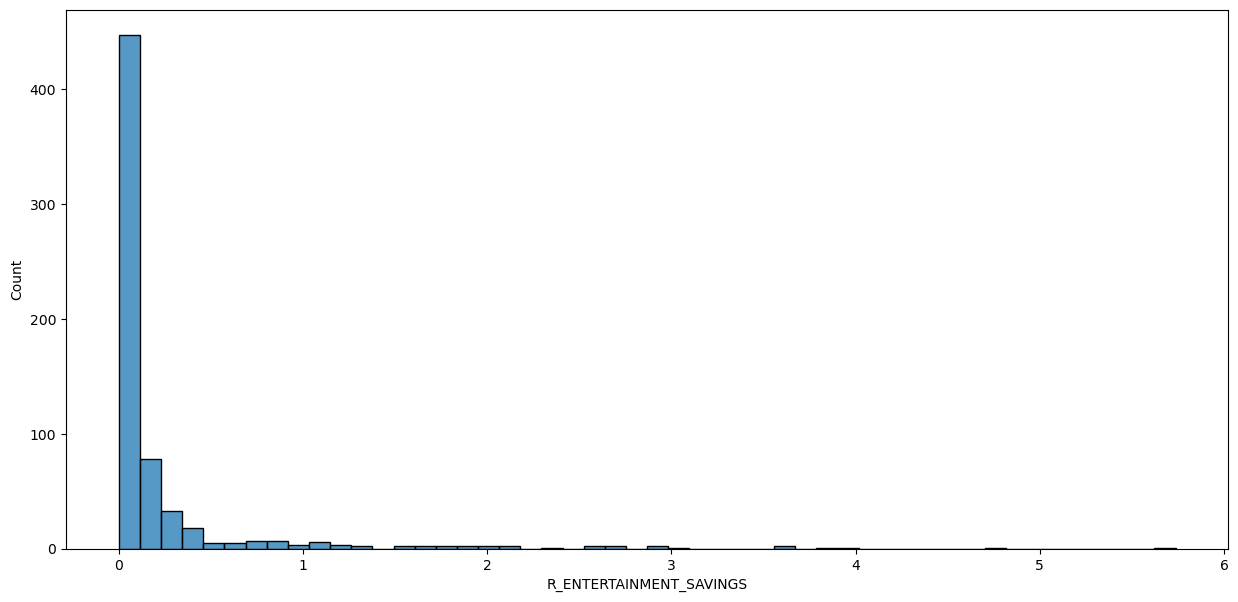

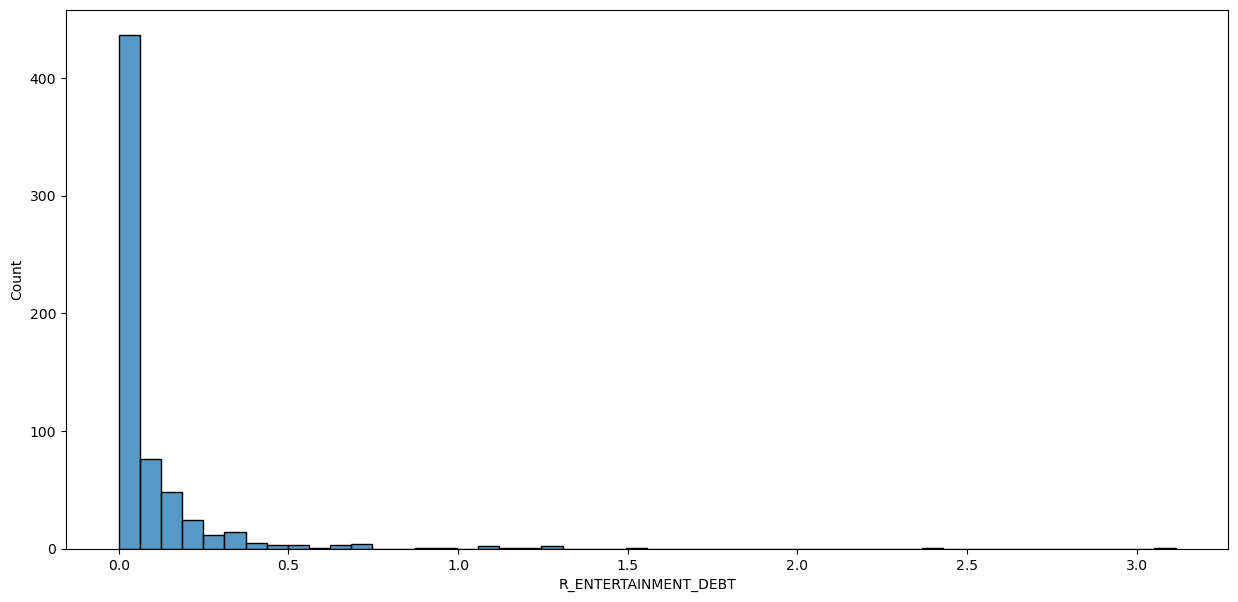

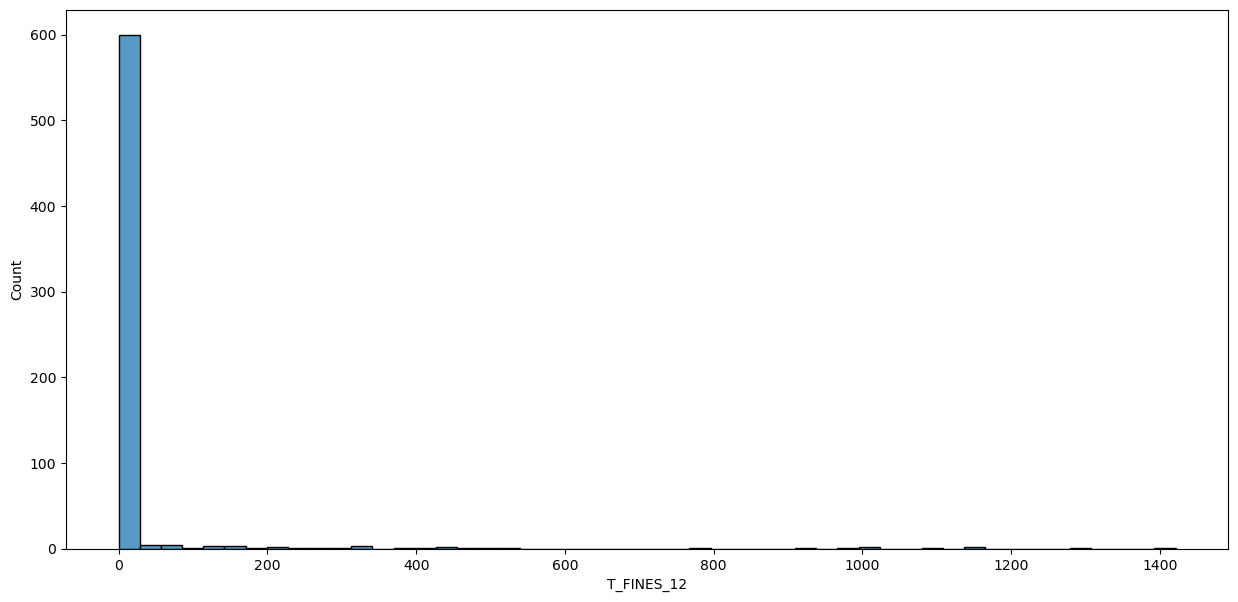

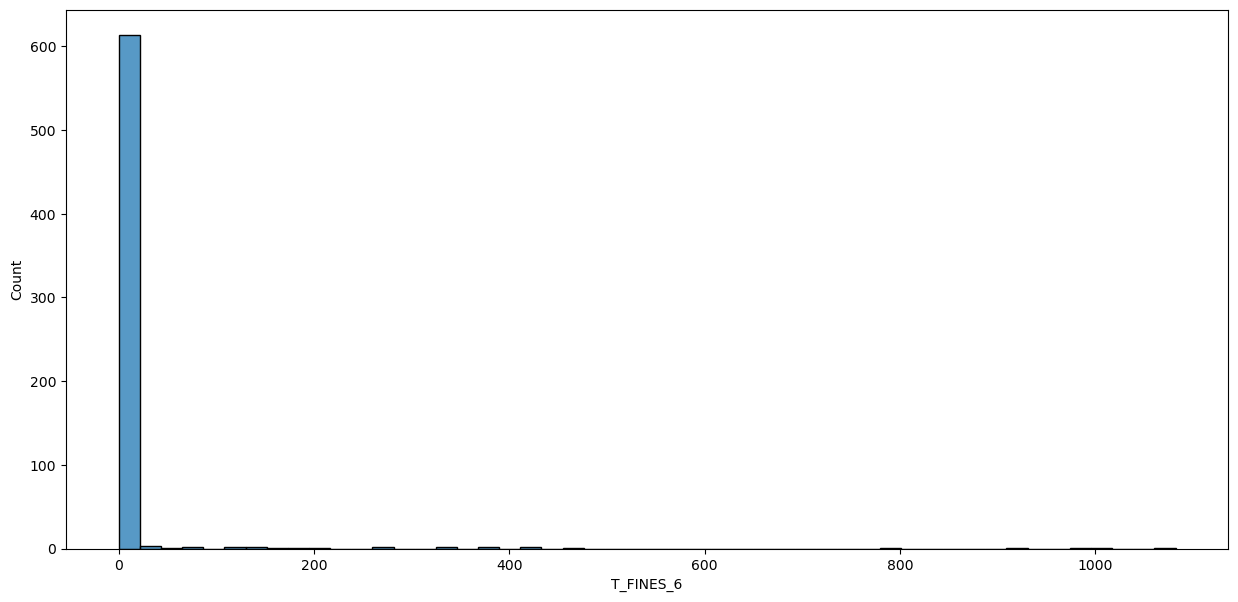

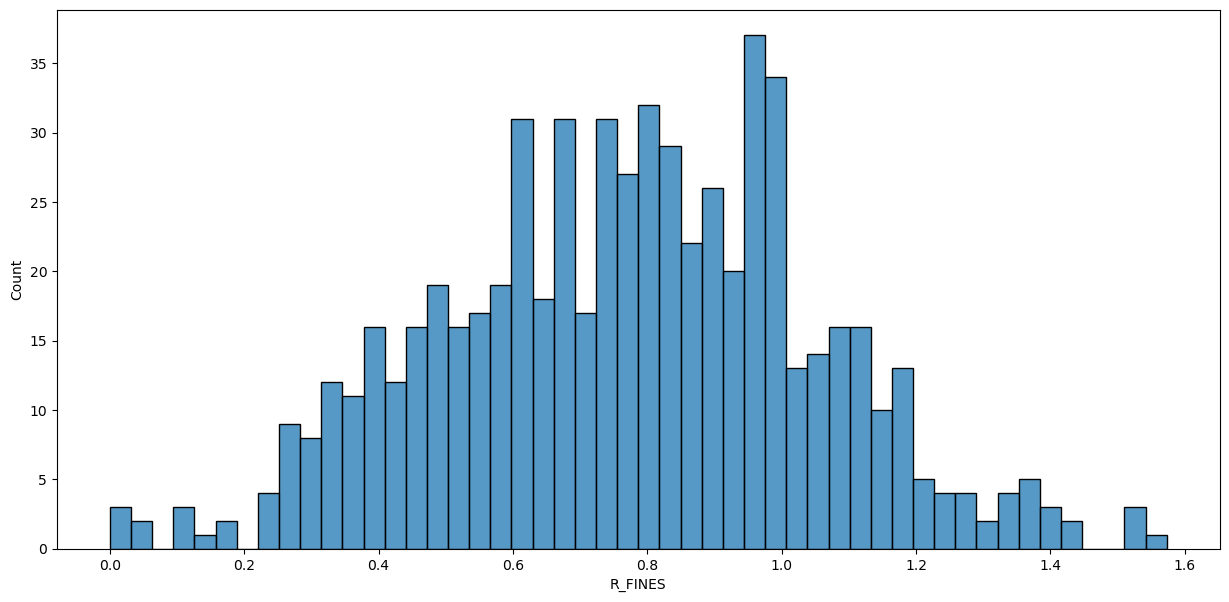

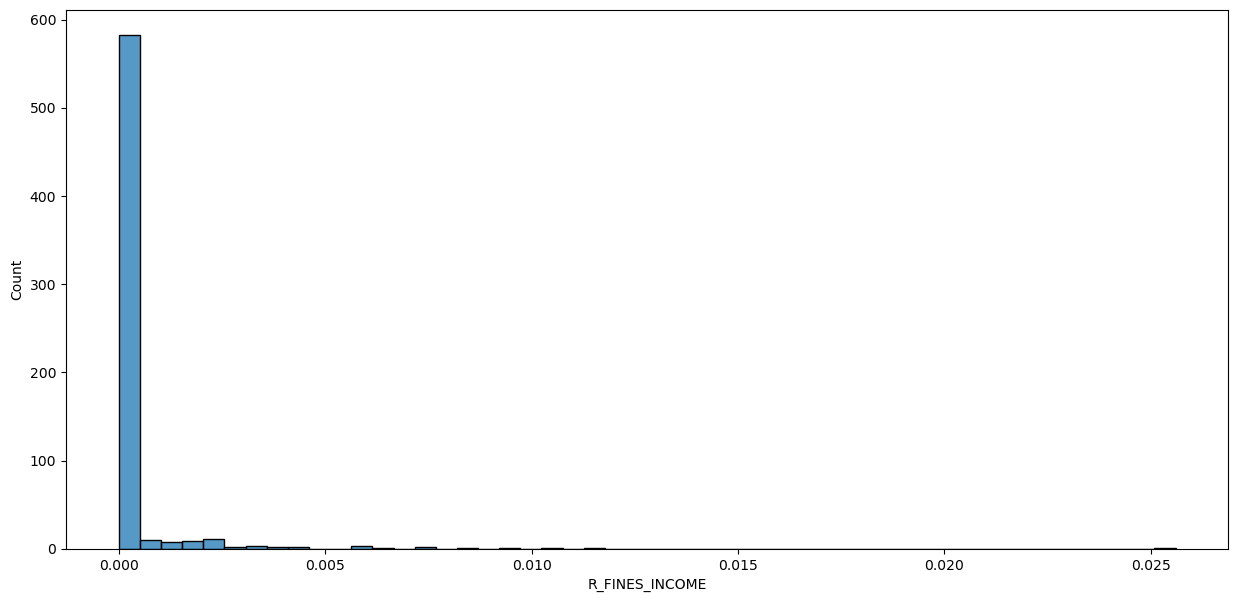

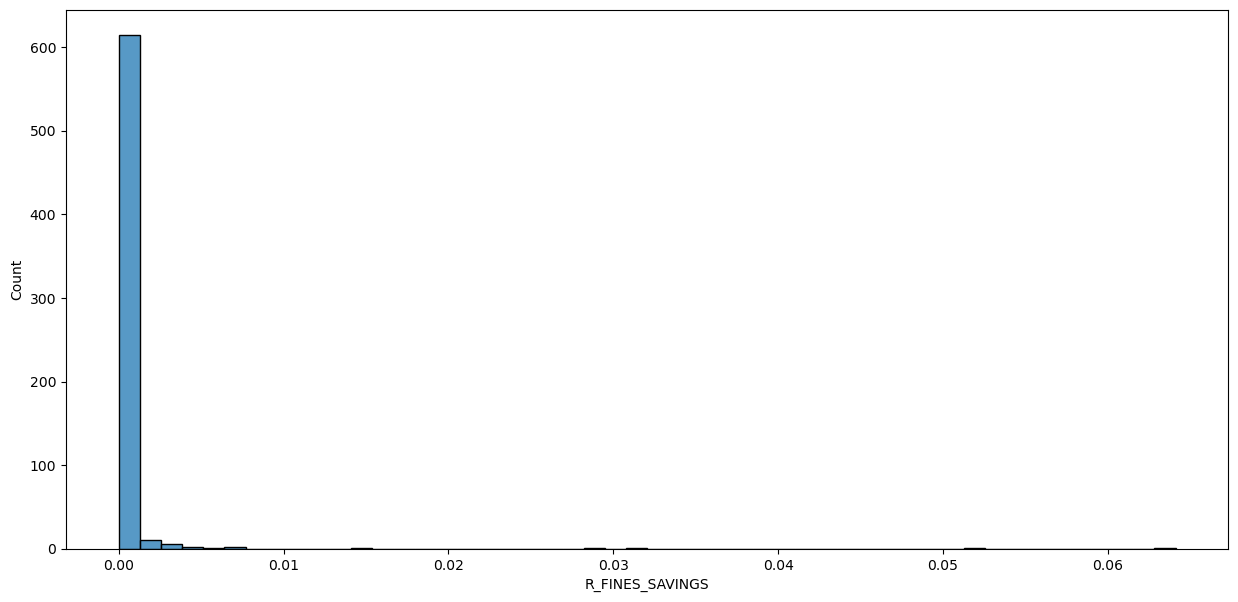

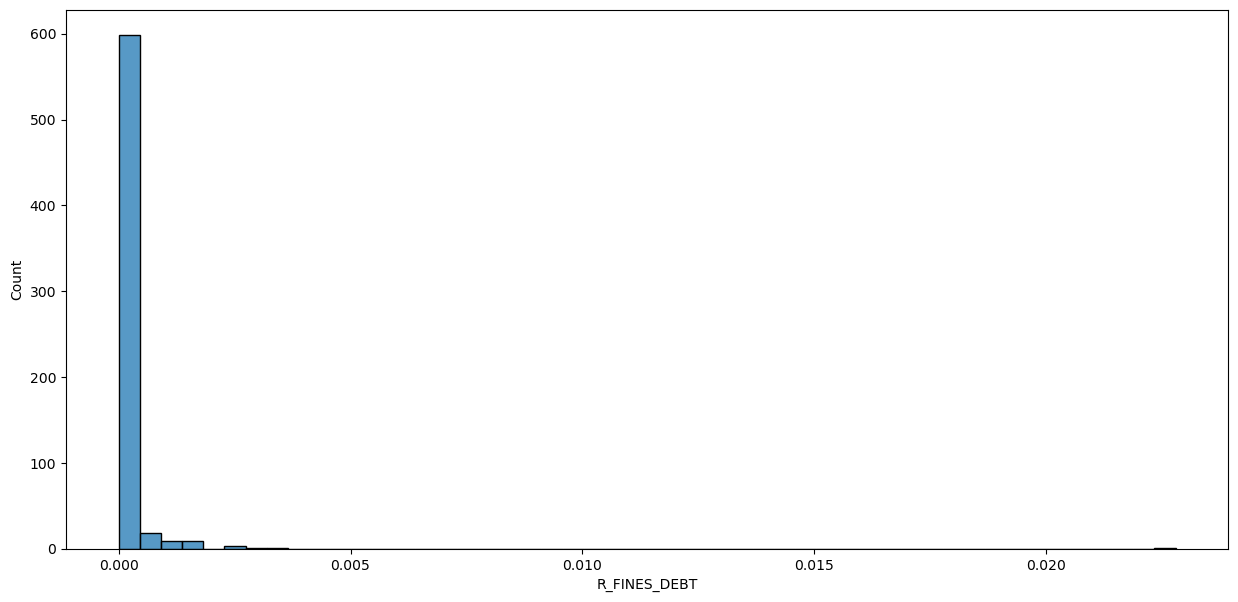

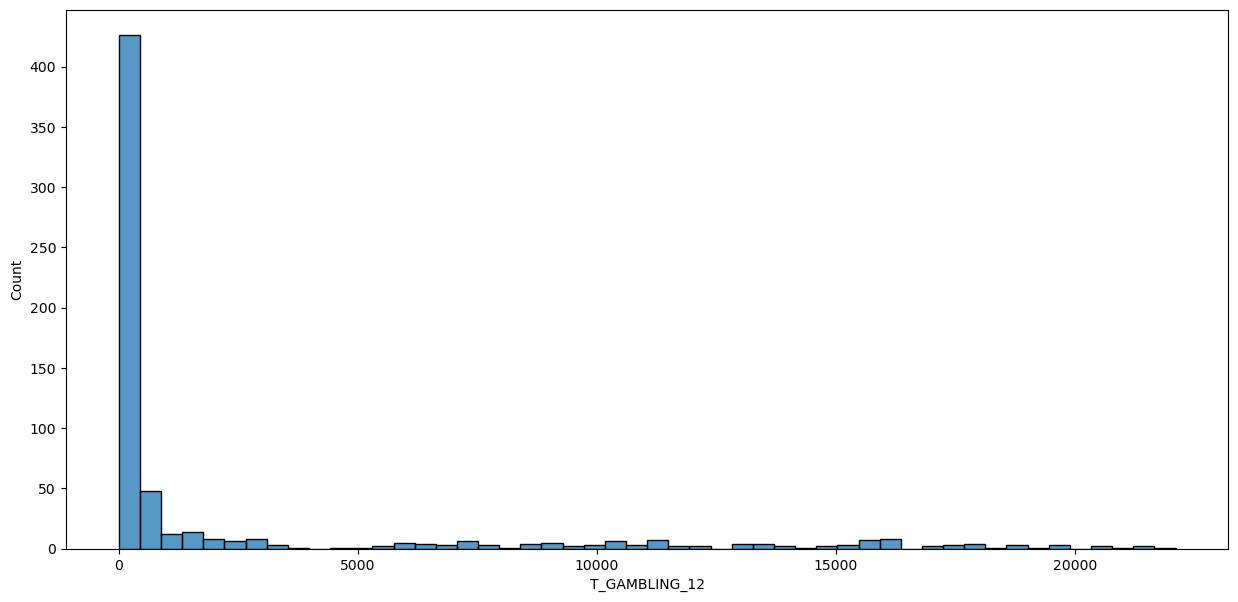

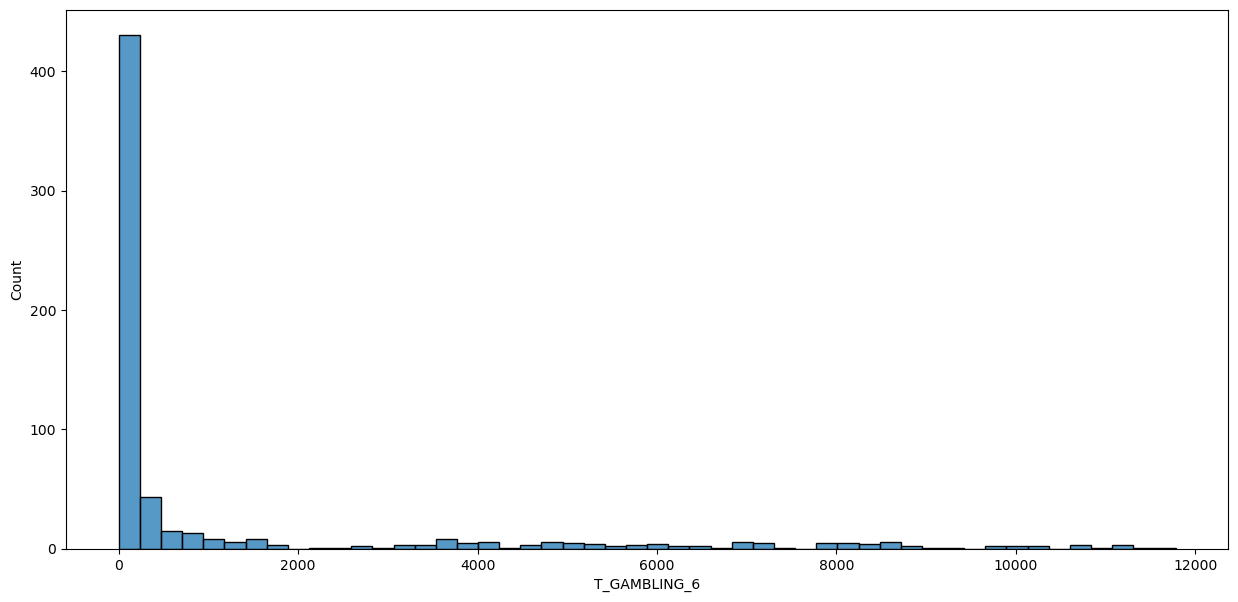

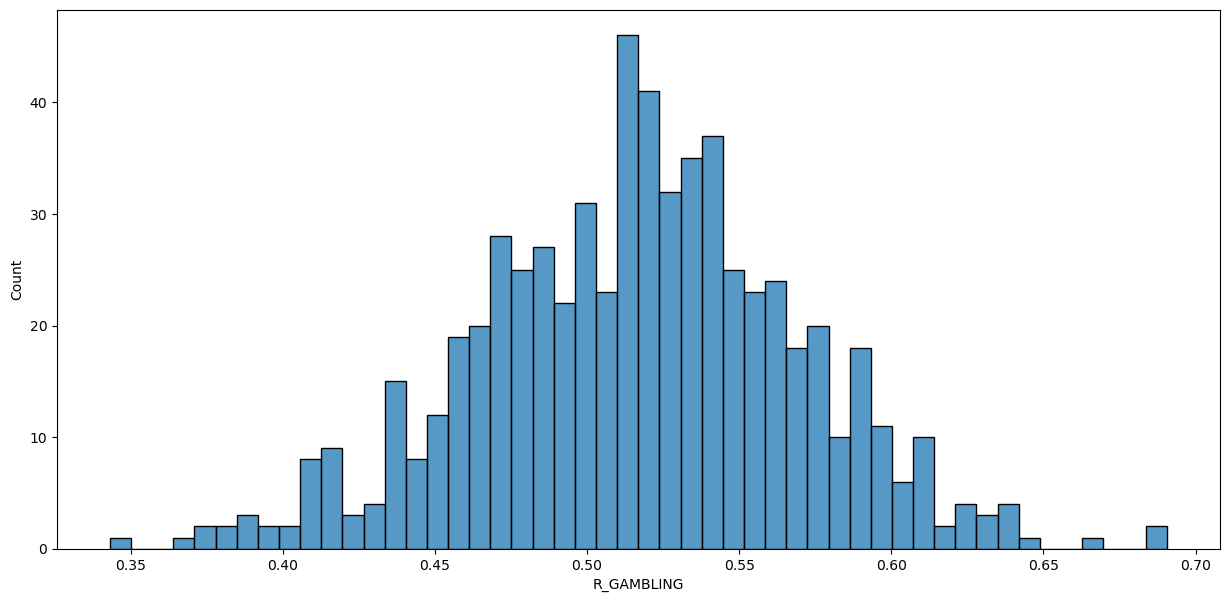

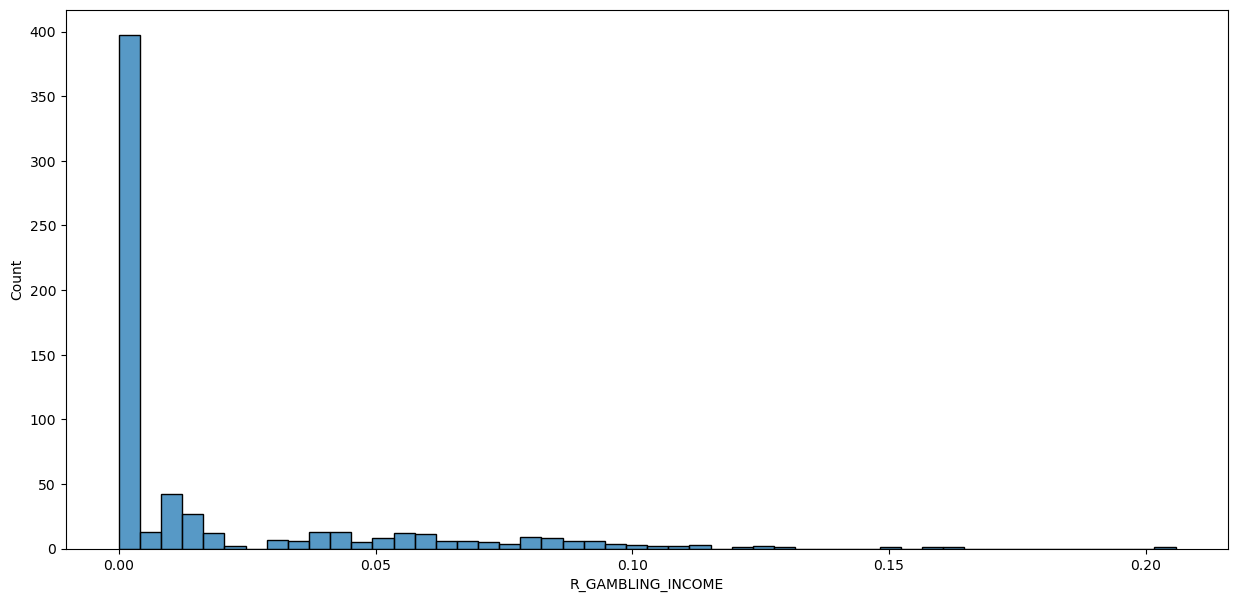

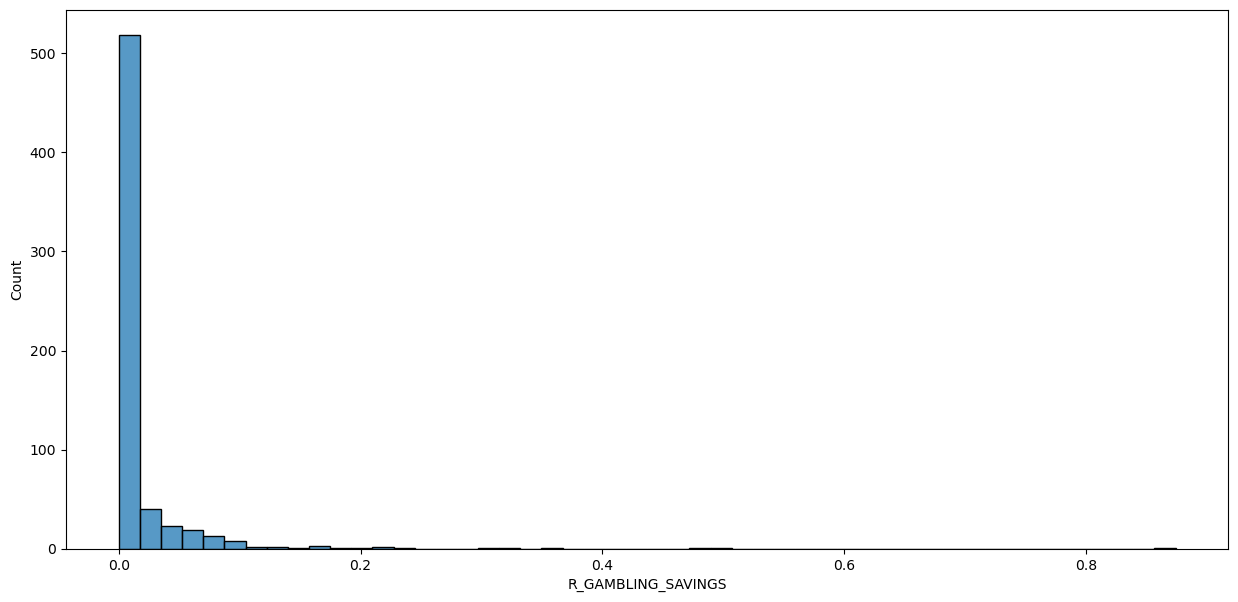

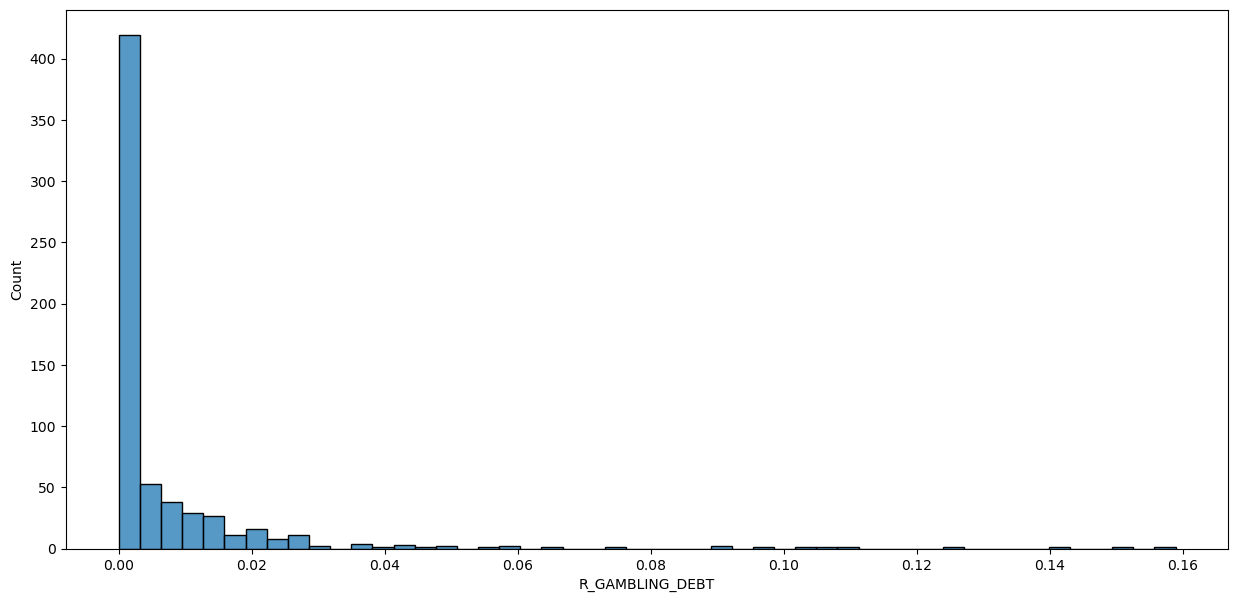

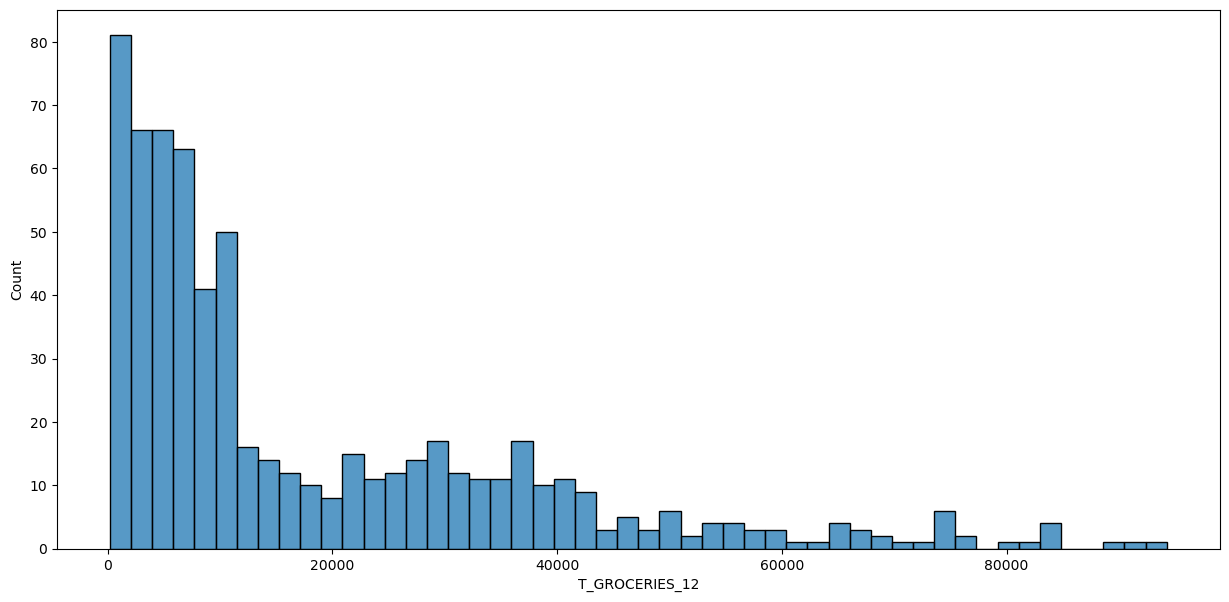

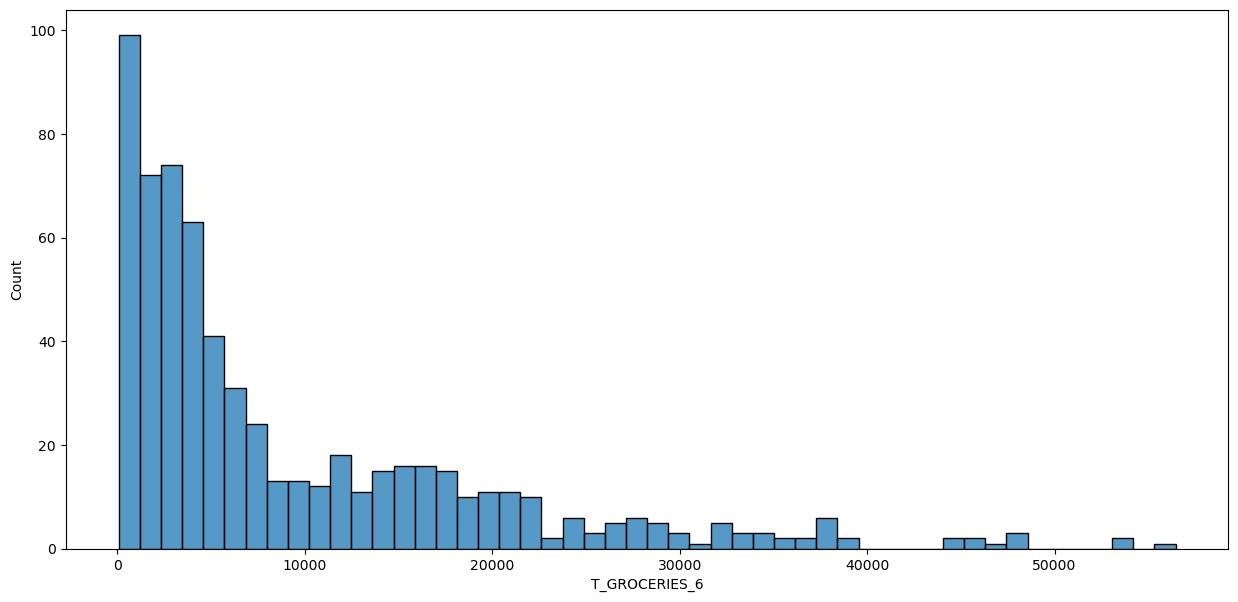

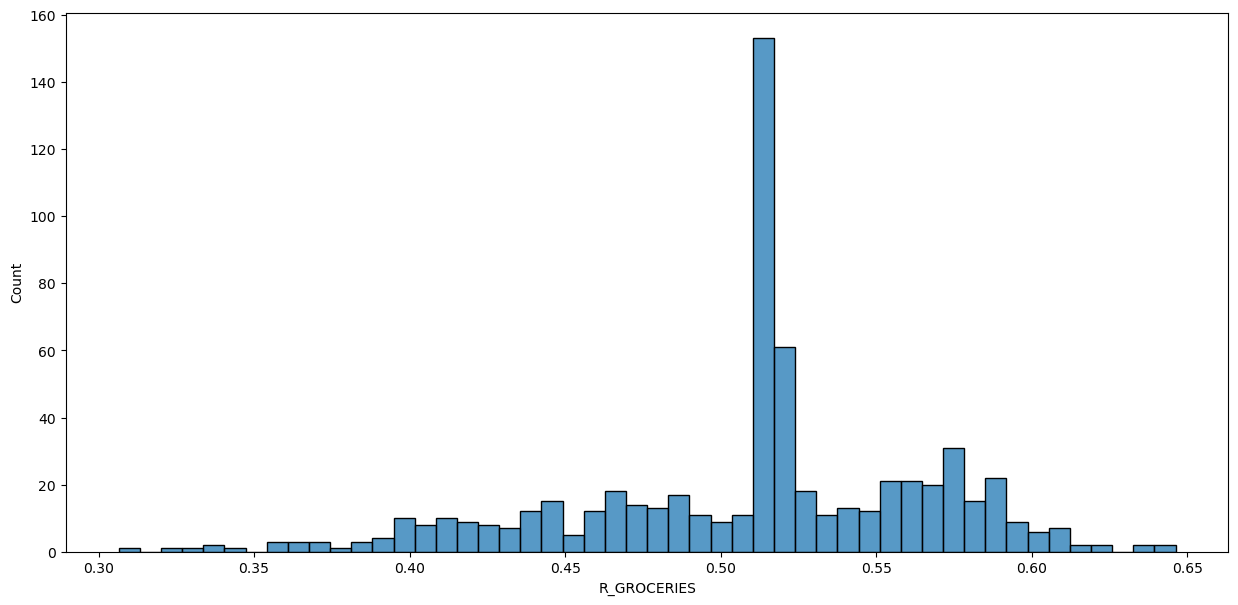

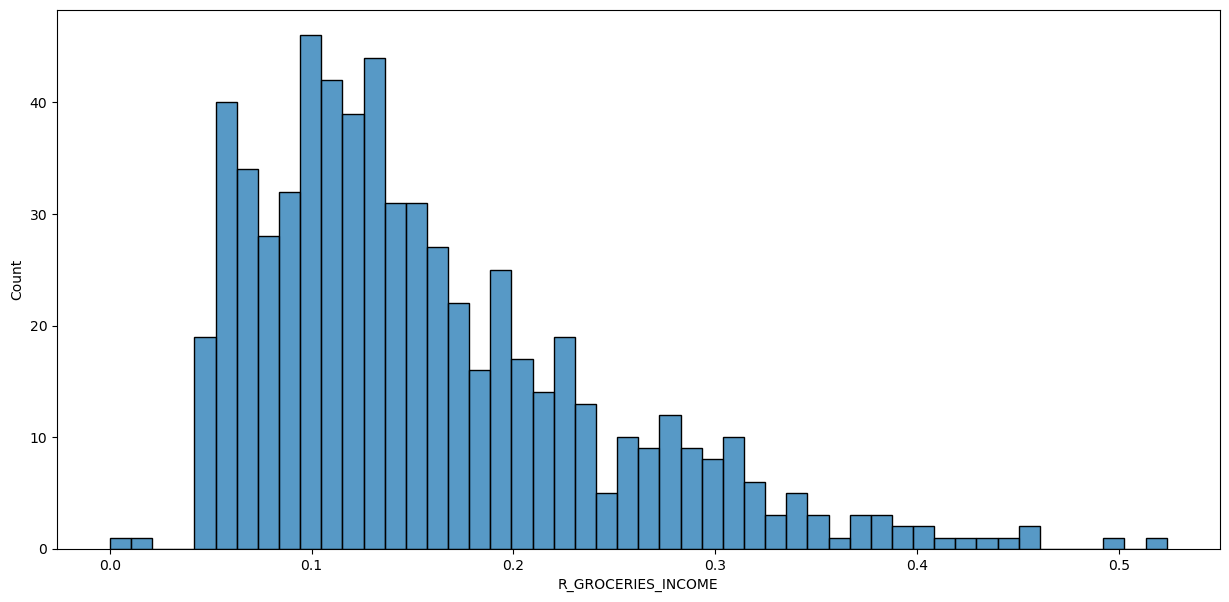

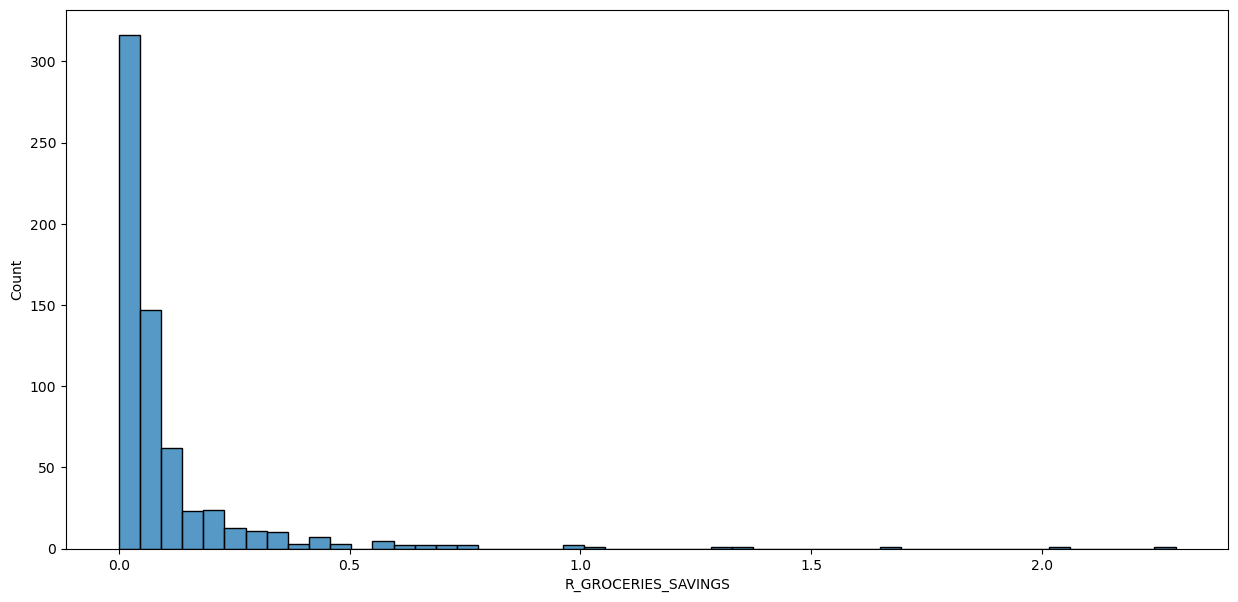

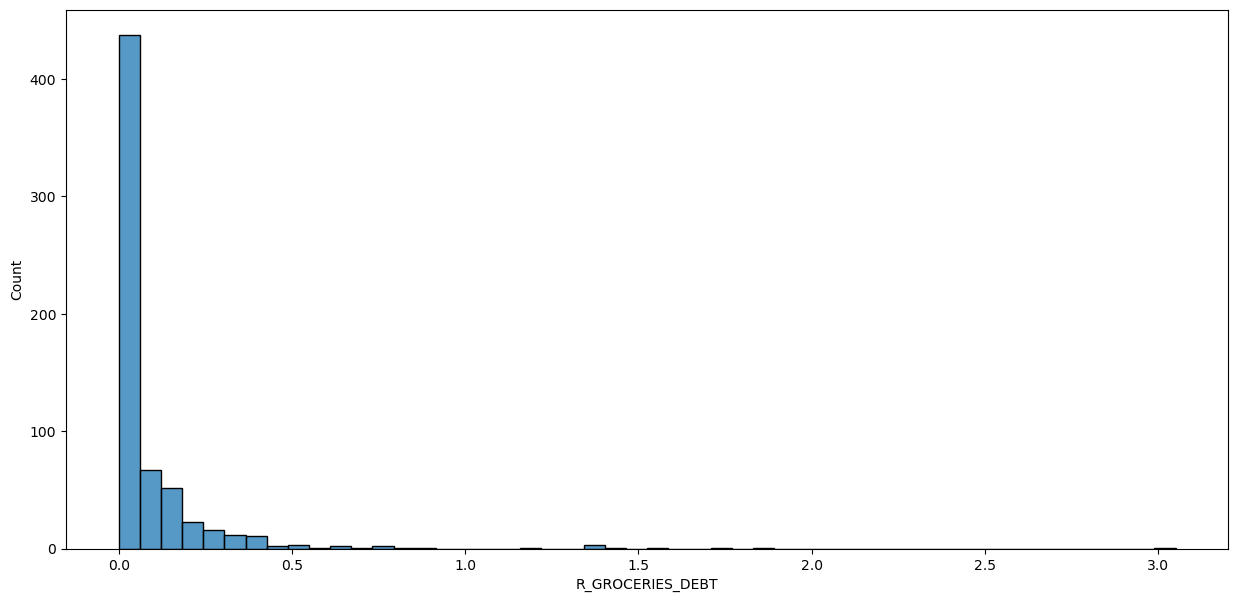

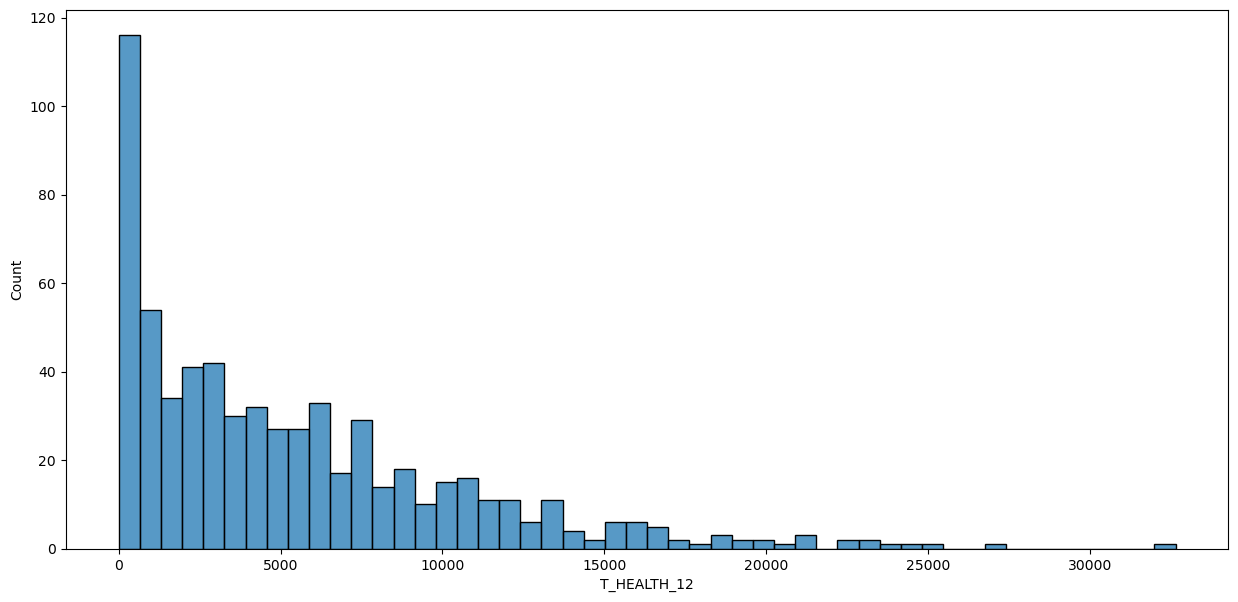

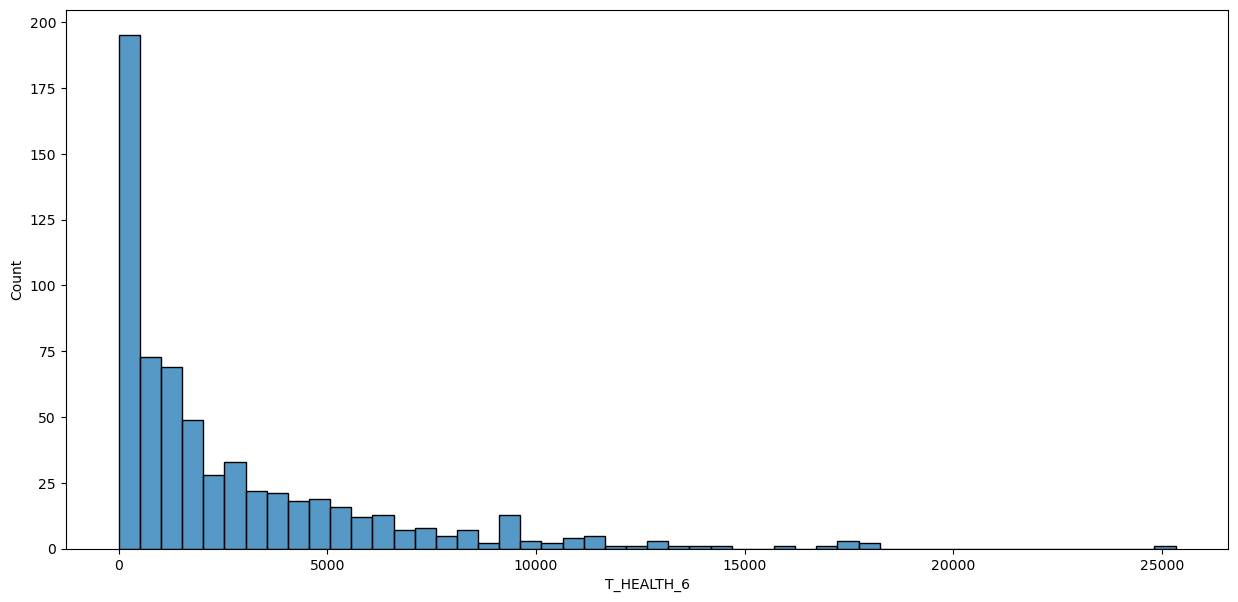

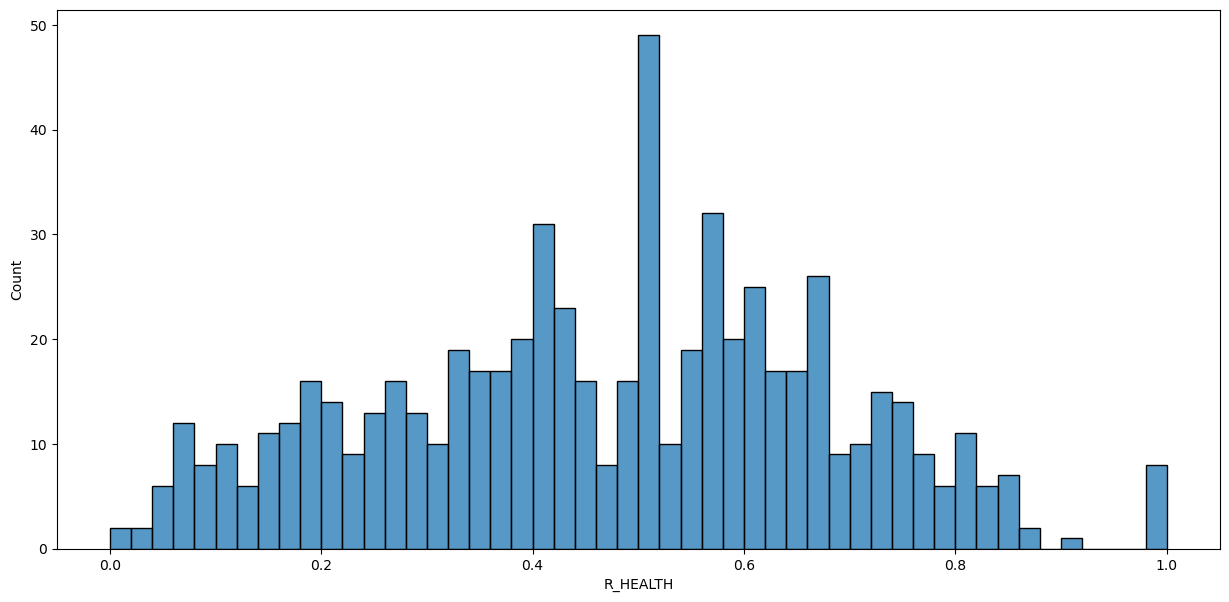

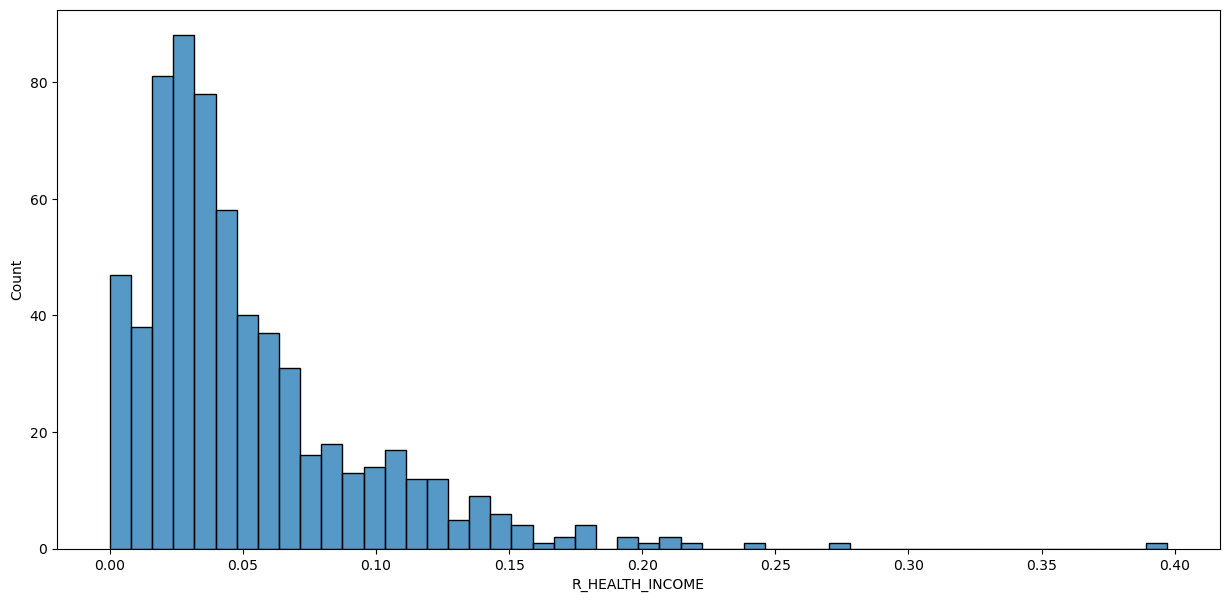

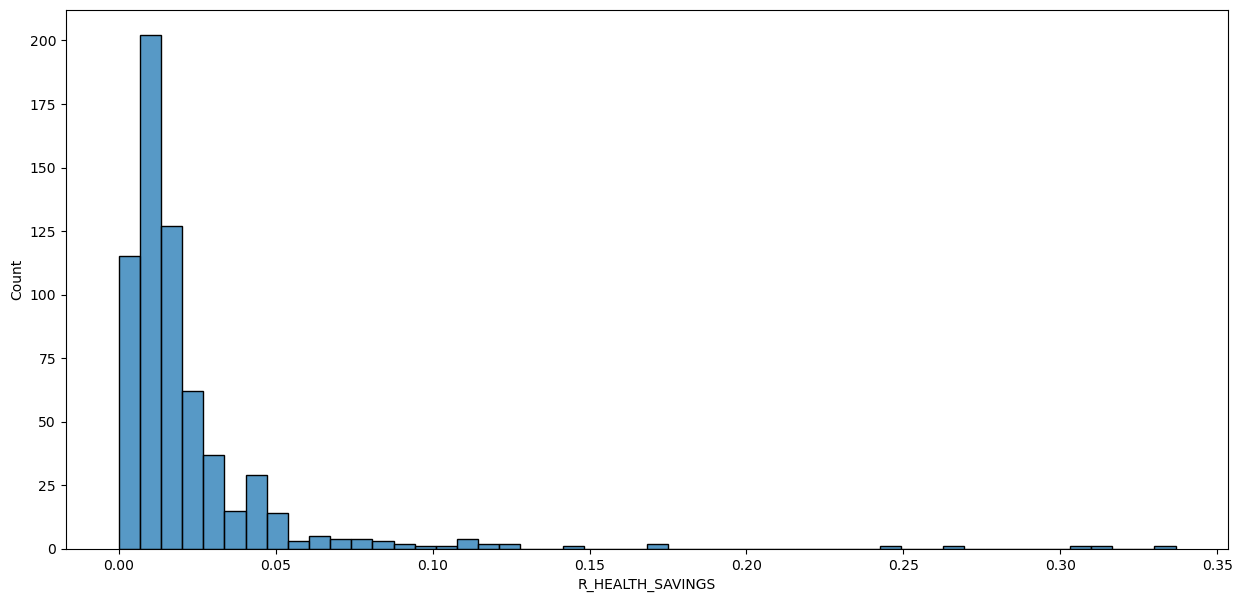

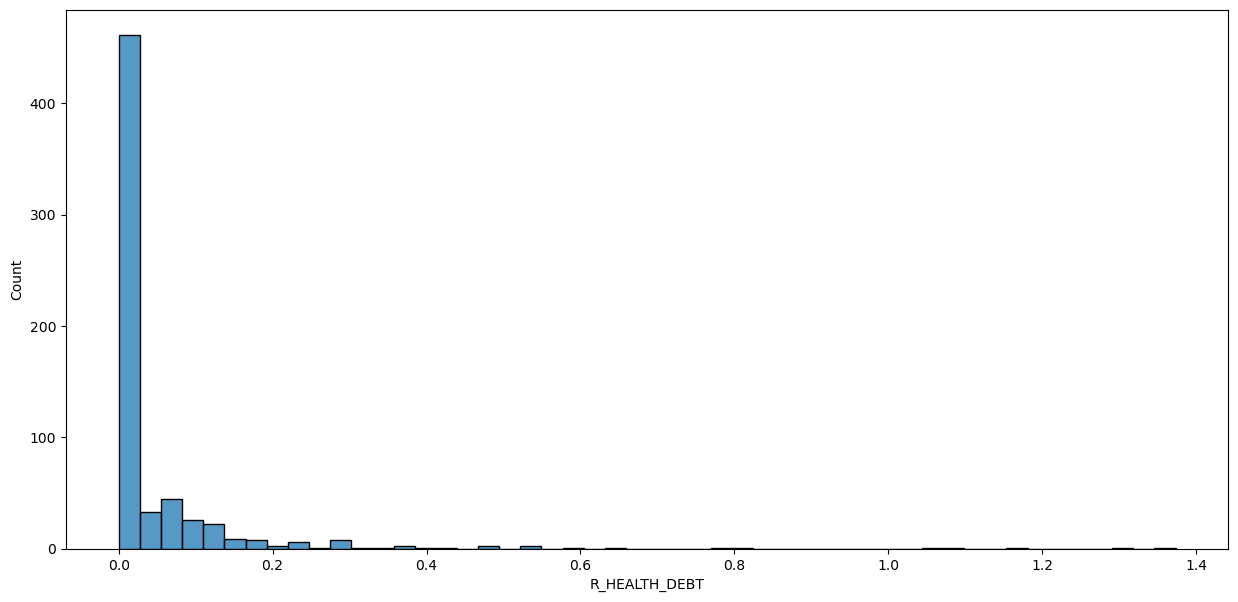

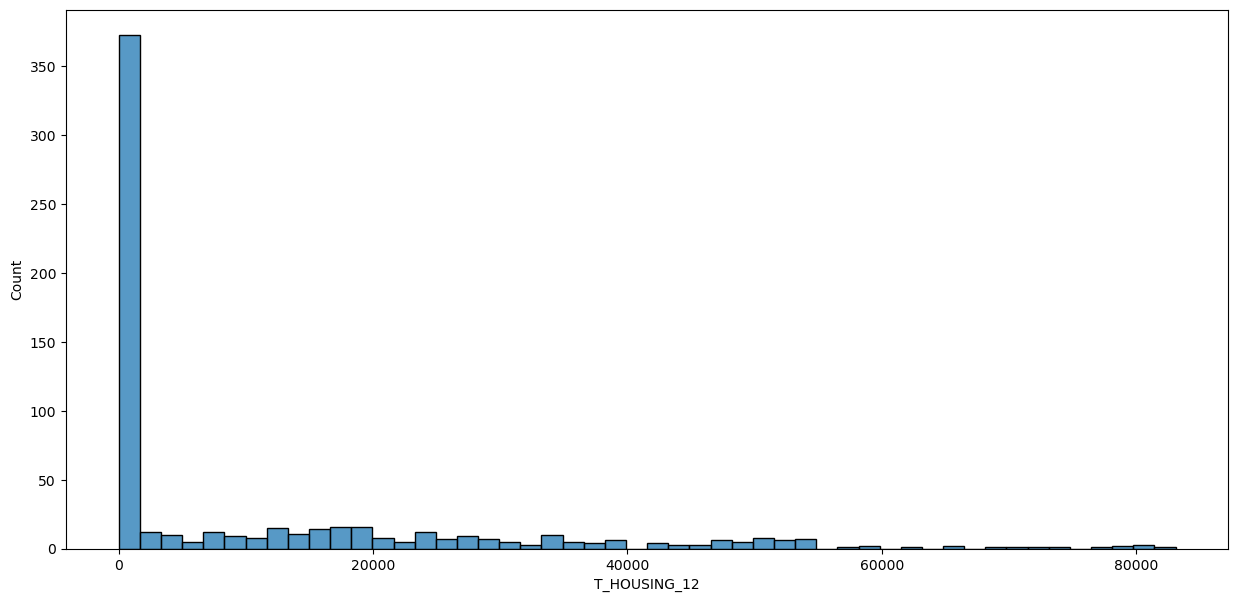

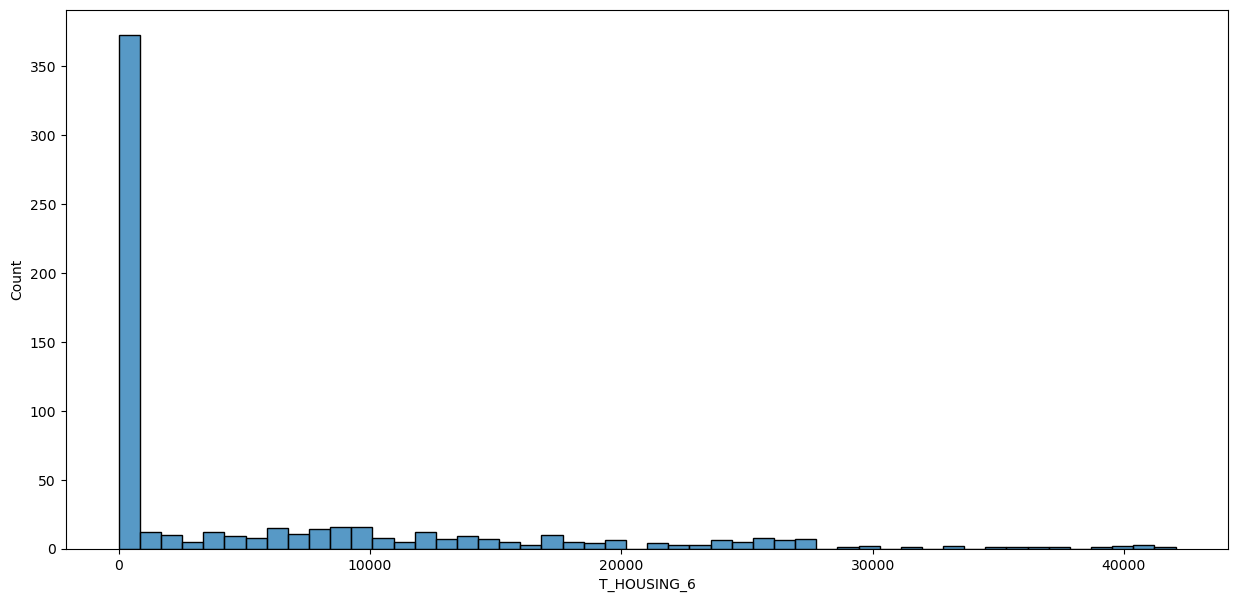

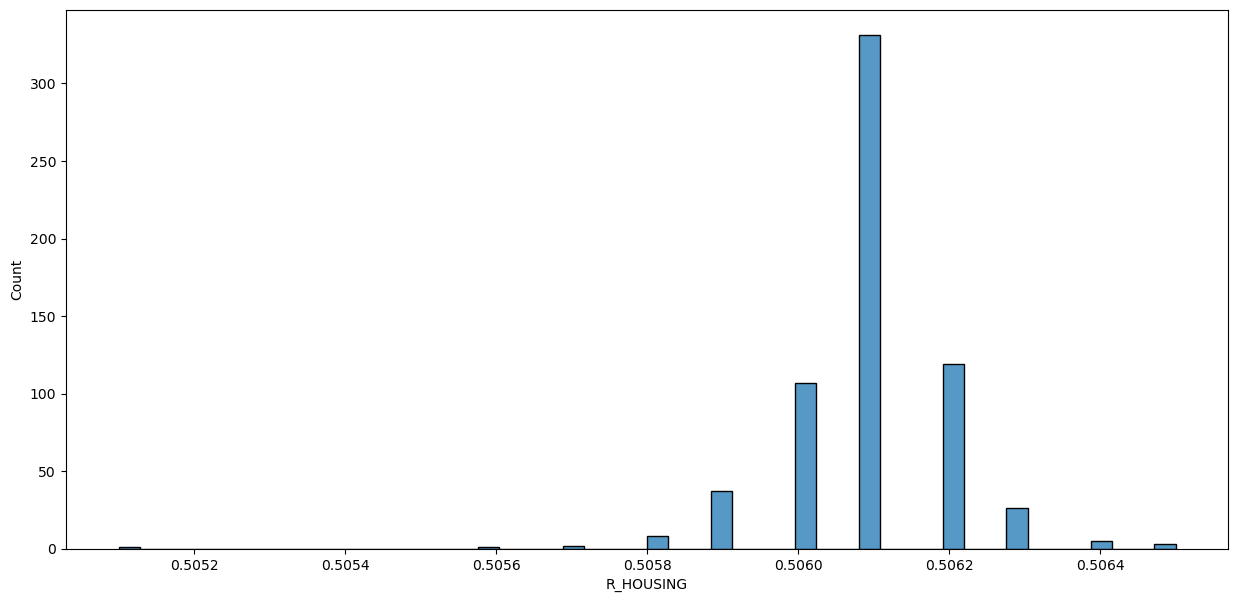

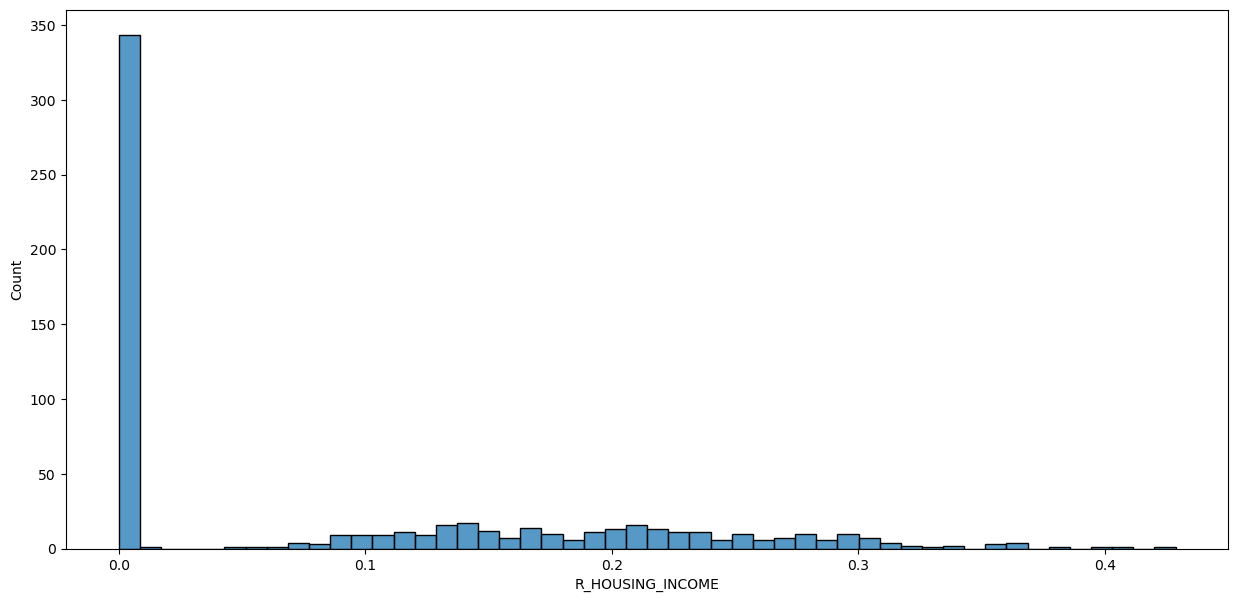

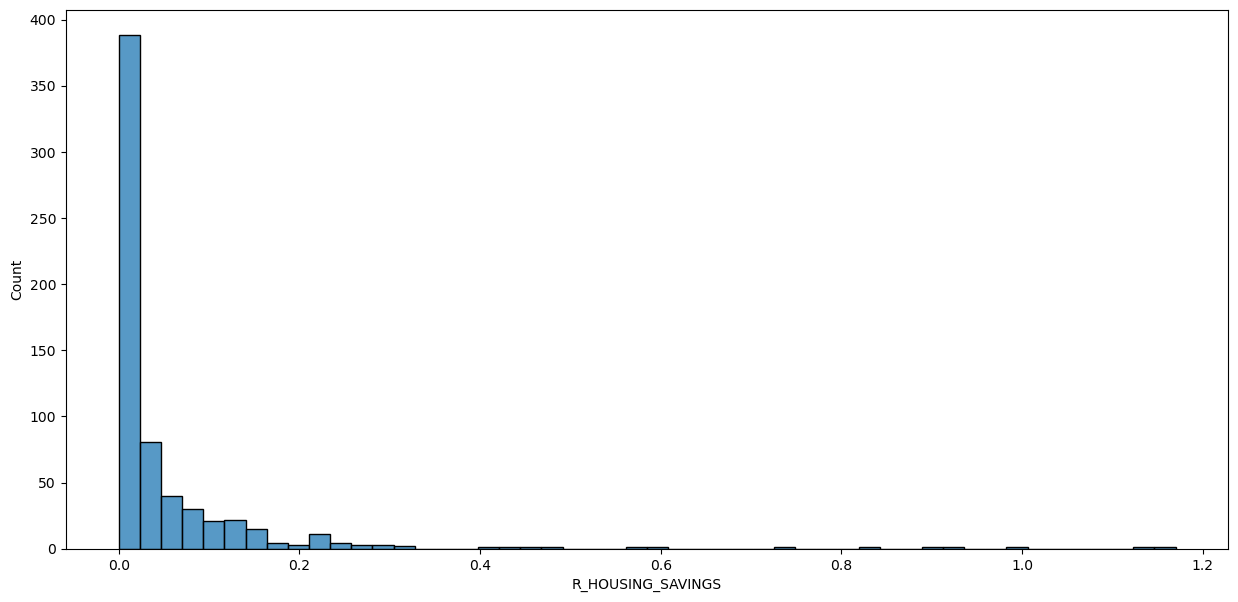

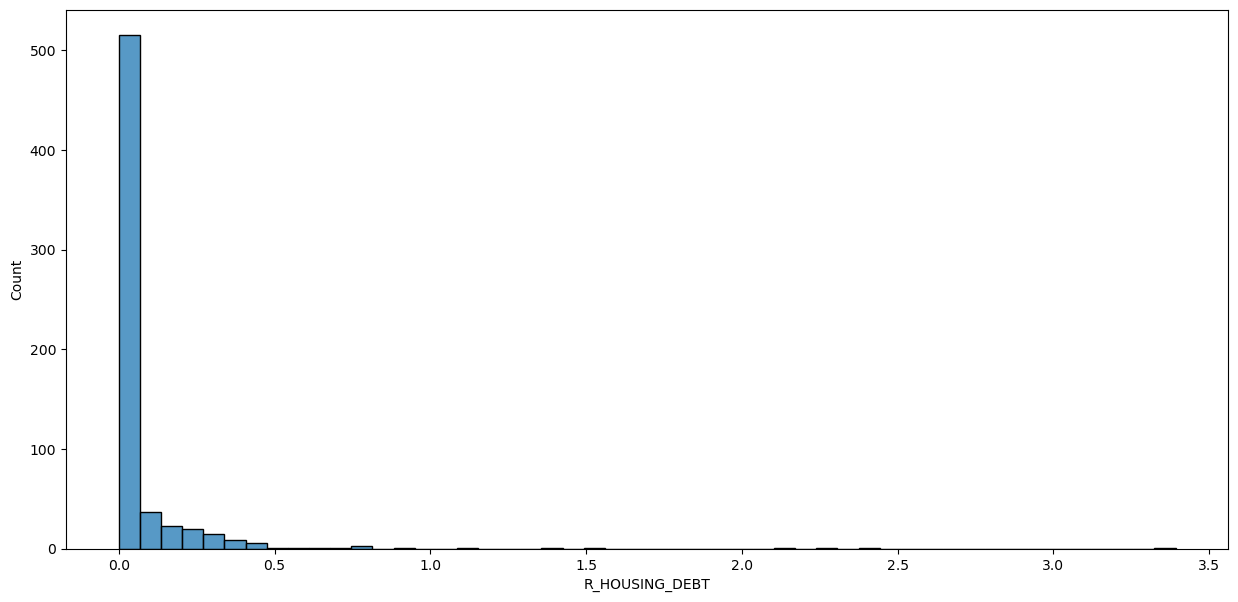

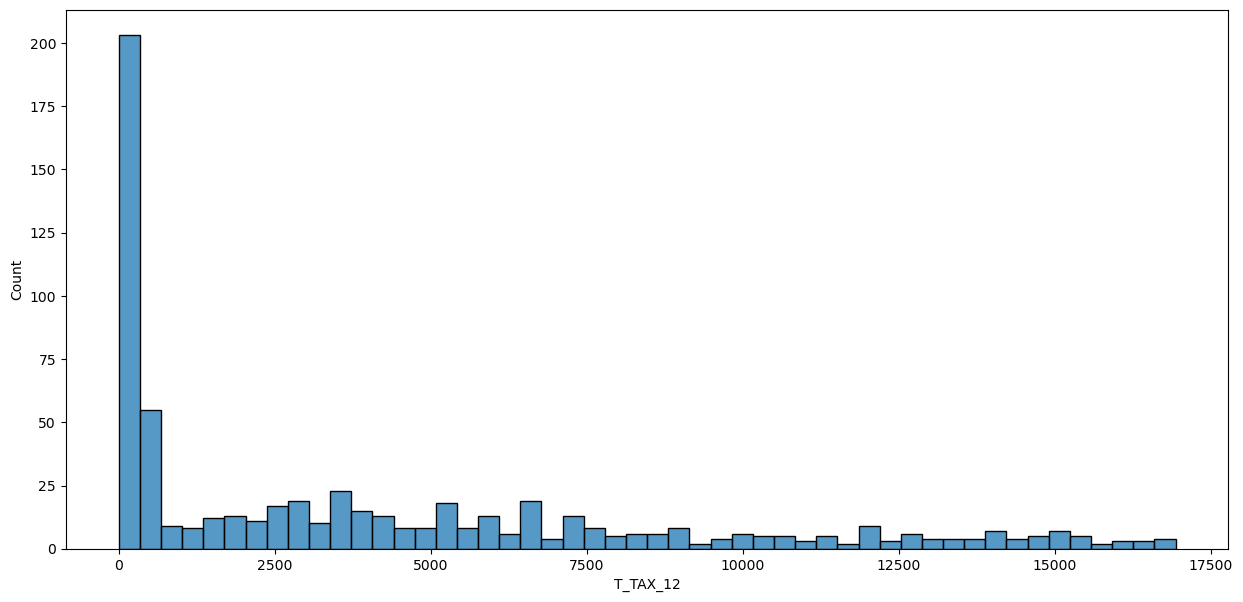

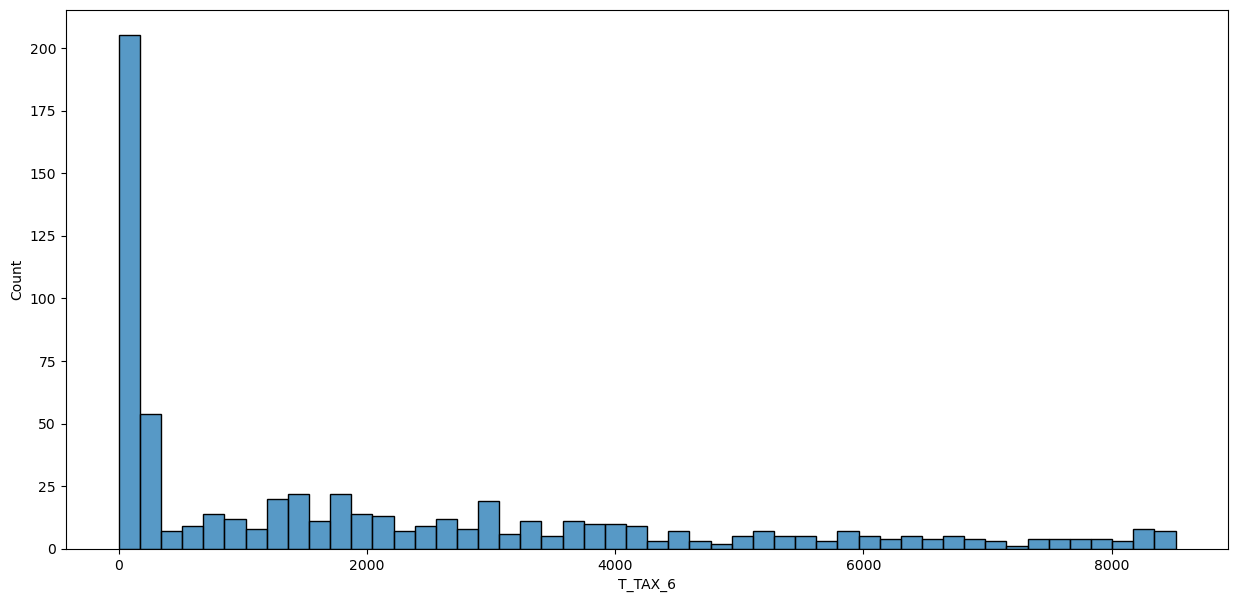

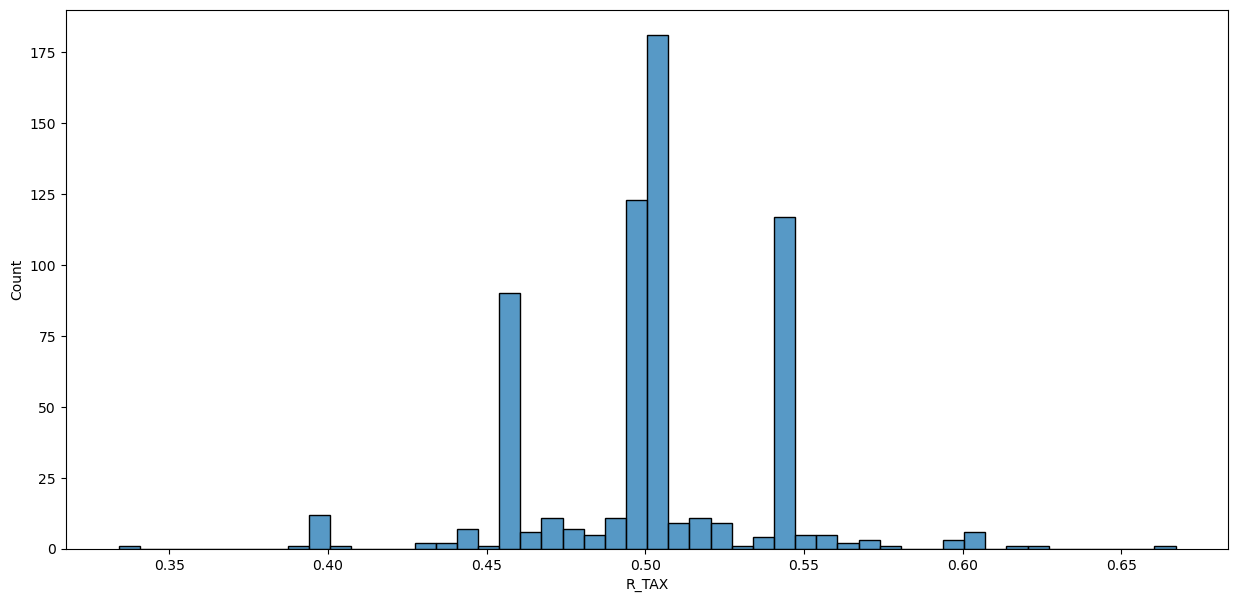

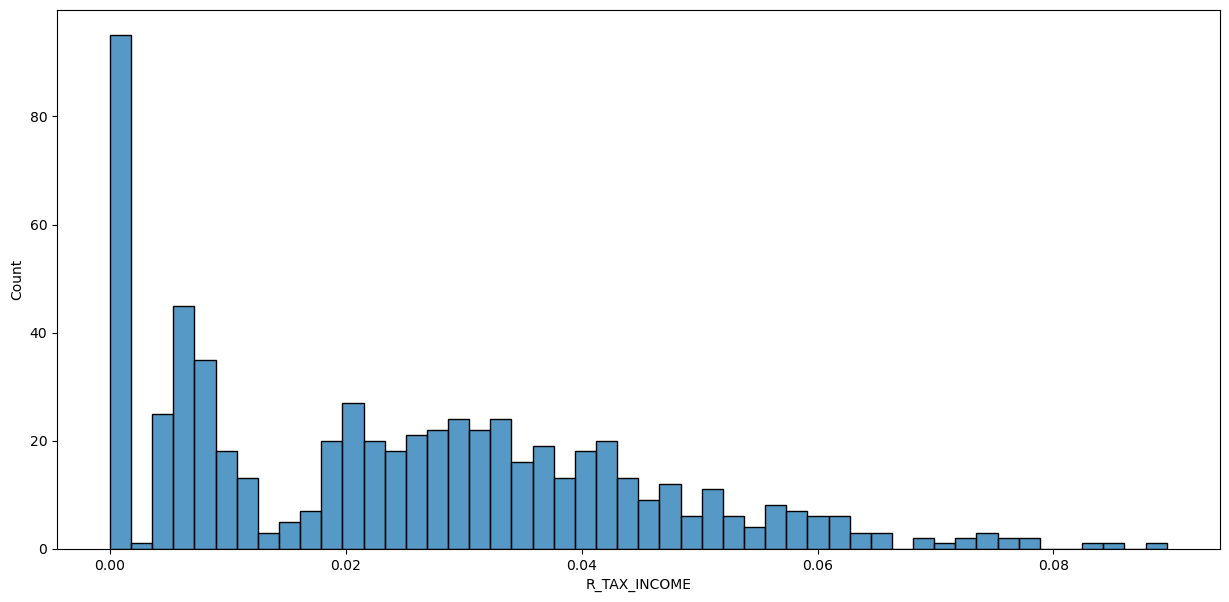

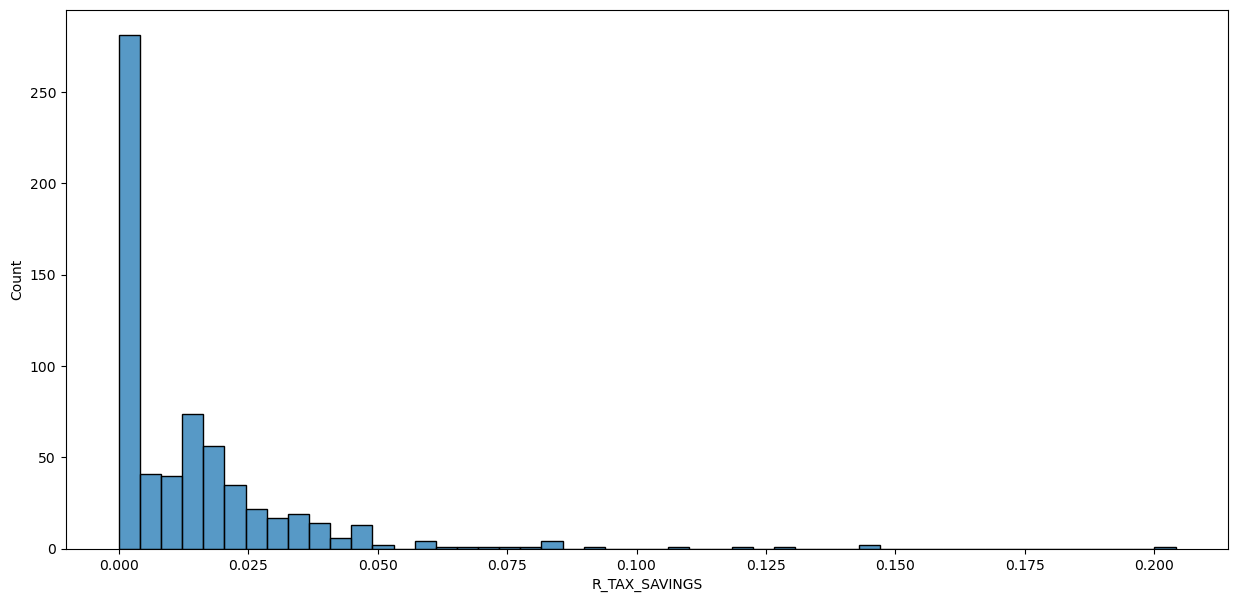

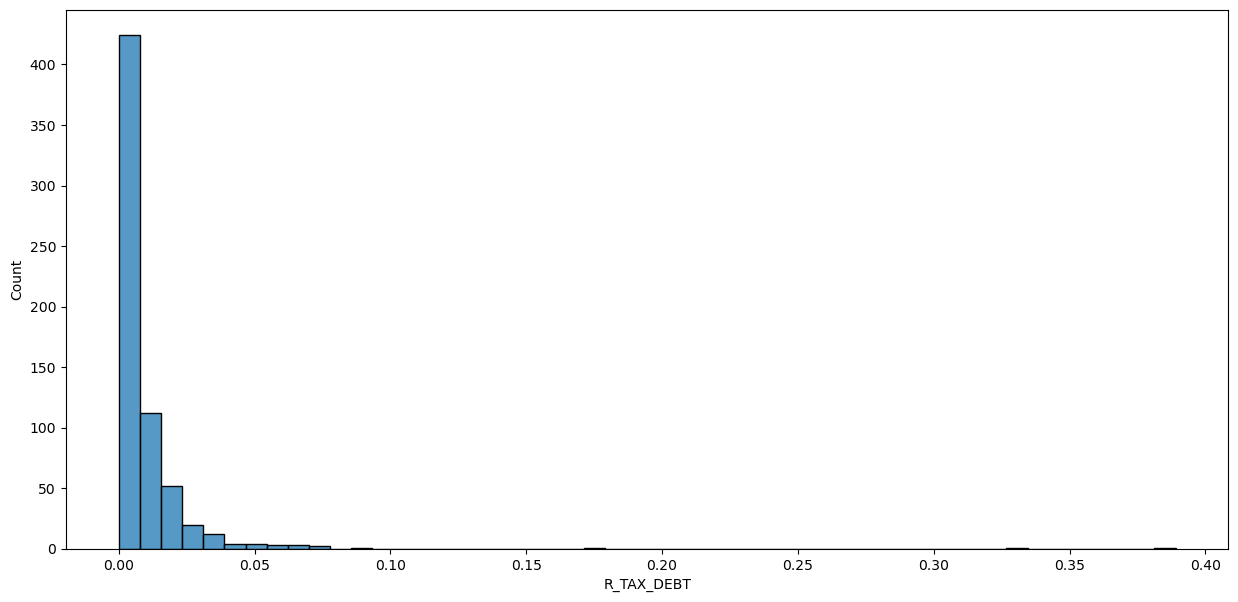

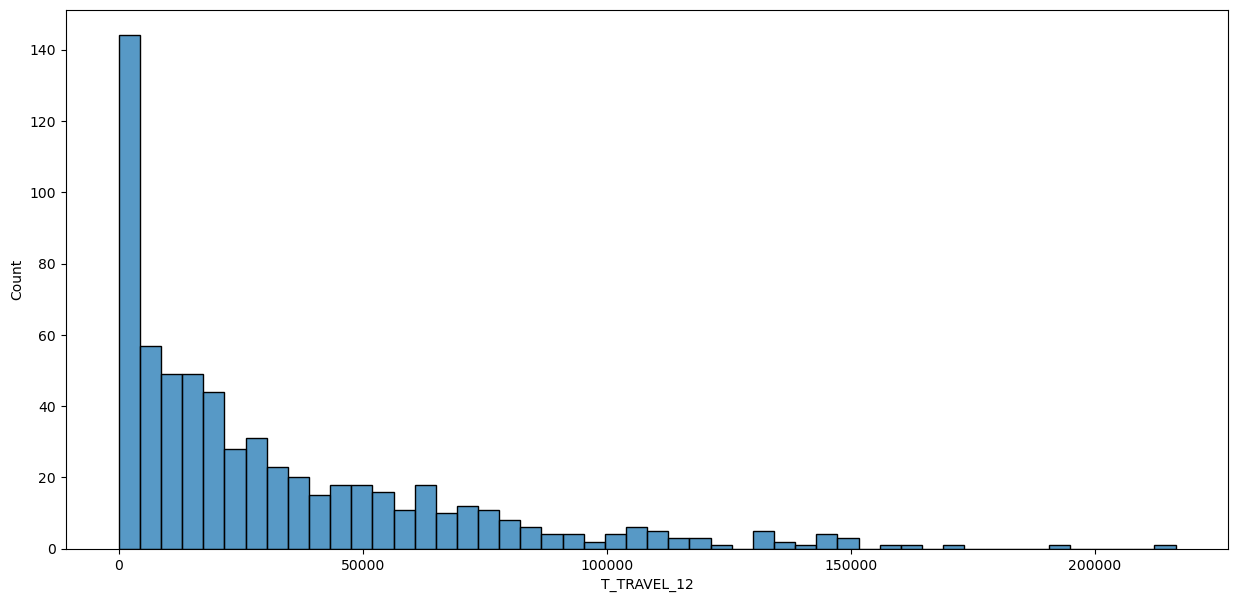

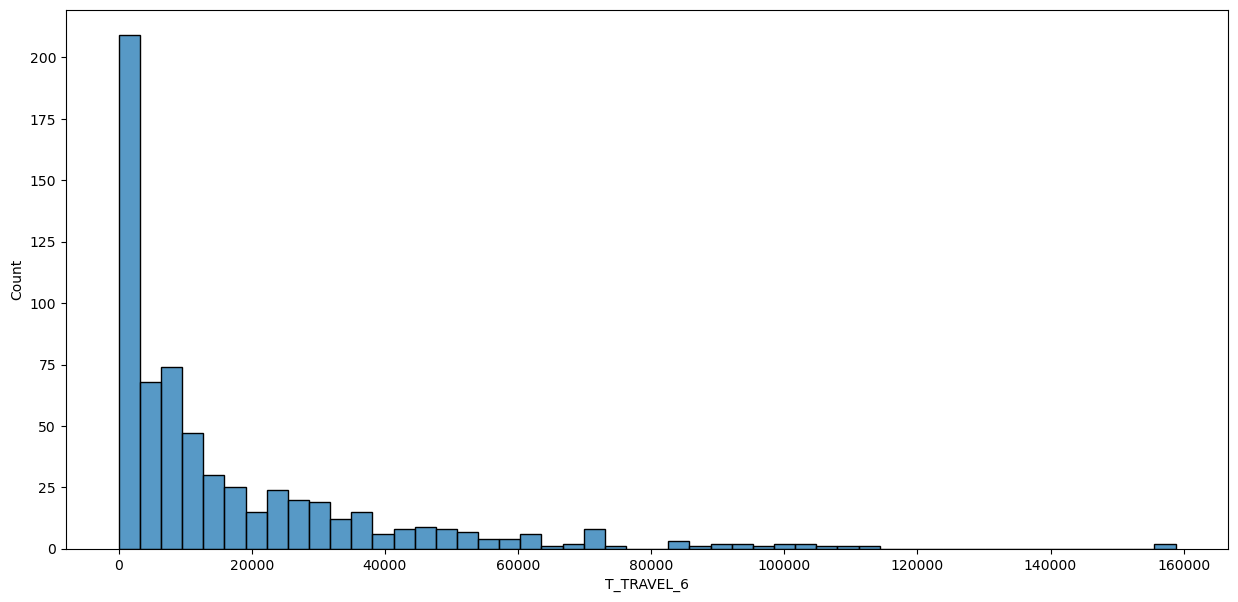

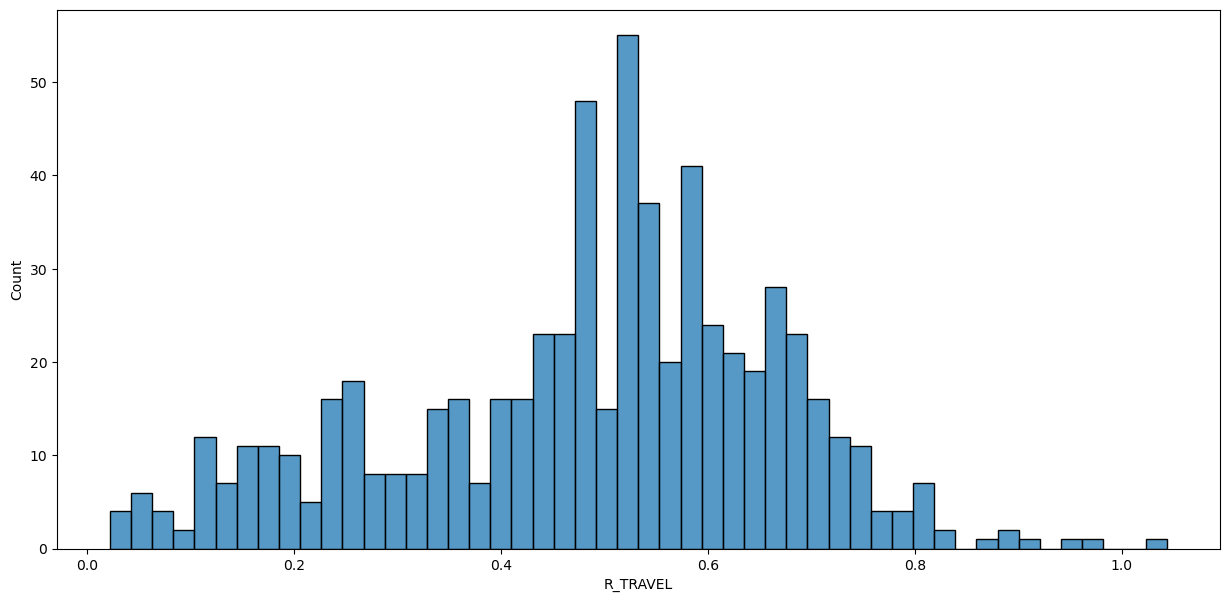

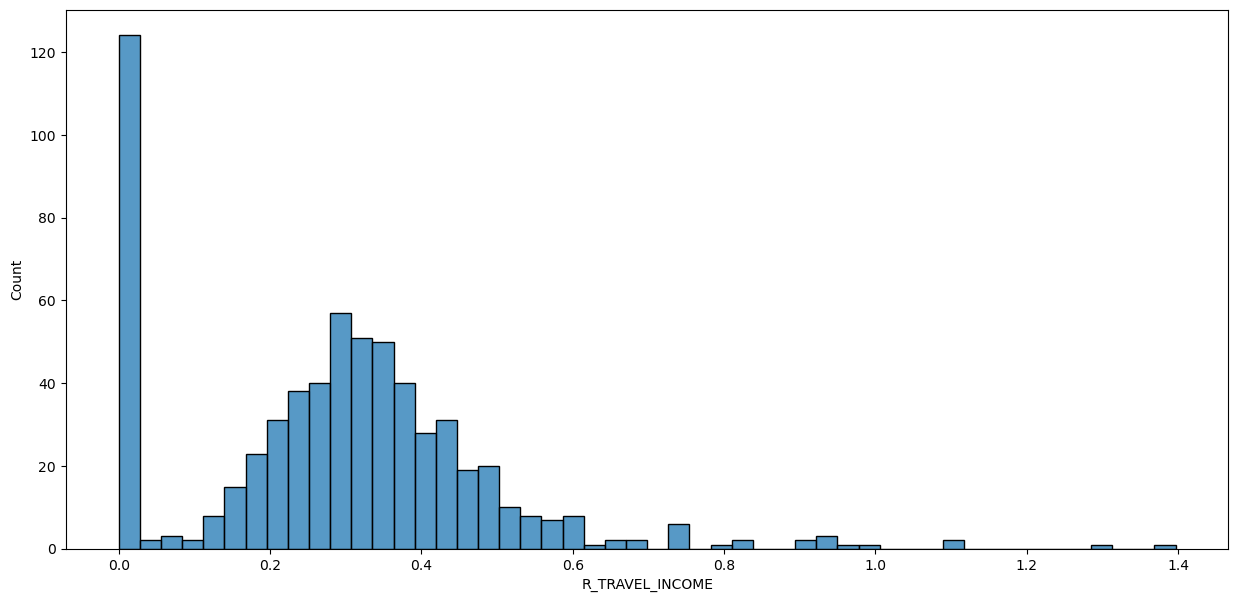

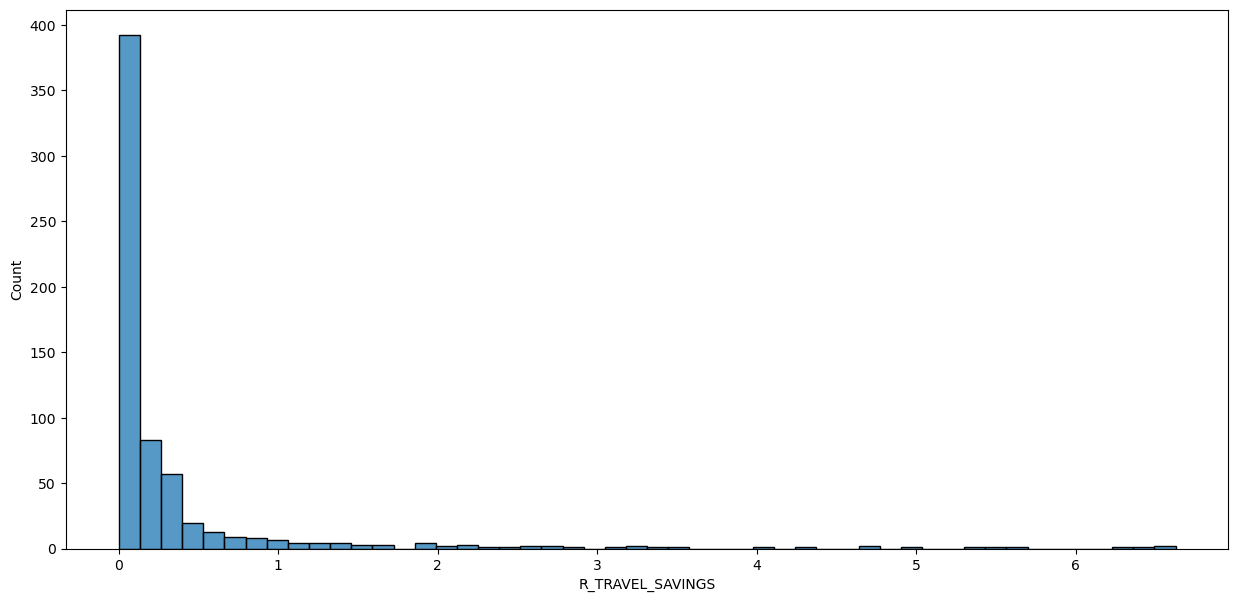

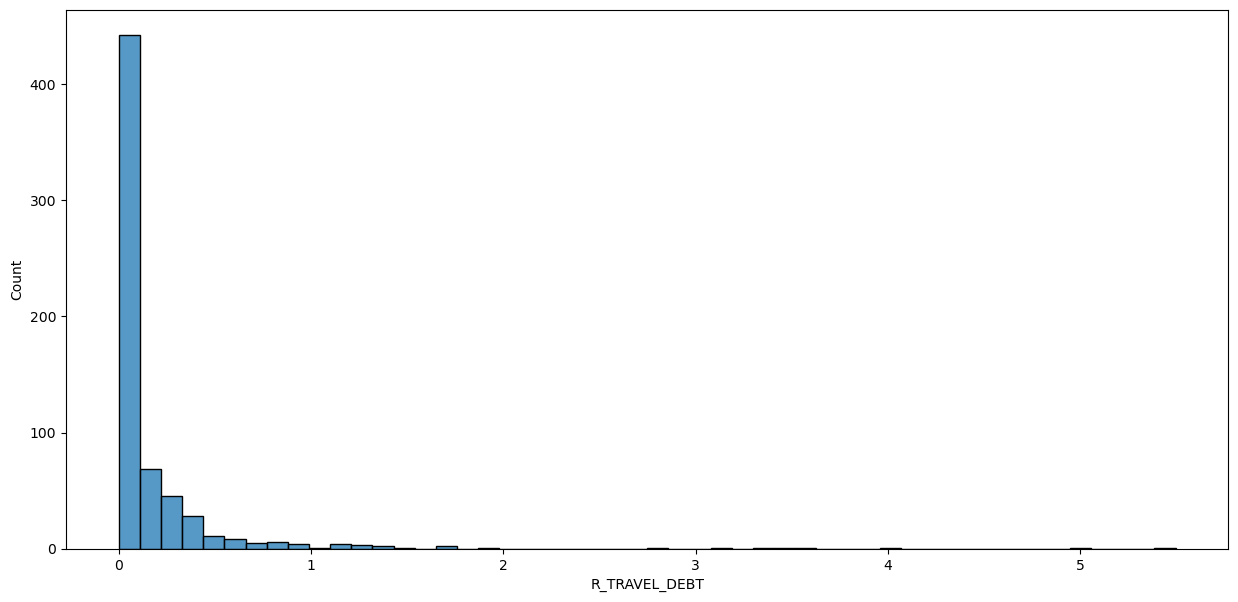

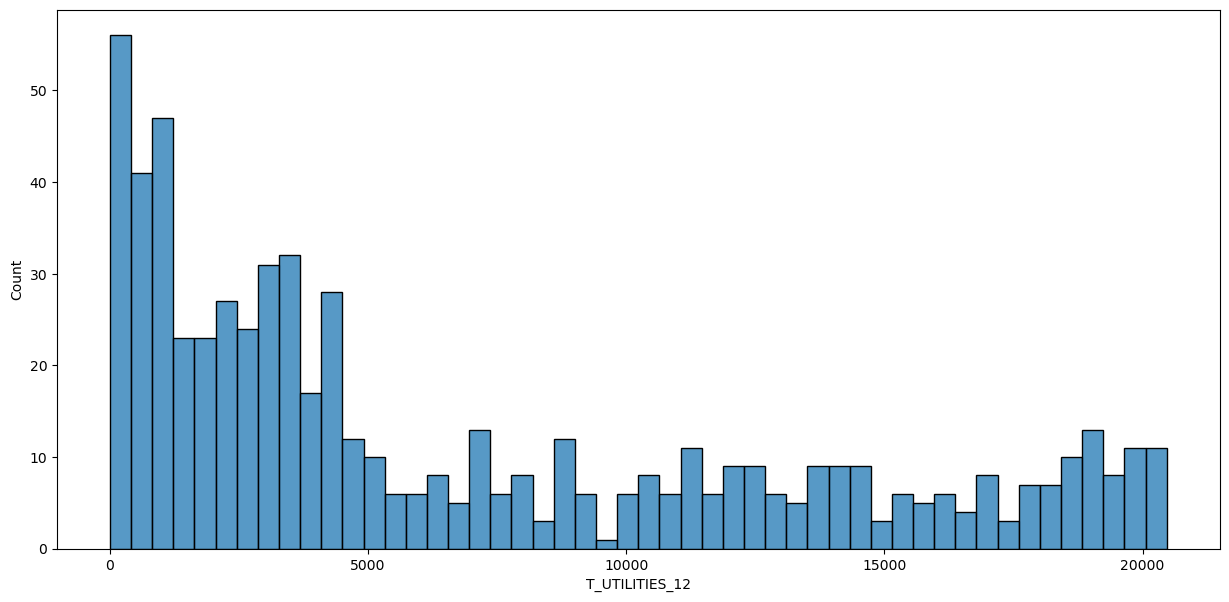

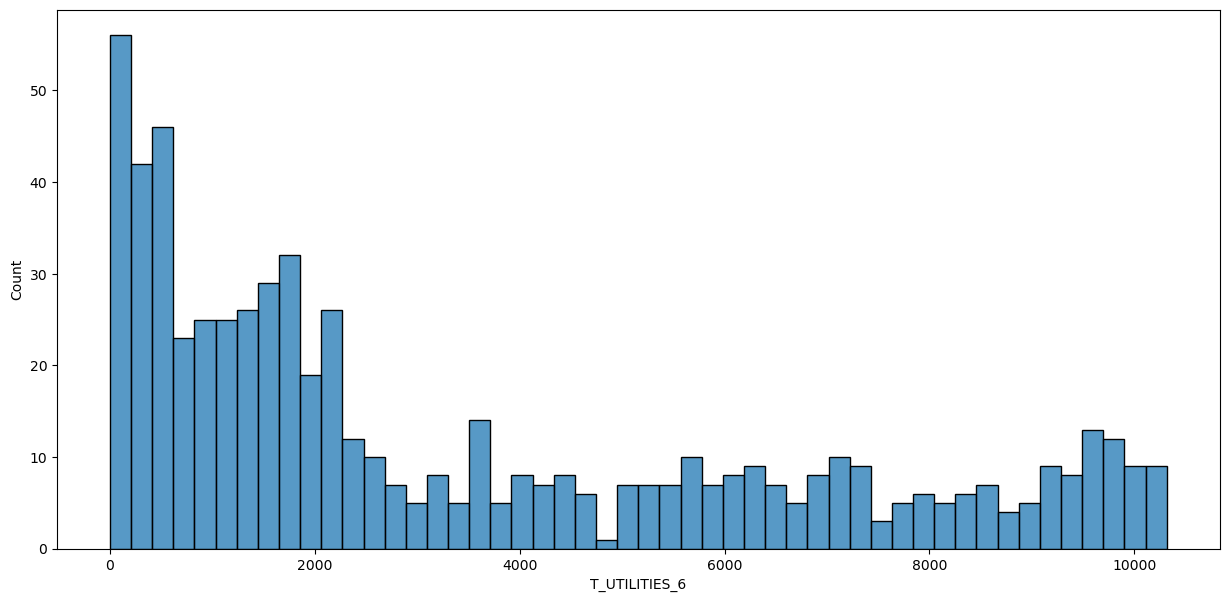

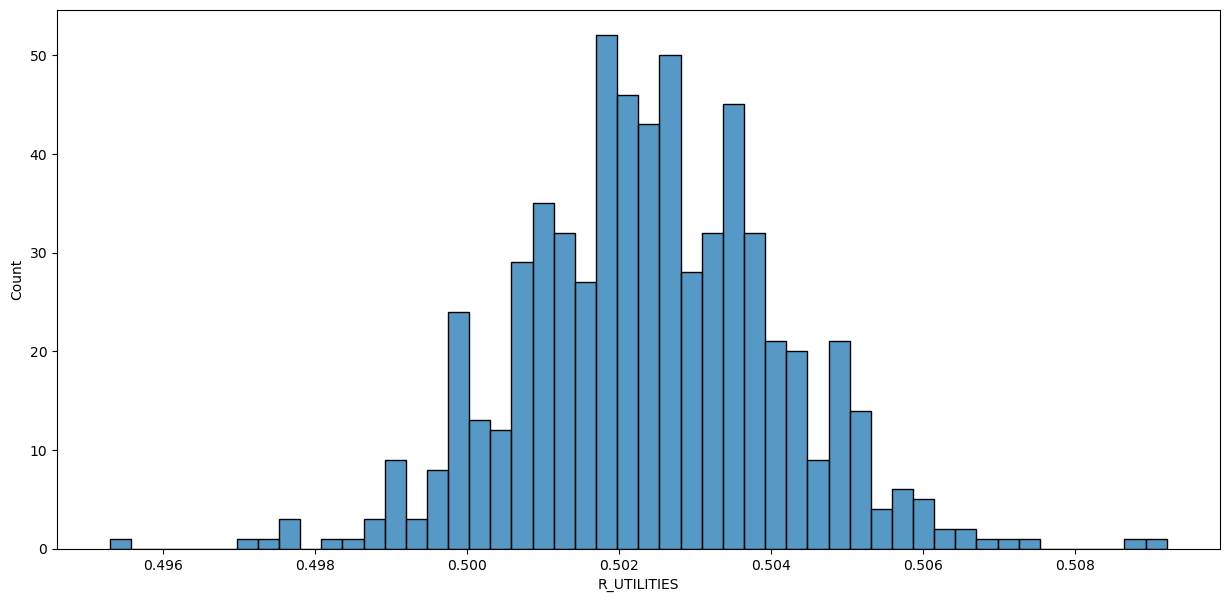

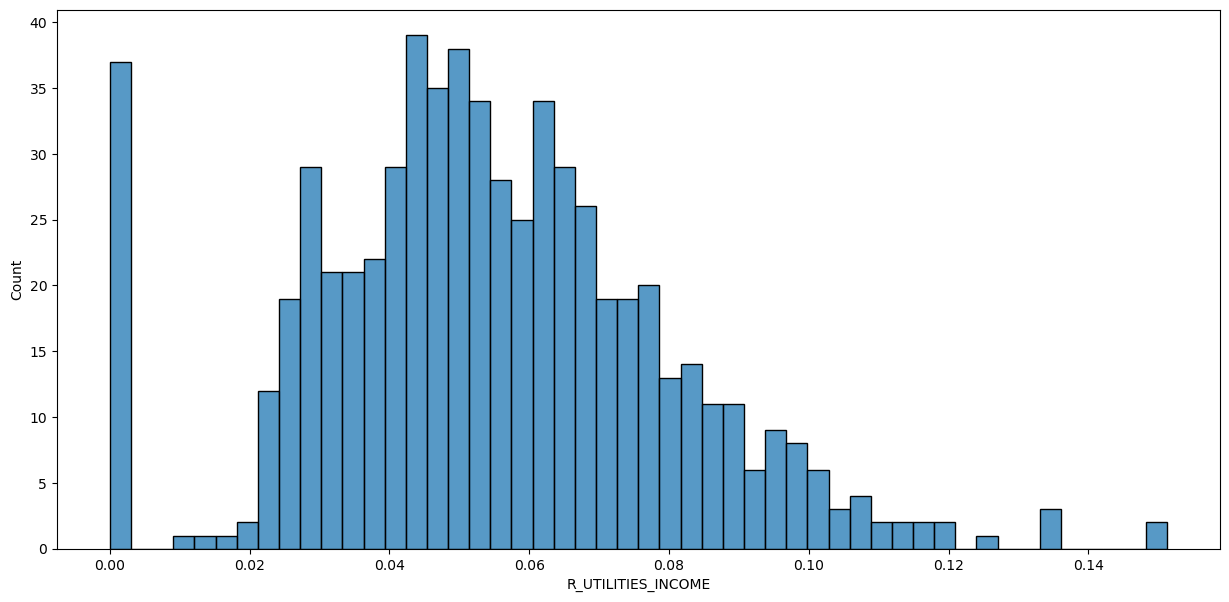

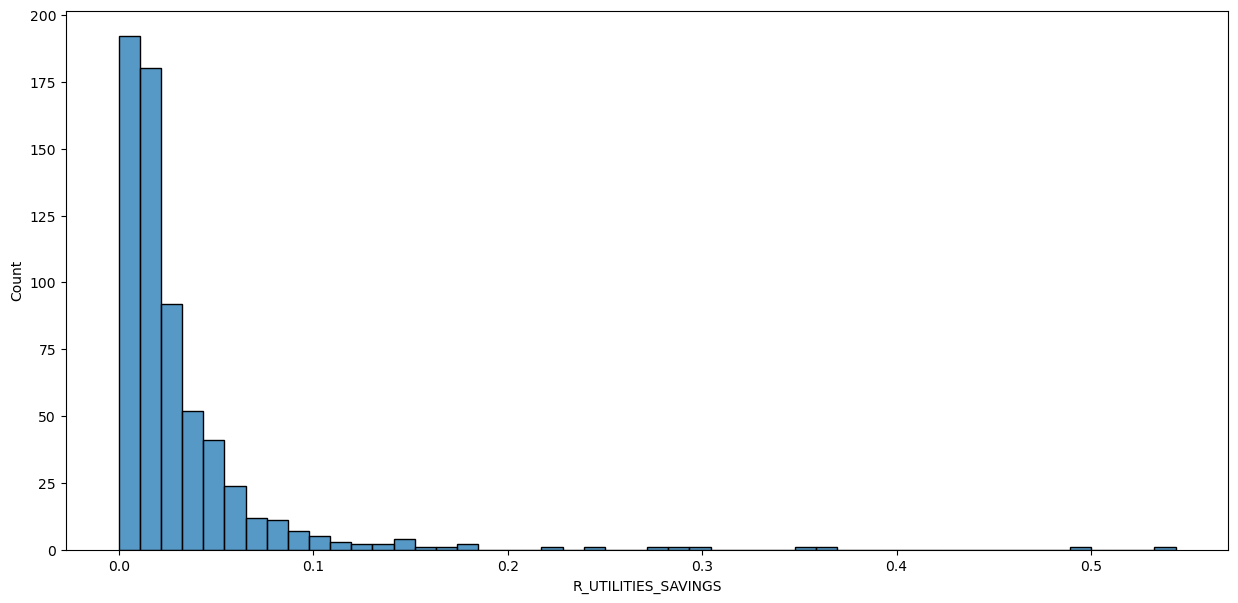

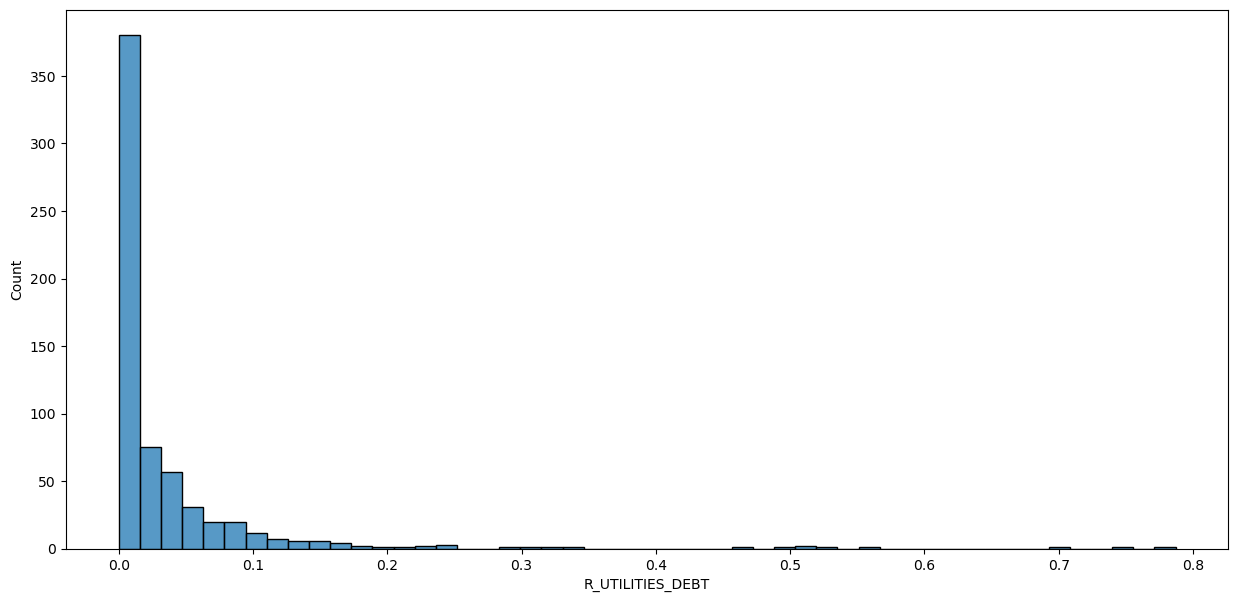

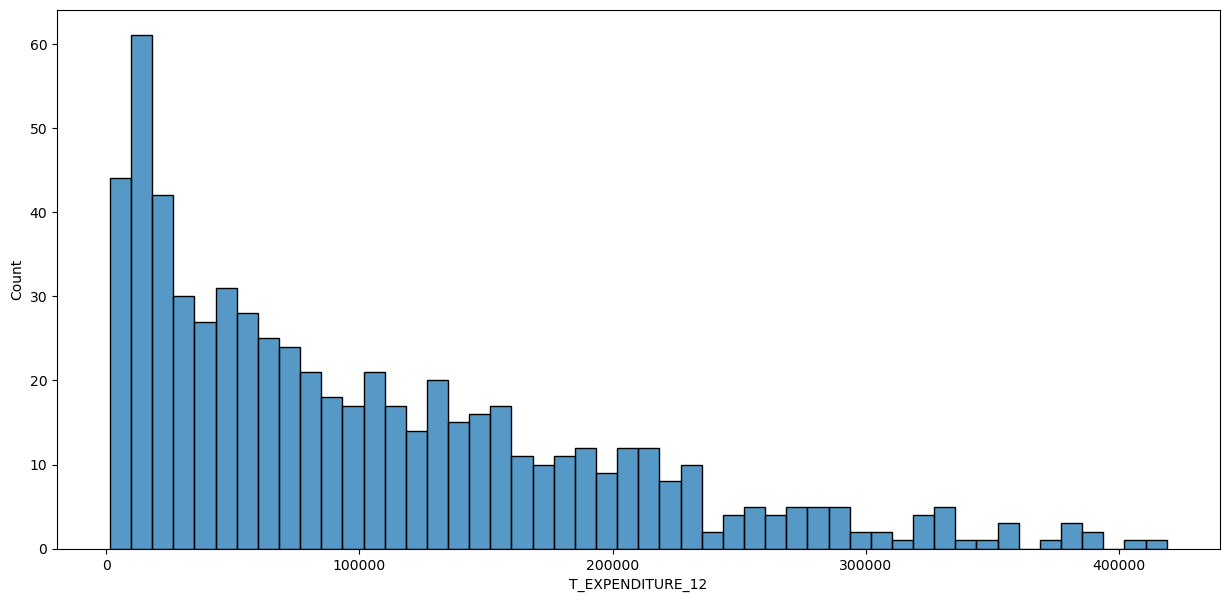

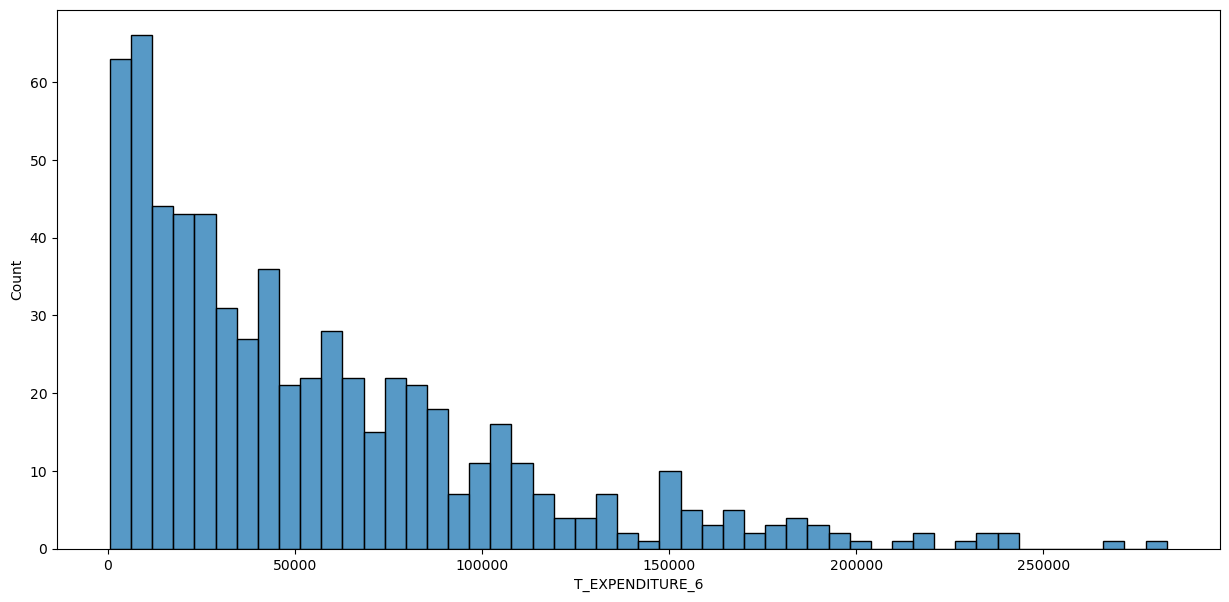

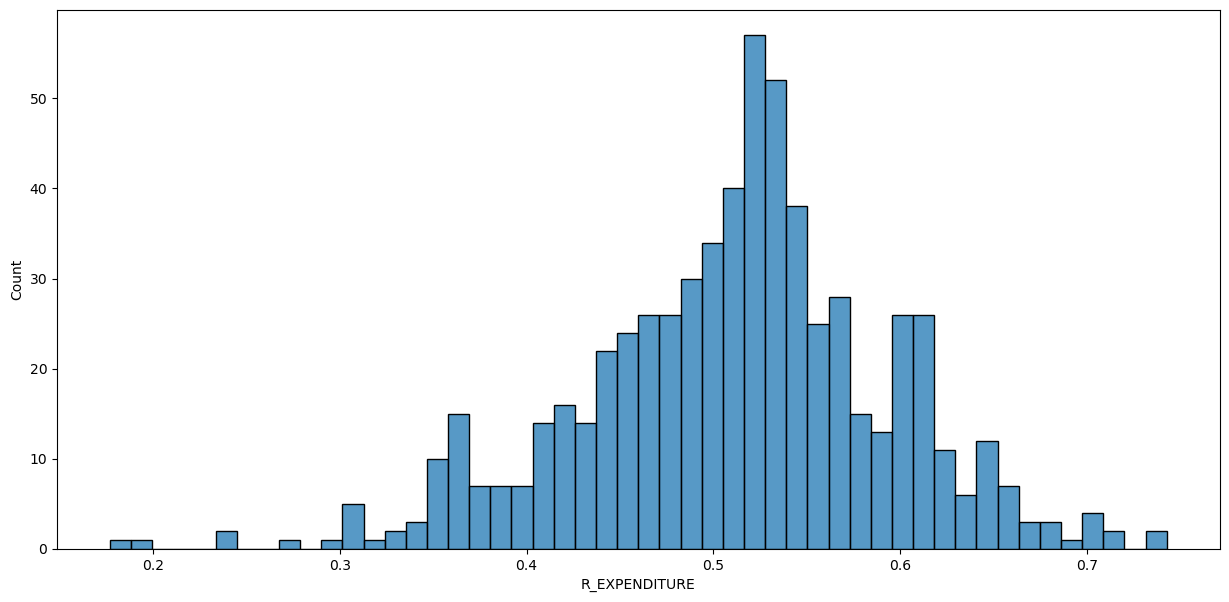

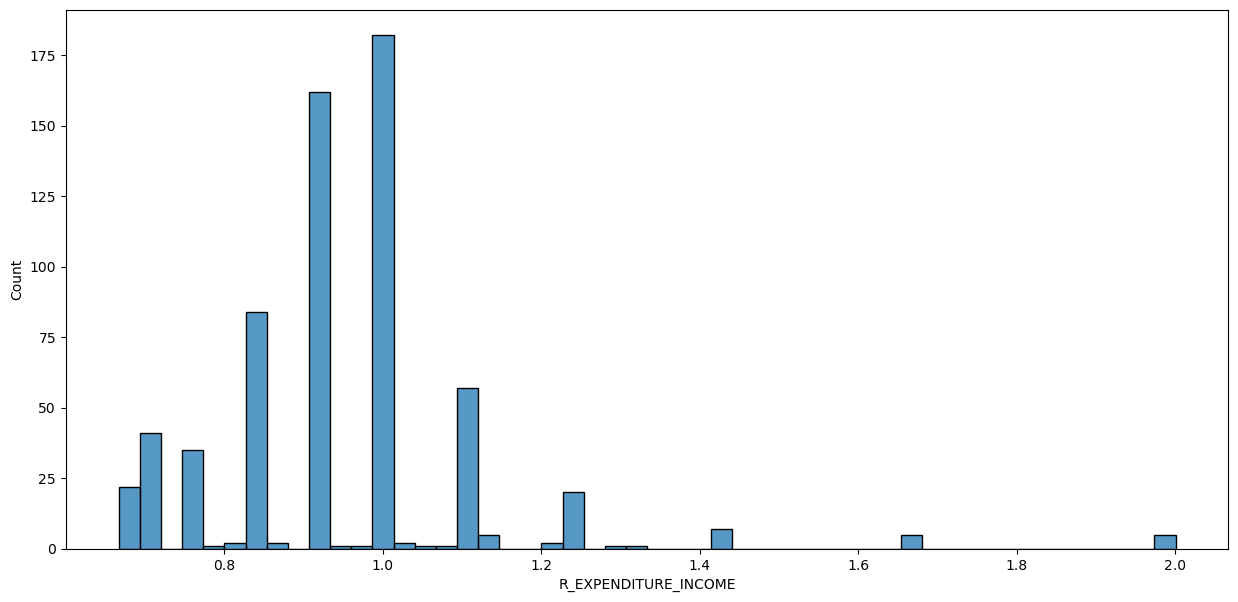

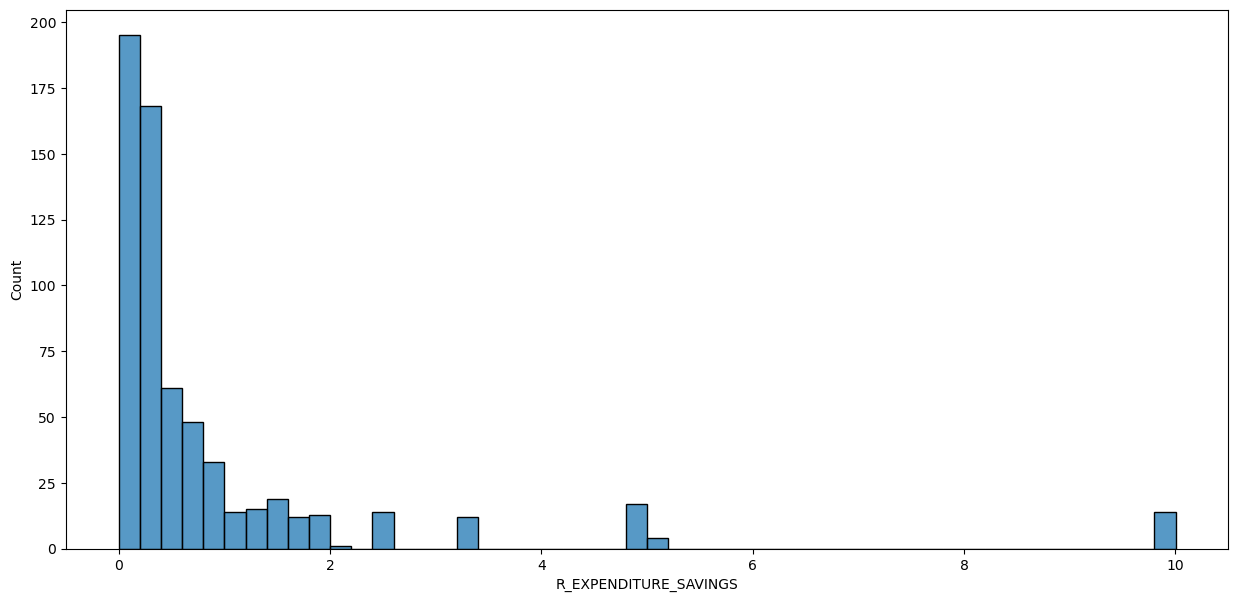

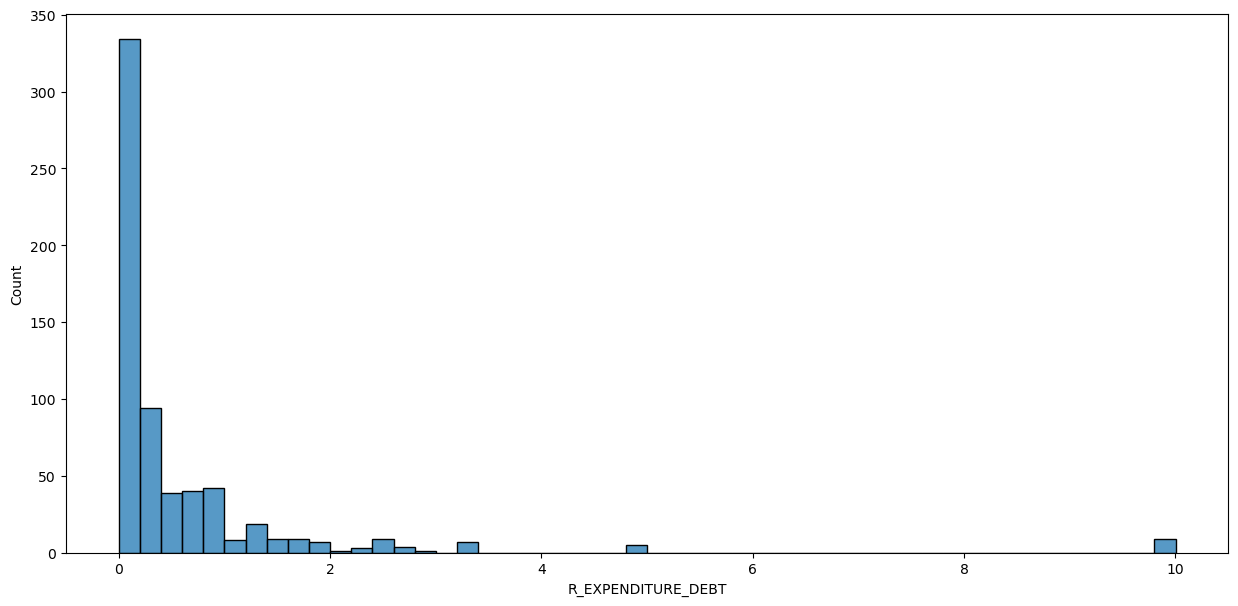

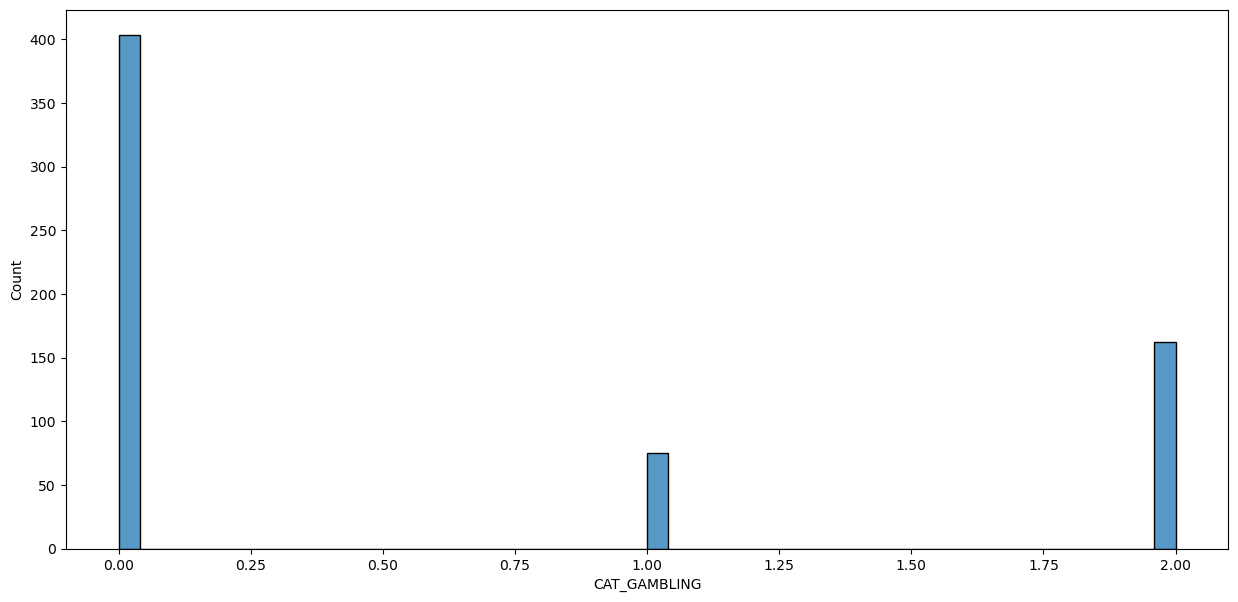

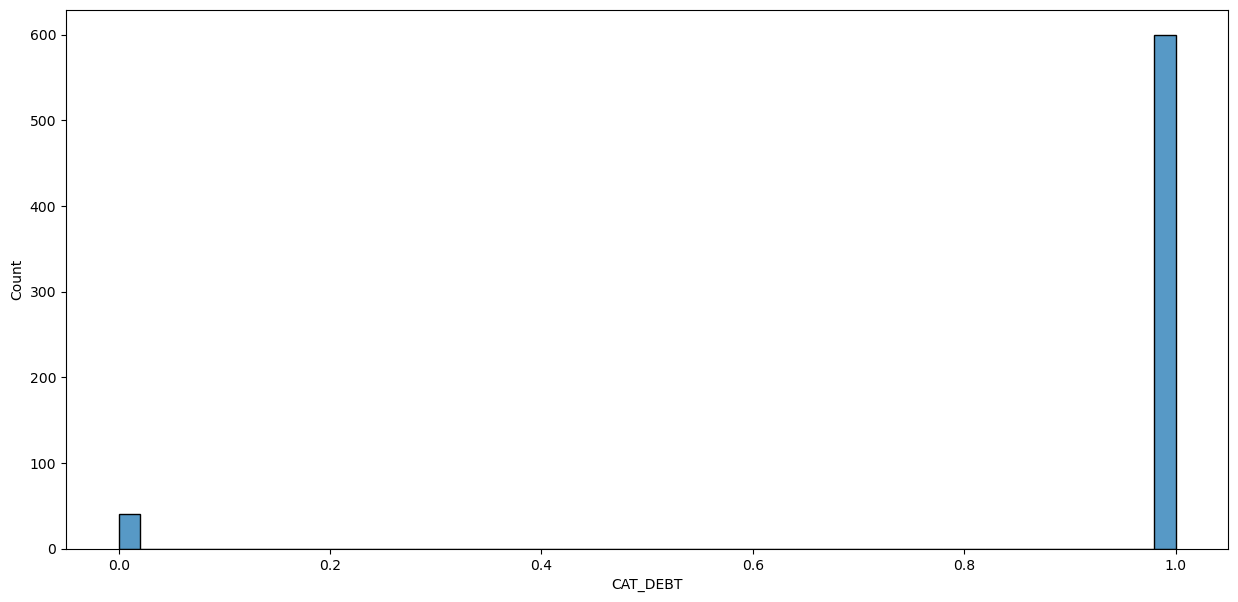

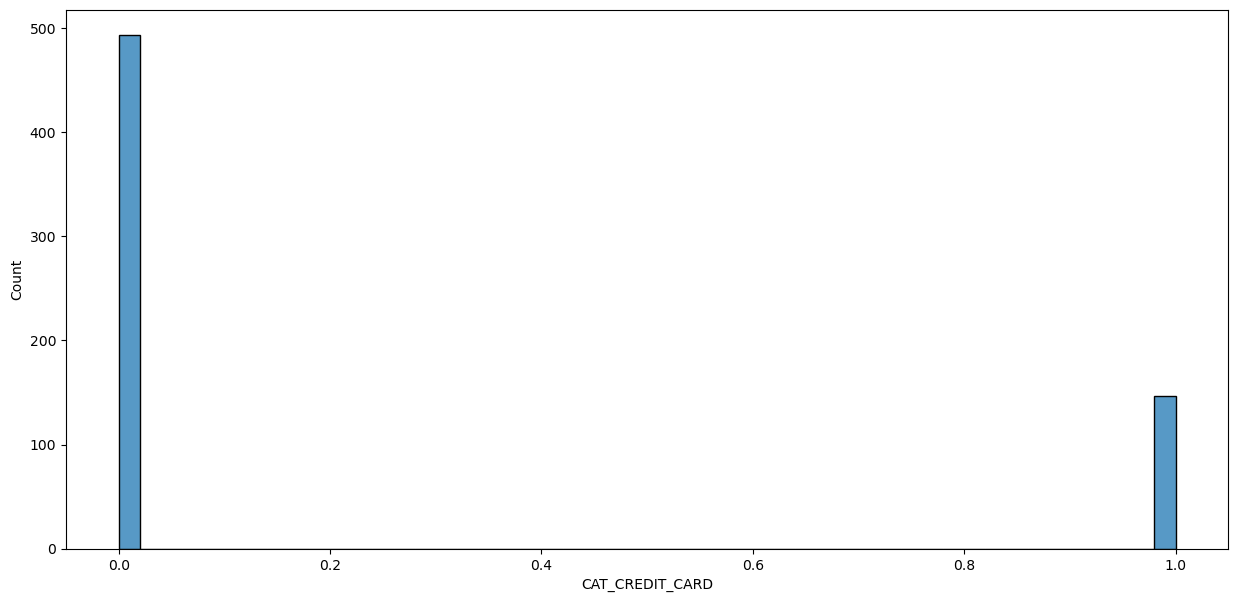

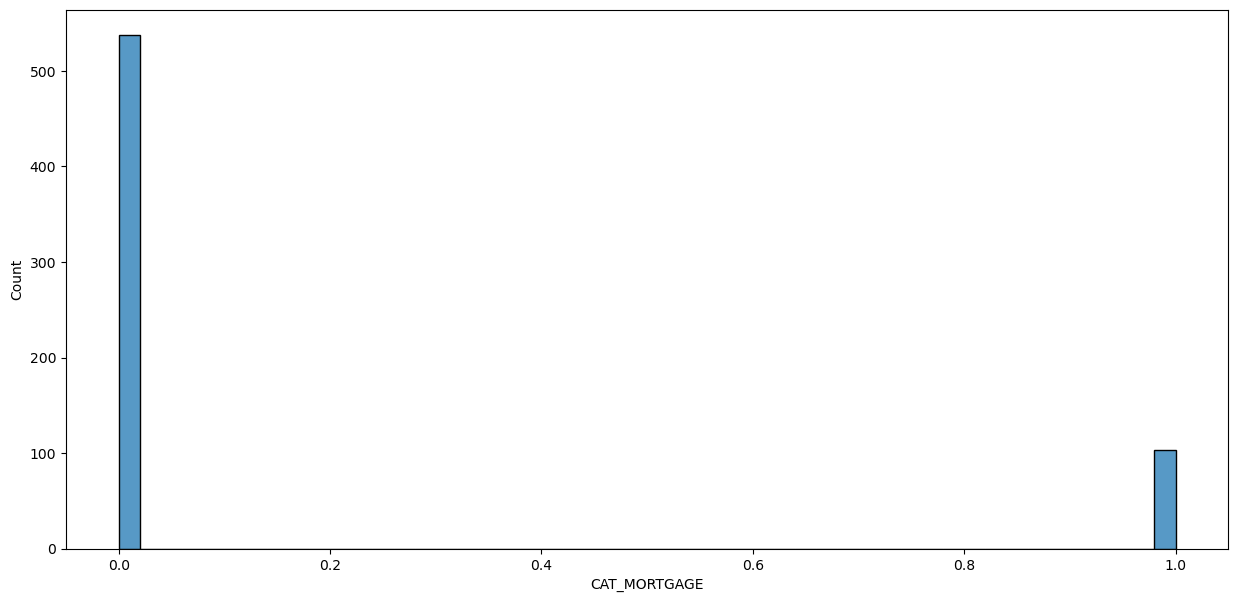

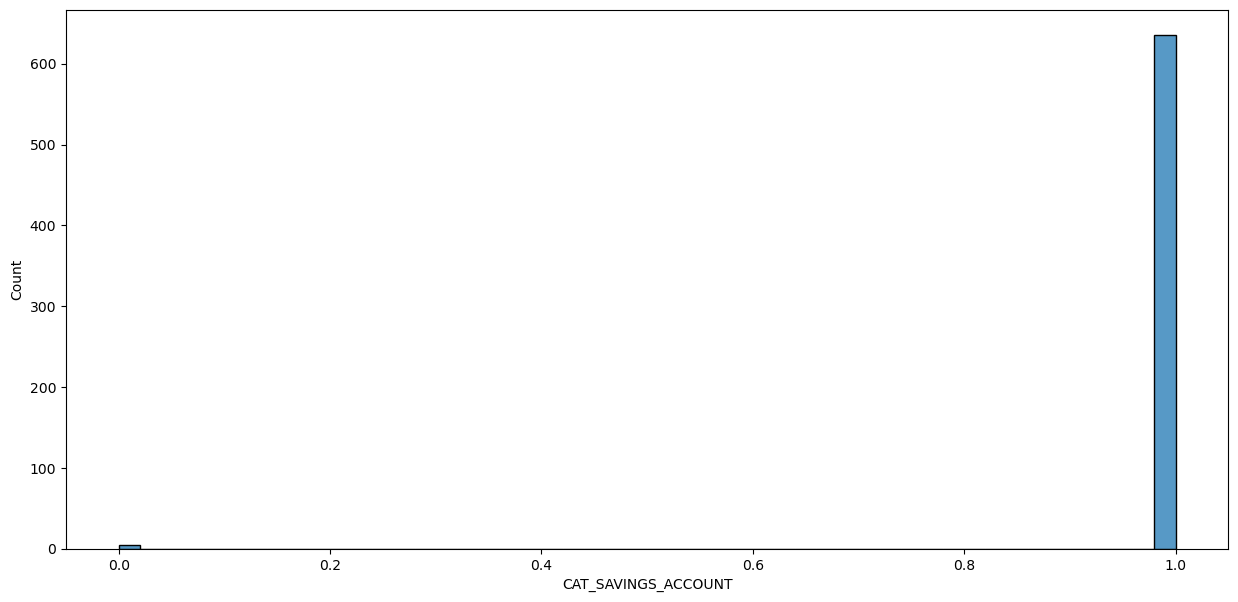

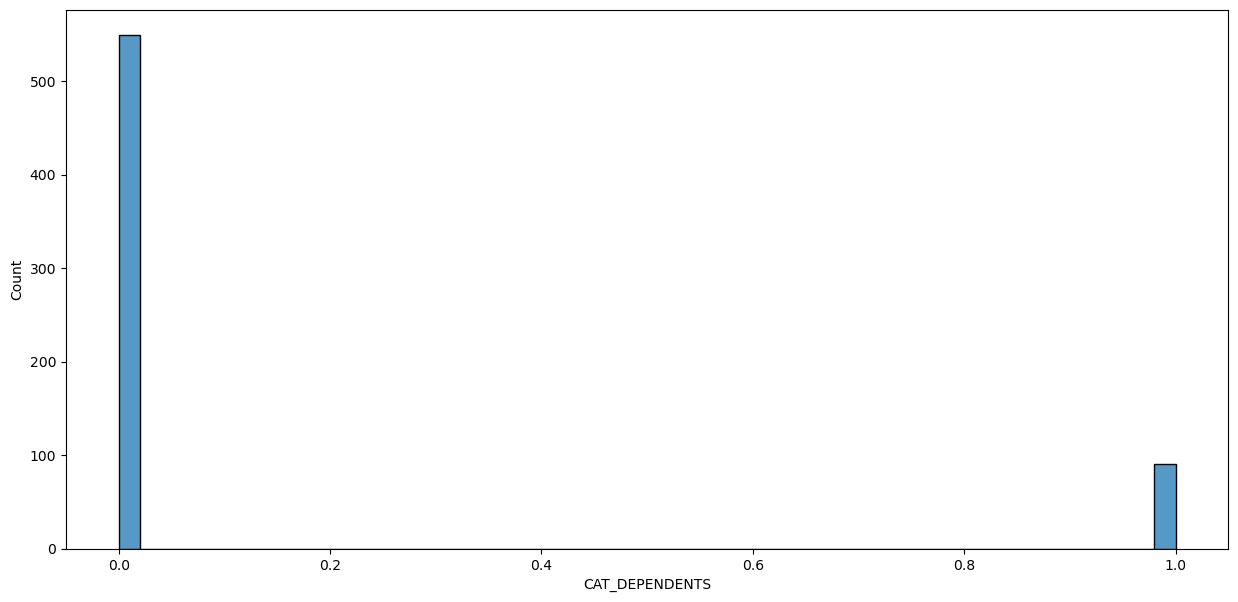

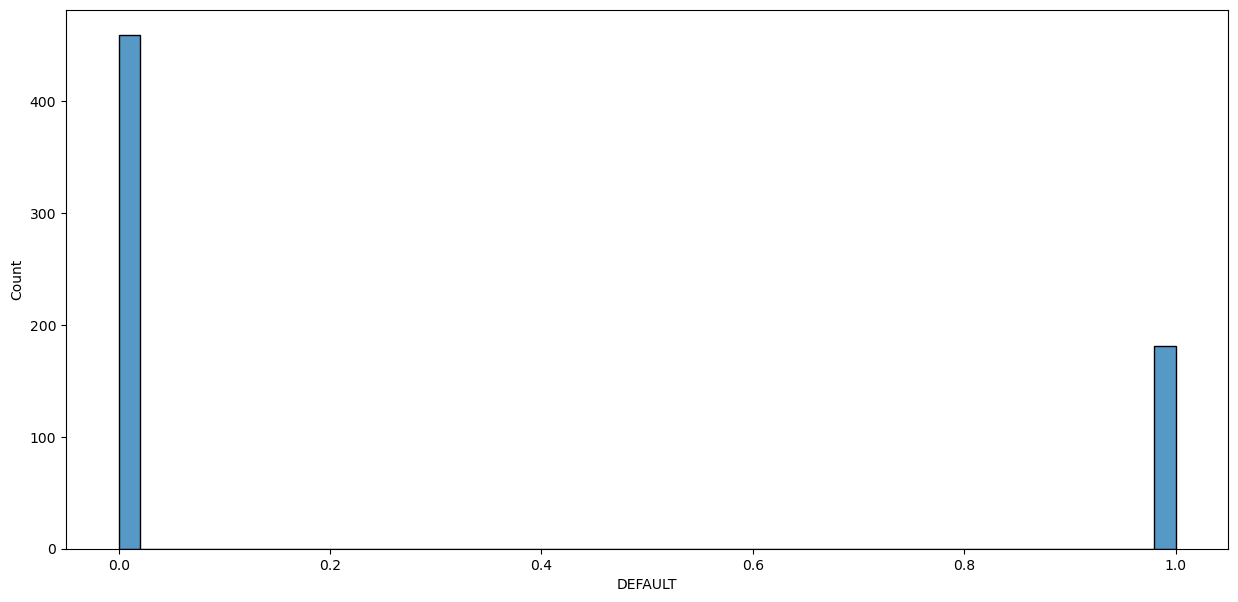

In [111]:
for column in train.columns:
    plt.figure(figsize=(15, 7)) 
    sns.histplot(train[column], bins=50)

<h1>Dealing with outliers</h1>

In [112]:
train['T_TRAVEL_6'].sort_values(ascending=False).to_numpy()

array([158788, 158046, 112871, 108156, 106815, 102124, 101899, 101581,
       100108,  97590,  93896,  92427,  89503,  89209,  86823,  85641,
        85005,  83043,  74809,  72292,  72028,  71554,  71416,  71163,
        71077,  70158,  69991,  69750,  69158,  66348,  63229,  62713,
        62658,  62303,  60760,  60585,  58859,  58612,  57423,  57299,
        56984,  55424,  55411,  54552,  53648,  53511,  53231,  52849,
        52406,  52349,  51426,  50393,  49998,  49438,  48295,  48114,
        47952,  47915,  47708,  47460,  47239,  45754,  45651,  45511,
        45496,  45238,  44793,  44719,  44155,  44061,  43495,  43329,
        43150,  41403,  41366,  41294,  41228,  40245,  40106,  39581,
        39295,  38259,  38041,  37714,  37696,  37525,  37518,  37451,
        37252,  37133,  36958,  36785,  36608,  36258,  36075,  35569,
        35377,  34929,  34072,  33552,  33408,  33285,  33208,  33034,
        32773,  32413,  32359,  32176,  31863,  31698,  31239,  31216,
      

2 outliers here

In [113]:
train[train['T_TRAVEL_6']>150000]

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,DEFAULT
75,414920,1357920,2414080,3.2727,5.8182,1.7778,33407,23191,0.6942,0.0805,...,0.9091,0.2778,0.1562,2,1,1,0,1,0,0
770,502583,963284,1088929,1.9167,2.1667,1.1304,24957,22274,0.8925,0.0497,...,0.8333,0.4348,0.3846,2,1,0,1,1,0,1


In [114]:
# replacing the value with the maximum value

train['T_TRAVEL_6'].replace(158788, 112871, inplace=True)
train['T_TRAVEL_6'].replace(158046, 112871, inplace=True)

In [115]:
train['T_TRAVEL_12'].sort_values(ascending=False).to_numpy()

array([216557, 194290, 172948, 161114, 157319, 150091, 149348, 148050,
       147255, 146689, 144257, 142984, 140276, 136010, 135886, 132518,
       131793, 131146, 131052, 130447, 123143, 119269, 118519, 117286,
       115310, 114336, 112817, 111178, 110808, 110732, 109163, 109005,
       107765, 107060, 106763, 105346, 104306, 104010, 102172, 101862,
       101599, 101033,  98441,  95486,  94163,  92440,  91618,  90994,
        87960,  87674,  87664,  87627,  86153,  85909,  84838,  83331,
        83039,  82483,  81858,  81412,  81408,  79811,  79103,  78501,
        78487,  78013,  77557,  77484,  77471,  77291,  76000,  75881,
        75630,  75582,  74298,  74180,  73691,  73380,  72611,  71666,
        71332,  70565,  70463,  70120,  69962,  69881,  69536,  69529,
        69350,  67464,  66937,  66848,  66650,  66433,  66263,  66245,
        66238,  65680,  65110,  64952,  63977,  63959,  63904,  63792,
        63583,  63576,  63455,  63180,  62695,  61977,  61850,  61609,
      

In [116]:
train['T_TRAVEL_12'].sort_values(ascending=False)

770    216557
75     194290
477    172948
631    161114
642    157319
        ...  
528         0
53          0
408         0
405         0
35          0
Name: T_TRAVEL_12, Length: 640, dtype: int64

In [117]:
train['T_TRAVEL_12'].replace(216557, 112871, inplace=True)
train['T_TRAVEL_12'].replace(194290, 112871, inplace=True)

In [118]:
train['T_HEALTH_6'].sort_values(ascending=False)

404    25322
75     17927
770    17874
237    17427
728    17312
       ...  
396        0
794        0
735        0
722        0
772        0
Name: T_HEALTH_6, Length: 640, dtype: int64

1 outlier

In [119]:
train['T_HEALTH_6'].replace(25322, 17927, inplace=True)

In [120]:
train['T_HEALTH_12'].sort_values(ascending=False)

404    32654
75     26977
158    25328
556    24734
555    23871
       ...  
709        0
356        0
313        0
331        0
348        0
Name: T_HEALTH_12, Length: 640, dtype: int64

1 the same outlier

In [121]:
train['T_HEALTH_12'].replace(32654, 26977, inplace=True)

In [122]:
for column in train.columns:
    print(column, train[train[column]==0].shape[0])

    # division by T_EDUCATION_12, T_FINES_12, T_GAMBLING_12, T_HOUSING_12, T_TAX_12, T_TRAVEL_12 has no sense, to much zeros and NaNs
    # 

INCOME 31
SAVINGS 5
DEBT 41
R_SAVINGS_INCOME 10
R_DEBT_INCOME 43
R_DEBT_SAVINGS 43
T_CLOTHING_12 31
T_CLOTHING_6 43
R_CLOTHING 2
R_CLOTHING_INCOME 0
R_CLOTHING_SAVINGS 33
R_CLOTHING_DEBT 50
T_EDUCATION_12 385
T_EDUCATION_6 385
R_EDUCATION 0
R_EDUCATION_INCOME 367
R_EDUCATION_SAVINGS 385
R_EDUCATION_DEBT 384
T_ENTERTAINMENT_12 31
T_ENTERTAINMENT_6 31
R_ENTERTAINMENT 0
R_ENTERTAINMENT_INCOME 3
R_ENTERTAINMENT_SAVINGS 34
R_ENTERTAINMENT_DEBT 43
T_FINES_12 596
T_FINES_6 612
R_FINES 2
R_FINES_INCOME 578
R_FINES_SAVINGS 593
R_FINES_DEBT 576
T_GAMBLING_12 403
T_GAMBLING_6 403
R_GAMBLING 0
R_GAMBLING_INCOME 396
R_GAMBLING_SAVINGS 402
R_GAMBLING_DEBT 377
T_GROCERIES_12 0
T_GROCERIES_6 0
R_GROCERIES 0
R_GROCERIES_INCOME 1
R_GROCERIES_SAVINGS 4
R_GROCERIES_DEBT 17
T_HEALTH_12 37
T_HEALTH_6 51
R_HEALTH 1
R_HEALTH_INCOME 42
R_HEALTH_SAVINGS 36
R_HEALTH_DEBT 14
T_HOUSING_12 349
T_HOUSING_6 349
R_HOUSING 0
R_HOUSING_INCOME 343
R_HOUSING_SAVINGS 351
R_HOUSING_DEBT 323
T_TAX_12 124
T_TAX_6 124
R_TAX 0


In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import copy

for i in range(10,40,1):
        X_train = copy.deepcopy(train)
        X_train.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
        X_train = X_train.drop('DEFAULT', axis=1)
        y_train = train['DEFAULT']

        X_test = copy.deepcopy(test)
        X_test.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
        X_test = X_test.drop('DEFAULT', axis=1)
        y_test = test['DEFAULT']

        gb = GradientBoostingClassifier(n_estimators=i, random_state=42, learning_rate=0.1101)
        gb.fit(X_train, y_train)

        y_pred = gb.predict(X_test)

        #accuracy table
        print(i)
        print('Accuracy: ', accuracy_score(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

10
Accuracy:  0.7625
[[113   1]
 [ 37   9]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.86       114
           1       0.90      0.20      0.32        46

    accuracy                           0.76       160
   macro avg       0.83      0.59      0.59       160
weighted avg       0.80      0.76      0.70       160

11
Accuracy:  0.775
[[113   1]
 [ 35  11]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       114
           1       0.92      0.24      0.38        46

    accuracy                           0.78       160
   macro avg       0.84      0.62      0.62       160
weighted avg       0.81      0.78      0.72       160

12
Accuracy:  0.775
[[113   1]
 [ 35  11]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       114
           1       0.92      0.24      0.38        46

    accuracy                           0.78       16

In [126]:
X_train = copy.deepcopy(train)
X_train.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
X_train = X_train.drop('DEFAULT', axis=1)
y_train = train['DEFAULT']

X_test = copy.deepcopy(test)
X_test.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
X_test = X_test.drop('DEFAULT', axis=1)
y_test = test['DEFAULT']

gb = GradientBoostingClassifier(n_estimators=24, random_state=42, learning_rate=0.11)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

#accuracy table
print(X_train.shape)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

(640, 68)
Accuracy:  0.79375
[[113   1]
 [ 32  14]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       114
           1       0.93      0.30      0.46        46

    accuracy                           0.79       160
   macro avg       0.86      0.65      0.67       160
weighted avg       0.82      0.79      0.75       160



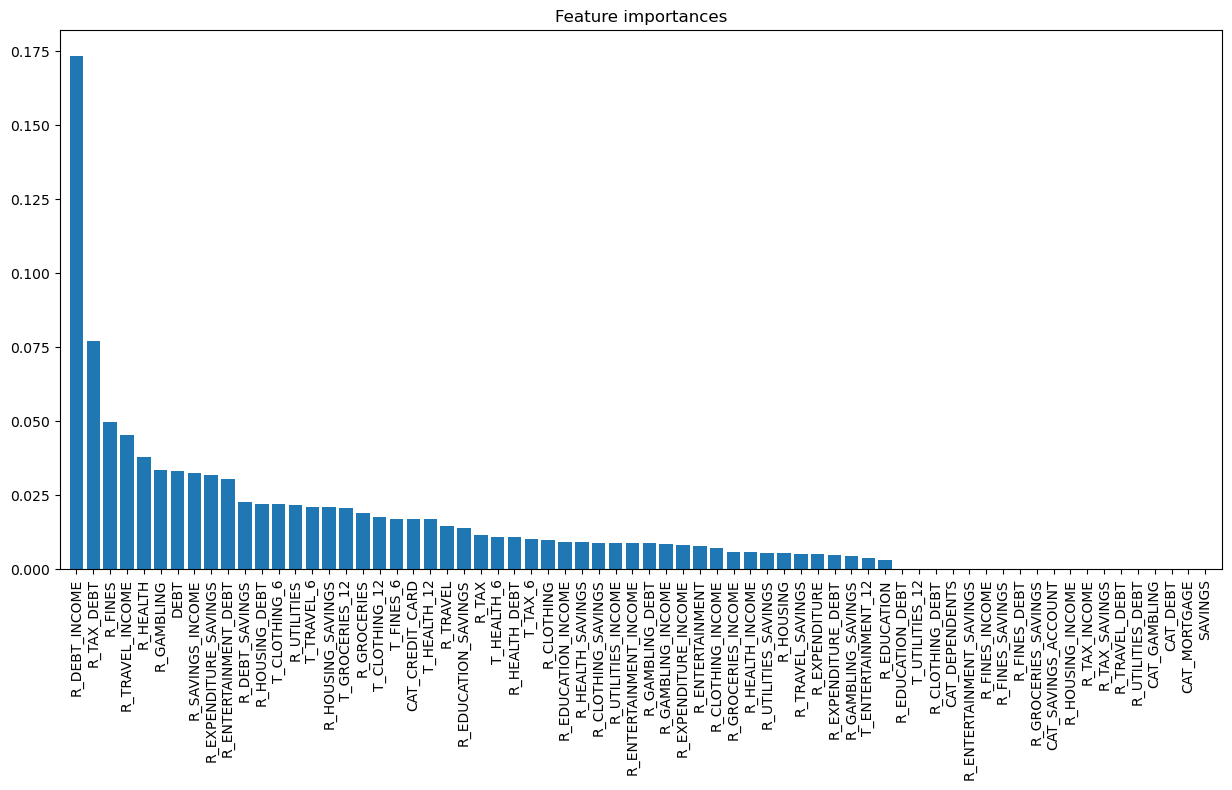

In [127]:
# feature importance
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

not_important = X_train.columns[indices][importances[indices]<0.001]

In [128]:
not_important

Index(['R_EDUCATION_DEBT', 'T_UTILITIES_12', 'R_CLOTHING_DEBT',
       'CAT_DEPENDENTS', 'R_ENTERTAINMENT_SAVINGS', 'R_FINES_INCOME',
       'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GROCERIES_SAVINGS',
       'CAT_SAVINGS_ACCOUNT', 'R_HOUSING_INCOME', 'R_TAX_INCOME',
       'R_TAX_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES_DEBT', 'CAT_GAMBLING',
       'CAT_DEBT', 'CAT_MORTGAGE', 'SAVINGS'],
      dtype='object')

24 estimators and learning rate 0.11 give the best results yet

In [132]:
X_train = copy.deepcopy(train)
X_train.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
X_train = X_train.drop(['R_EDUCATION_DEBT', 'T_UTILITIES_12', 'R_CLOTHING_DEBT',
       'CAT_DEPENDENTS', 'R_ENTERTAINMENT_SAVINGS', 'R_FINES_INCOME',
       'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GROCERIES_SAVINGS',
       'CAT_SAVINGS_ACCOUNT', 'R_HOUSING_INCOME', 'R_TAX_INCOME',
       'R_TAX_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES_DEBT', 'CAT_GAMBLING',
       'CAT_DEBT', 'CAT_MORTGAGE', 'SAVINGS', 'R_UTILITIES_SAVINGS'], axis=1)
X_train = X_train.drop('DEFAULT', axis=1)
y_train = train['DEFAULT']

X_test = copy.deepcopy(test)
X_test.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
X_test = X_test.drop(['R_EDUCATION_DEBT', 'T_UTILITIES_12', 'R_CLOTHING_DEBT',
       'CAT_DEPENDENTS', 'R_ENTERTAINMENT_SAVINGS', 'R_FINES_INCOME',
       'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GROCERIES_SAVINGS',
       'CAT_SAVINGS_ACCOUNT', 'R_HOUSING_INCOME', 'R_TAX_INCOME',
       'R_TAX_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES_DEBT', 'CAT_GAMBLING',
       'CAT_DEBT', 'CAT_MORTGAGE', 'SAVINGS', 'R_UTILITIES_SAVINGS'], axis=1)
X_test = X_test.drop('DEFAULT', axis=1)
y_test = test['DEFAULT']

gb = GradientBoostingClassifier(n_estimators=24, random_state=42, learning_rate=0.11)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

#accuracy table
print(X_train.shape)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

(640, 48)
Accuracy:  0.79375
[[114   0]
 [ 33  13]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       114
           1       1.00      0.28      0.44        46

    accuracy                           0.79       160
   macro avg       0.89      0.64      0.66       160
weighted avg       0.84      0.79      0.75       160



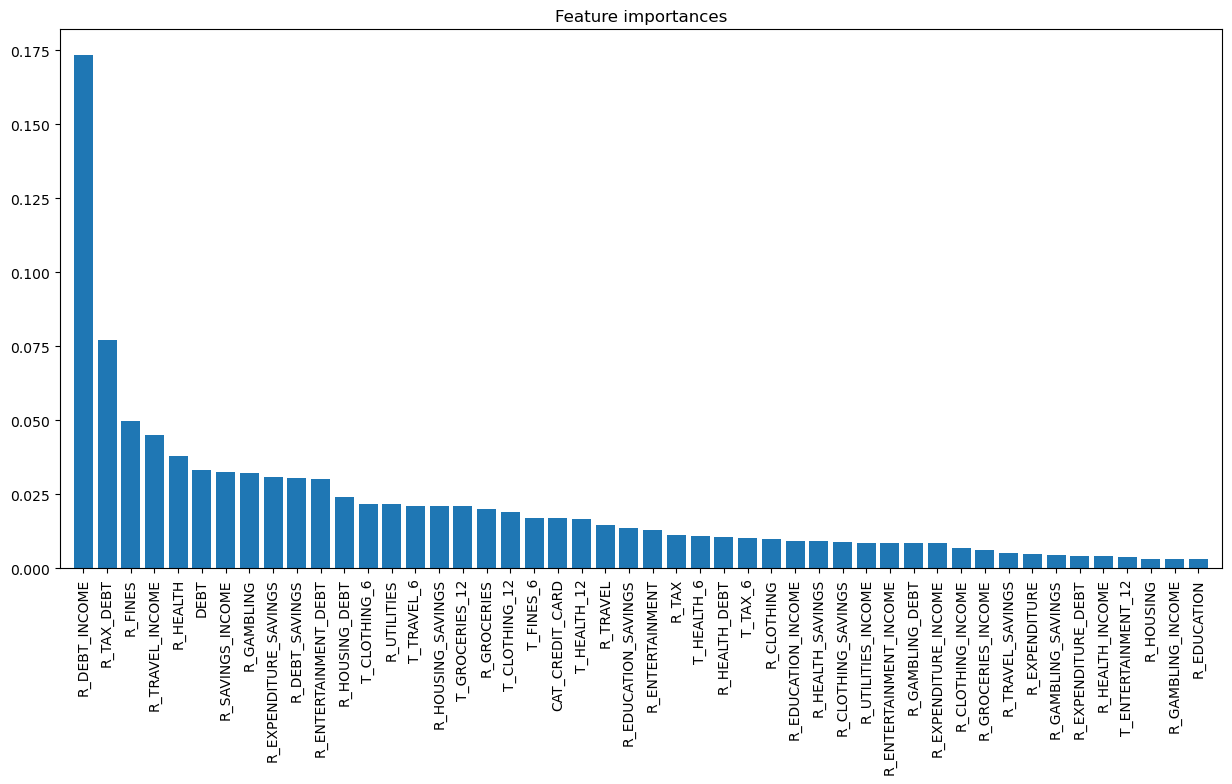

In [133]:
# feature importance
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

not_important = X_train.columns[indices][importances[indices]<0.001]

In [146]:
#Division T_EDUCATION_12, T_FINES_12, T_GAMBLING_12, T_HOUSING_12 has no sense, to many zeros and NaNs consequently we better drop them

X_train = copy.deepcopy(train)
X_train.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
X_train = X_train.drop(['R_EDUCATION_DEBT', 'T_UTILITIES_12', 'R_CLOTHING_DEBT',
       'CAT_DEPENDENTS', 'R_ENTERTAINMENT_SAVINGS', 'R_FINES_INCOME',
       'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GROCERIES_SAVINGS',
       'CAT_SAVINGS_ACCOUNT', 'R_HOUSING_INCOME', 'R_TAX_INCOME',
       'R_TAX_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES_DEBT', 'CAT_GAMBLING',
       'CAT_DEBT', 'CAT_MORTGAGE', 'SAVINGS', 'R_UTILITIES_SAVINGS','R_EDUCATION', 'R_HOUSING', 'R_TAX', 'R_TRAVEL'], axis=1)
X_train = X_train.drop('DEFAULT', axis=1)
y_train = train['DEFAULT']

X_test = copy.deepcopy(test)
X_test.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
X_test = X_test.drop(['R_EDUCATION_DEBT', 'T_UTILITIES_12', 'R_CLOTHING_DEBT',
       'CAT_DEPENDENTS', 'R_ENTERTAINMENT_SAVINGS', 'R_FINES_INCOME',
       'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GROCERIES_SAVINGS',
       'CAT_SAVINGS_ACCOUNT', 'R_HOUSING_INCOME', 'R_TAX_INCOME',
       'R_TAX_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES_DEBT', 'CAT_GAMBLING',
       'CAT_DEBT', 'CAT_MORTGAGE', 'SAVINGS', 'R_UTILITIES_SAVINGS', 'R_EDUCATION',  'R_HOUSING', 'R_TAX', 'R_TRAVEL'], axis=1)
X_test = X_test.drop('DEFAULT', axis=1)
y_test = test['DEFAULT']

gb = GradientBoostingClassifier(n_estimators=24, random_state=42, learning_rate=0.11)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

#accuracy table
print(X_train.shape)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

(640, 44)
Accuracy:  0.7625
[[110   4]
 [ 34  12]]
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       114
           1       0.75      0.26      0.39        46

    accuracy                           0.76       160
   macro avg       0.76      0.61      0.62       160
weighted avg       0.76      0.76      0.72       160



In [147]:
for i in range(1, 40, 1):
    X_train = copy.deepcopy(train)
    X_train.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
    X_train = X_train.drop(['R_EDUCATION_DEBT', 'T_UTILITIES_12', 'R_CLOTHING_DEBT',
        'CAT_DEPENDENTS', 'R_ENTERTAINMENT_SAVINGS', 'R_FINES_INCOME',
        'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GROCERIES_SAVINGS',
        'CAT_SAVINGS_ACCOUNT', 'R_HOUSING_INCOME', 'R_TAX_INCOME',
        'R_TAX_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES_DEBT', 'CAT_GAMBLING',
        'CAT_DEBT', 'CAT_MORTGAGE', 'SAVINGS', 'R_UTILITIES_SAVINGS','R_EDUCATION', 'R_FINES', 'R_GAMBLING', 'R_HOUSING'], axis=1)
    X_train = X_train.drop('DEFAULT', axis=1)
    y_train = train['DEFAULT']

    X_test = copy.deepcopy(test)
    X_test.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
    X_test = X_test.drop(['R_EDUCATION_DEBT', 'T_UTILITIES_12', 'R_CLOTHING_DEBT',
        'CAT_DEPENDENTS', 'R_ENTERTAINMENT_SAVINGS', 'R_FINES_INCOME',
        'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GROCERIES_SAVINGS',
        'CAT_SAVINGS_ACCOUNT', 'R_HOUSING_INCOME', 'R_TAX_INCOME',
        'R_TAX_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES_DEBT', 'CAT_GAMBLING',
        'CAT_DEBT', 'CAT_MORTGAGE', 'SAVINGS', 'R_UTILITIES_SAVINGS', 'R_EDUCATION', 'R_FINES', 'R_GAMBLING', 'R_HOUSING'], axis=1)
    X_test = X_test.drop('DEFAULT', axis=1)
    y_test = test['DEFAULT']

    gb = GradientBoostingClassifier(n_estimators=i, random_state=42, learning_rate=0.11)
    gb.fit(X_train, y_train)

    y_pred = gb.predict(X_test)

    #accuracy table
    print(i)
    print(X_train.shape)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

1
(640, 44)
Accuracy:  0.7125
[[114   0]
 [ 46   0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       114
           1       0.00      0.00      0.00        46

    accuracy                           0.71       160
   macro avg       0.36      0.50      0.42       160
weighted avg       0.51      0.71      0.59       160

2
(640, 44)
Accuracy:  0.7125
[[114   0]
 [ 46   0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       114
           1       0.00      0.00      0.00        46

    accuracy                           0.71       160
   macro avg       0.36      0.50      0.42       160
weighted avg       0.51      0.71      0.59       160

3
(640, 44)
Accuracy:  0.7125
[[114   0]
 [ 46   0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       114
           1       0.00      0.00      0.00        46

    accuracy           

/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

6
(640, 44)
Accuracy:  0.73125
[[113   1]
 [ 42   4]]
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       114
           1       0.80      0.09      0.16        46

    accuracy                           0.73       160
   macro avg       0.76      0.54      0.50       160
weighted avg       0.75      0.73      0.64       160

7
(640, 44)
Accuracy:  0.74375
[[113   1]
 [ 40   6]]
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       114
           1       0.86      0.13      0.23        46

    accuracy                           0.74       160
   macro avg       0.80      0.56      0.54       160
weighted avg       0.77      0.74      0.67       160

8
(640, 44)
Accuracy:  0.74375
[[113   1]
 [ 40   6]]
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       114
           1       0.86      0.13      0.23        46

    accuracy        

In [148]:
for i in range(15, 20, 1):
    X_train = copy.deepcopy(train)
    X_train.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
    X_train = X_train.drop(['R_EDUCATION_DEBT', 'T_UTILITIES_12', 'R_CLOTHING_DEBT',
        'CAT_DEPENDENTS', 'R_ENTERTAINMENT_SAVINGS', 'R_FINES_INCOME',
        'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GROCERIES_SAVINGS',
        'CAT_SAVINGS_ACCOUNT', 'R_HOUSING_INCOME', 'R_TAX_INCOME',
        'R_TAX_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES_DEBT', 'CAT_GAMBLING',
        'CAT_DEBT', 'CAT_MORTGAGE', 'SAVINGS', 'R_UTILITIES_SAVINGS','R_EDUCATION', 'R_FINES', 'R_GAMBLING', 'R_HOUSING'], axis=1)
    X_train = X_train.drop('DEFAULT', axis=1)
    y_train = train['DEFAULT']

    X_test = copy.deepcopy(test)
    X_test.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
    X_test = X_test.drop(['R_EDUCATION_DEBT', 'T_UTILITIES_12', 'R_CLOTHING_DEBT',
        'CAT_DEPENDENTS', 'R_ENTERTAINMENT_SAVINGS', 'R_FINES_INCOME',
        'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GROCERIES_SAVINGS',
        'CAT_SAVINGS_ACCOUNT', 'R_HOUSING_INCOME', 'R_TAX_INCOME',
        'R_TAX_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES_DEBT', 'CAT_GAMBLING',
        'CAT_DEBT', 'CAT_MORTGAGE', 'SAVINGS', 'R_UTILITIES_SAVINGS', 'R_EDUCATION', 'R_FINES', 'R_GAMBLING', 'R_HOUSING'], axis=1)
    X_test = X_test.drop('DEFAULT', axis=1)
    y_test = test['DEFAULT']

    gb = GradientBoostingClassifier(n_estimators=i, random_state=42, learning_rate=0.11)
    gb.fit(X_train, y_train)

    y_pred = gb.predict(X_test)

    #accuracy table
    print(i)
    print(X_train.shape)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

15
(640, 44)
Accuracy:  0.8
[[113   1]
 [ 31  15]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88       114
           1       0.94      0.33      0.48        46

    accuracy                           0.80       160
   macro avg       0.86      0.66      0.68       160
weighted avg       0.83      0.80      0.76       160

16
(640, 44)
Accuracy:  0.8
[[113   1]
 [ 31  15]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88       114
           1       0.94      0.33      0.48        46

    accuracy                           0.80       160
   macro avg       0.86      0.66      0.68       160
weighted avg       0.83      0.80      0.76       160

17
(640, 44)
Accuracy:  0.8
[[113   1]
 [ 31  15]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88       114
           1       0.94      0.33      0.48        46

    accuracy                 

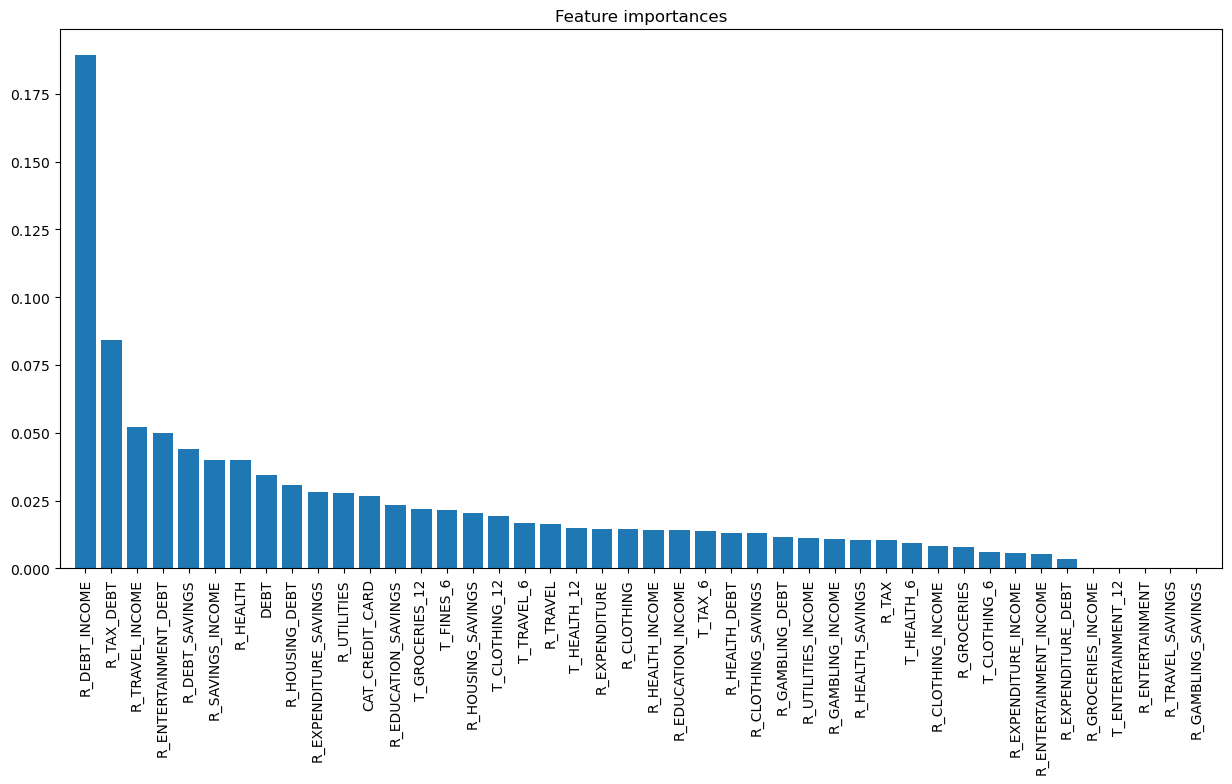

In [150]:
# feature importance
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

not_important = X_train.columns[indices][importances[indices]<0.001]

In [151]:
not_important

Index(['R_GROCERIES_INCOME', 'T_ENTERTAINMENT_12', 'R_ENTERTAINMENT',
       'R_TRAVEL_SAVINGS', 'R_GAMBLING_SAVINGS'],
      dtype='object')

In [149]:
#BEST RESULT IS with 15-19 estimators: 
#acuracy: 0.8

In [158]:
for i in range(15, 20, 1):
    X_train = copy.deepcopy(train)
    X_train.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
    X_train = X_train.drop(['R_EDUCATION_DEBT', 'T_UTILITIES_12', 'R_CLOTHING_DEBT',
        'CAT_DEPENDENTS', 'R_ENTERTAINMENT_SAVINGS', 'R_FINES_INCOME',
        'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GROCERIES_SAVINGS',
        'CAT_SAVINGS_ACCOUNT', 'R_HOUSING_INCOME', 'R_TAX_INCOME',
        'R_TAX_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES_DEBT', 'CAT_GAMBLING',
        'CAT_DEBT', 'CAT_MORTGAGE', 'SAVINGS', 'R_UTILITIES_SAVINGS','R_EDUCATION', 'R_FINES', 'R_GAMBLING', 'R_HOUSING', 'R_GROCERIES_INCOME', 'T_ENTERTAINMENT_12', 'R_ENTERTAINMENT',
       'R_TRAVEL_SAVINGS', 'R_GAMBLING_SAVINGS'], axis=1)
    X_train = X_train.drop('DEFAULT', axis=1)
    y_train = train['DEFAULT']

    X_test = copy.deepcopy(test)
    X_test.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
    X_test = X_test.drop(['R_EDUCATION_DEBT', 'T_UTILITIES_12', 'R_CLOTHING_DEBT',
        'CAT_DEPENDENTS', 'R_ENTERTAINMENT_SAVINGS', 'R_FINES_INCOME',
        'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GROCERIES_SAVINGS',
        'CAT_SAVINGS_ACCOUNT', 'R_HOUSING_INCOME', 'R_TAX_INCOME',
        'R_TAX_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES_DEBT', 'CAT_GAMBLING',
        'CAT_DEBT', 'CAT_MORTGAGE', 'SAVINGS', 'R_UTILITIES_SAVINGS', 'R_EDUCATION', 'R_FINES', 'R_GAMBLING', 'R_HOUSING', 'R_GROCERIES_INCOME', 'T_ENTERTAINMENT_12', 'R_ENTERTAINMENT',
       'R_TRAVEL_SAVINGS', 'R_GAMBLING_SAVINGS'], axis=1)
    X_test = X_test.drop('DEFAULT', axis=1)
    y_test = test['DEFAULT']

    gb = GradientBoostingClassifier(n_estimators=i, random_state=42, learning_rate=0.11)
    gb.fit(X_train, y_train)

    y_pred = gb.predict(X_test)

    #accuracy table
    print(i)
    print(X_train.shape)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

15
(640, 39)
Accuracy:  0.8
[[113   1]
 [ 31  15]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88       114
           1       0.94      0.33      0.48        46

    accuracy                           0.80       160
   macro avg       0.86      0.66      0.68       160
weighted avg       0.83      0.80      0.76       160

16
(640, 39)
Accuracy:  0.8
[[113   1]
 [ 31  15]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88       114
           1       0.94      0.33      0.48        46

    accuracy                           0.80       160
   macro avg       0.86      0.66      0.68       160
weighted avg       0.83      0.80      0.76       160

17
(640, 39)
Accuracy:  0.8
[[113   1]
 [ 31  15]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88       114
           1       0.94      0.33      0.48        46

    accuracy                 

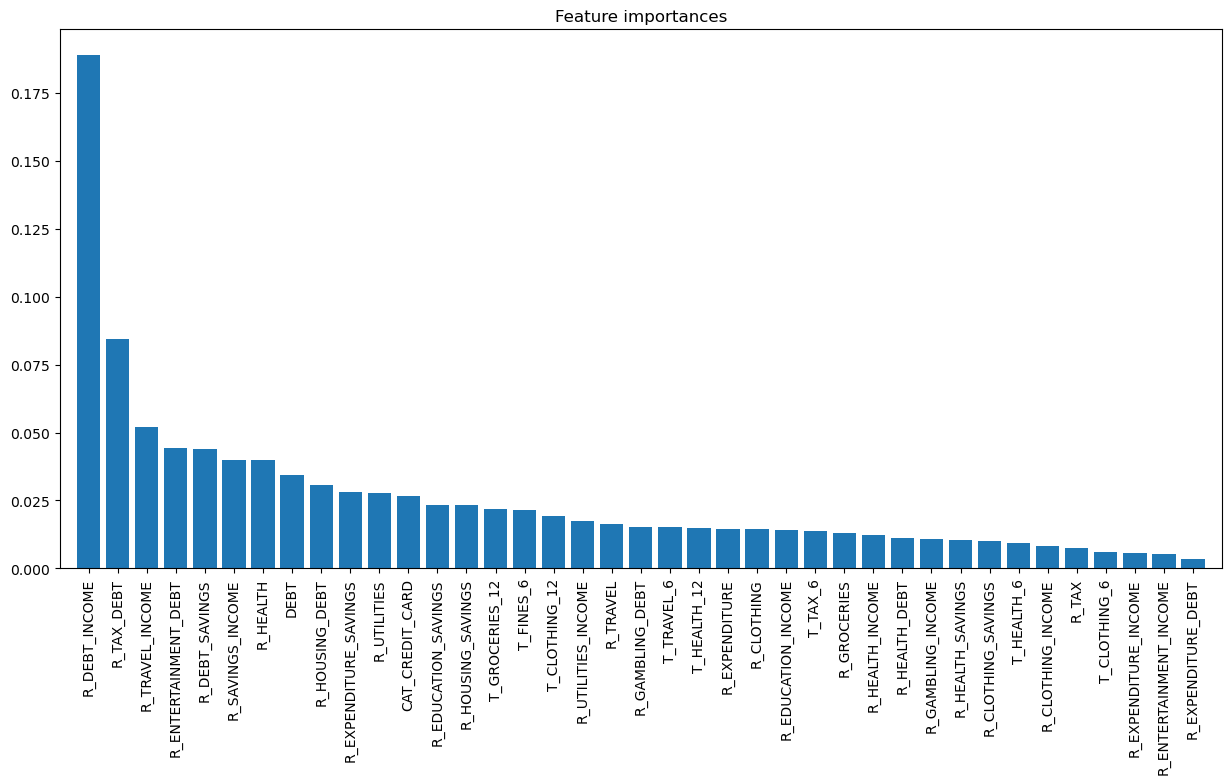

In [155]:
# feature importance
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

not_important = X_train.columns[indices][importances[indices]<0.001]

In [156]:
cor_matrix = X_train.corr().style.background_gradient(cmap='coolwarm').set_precision(4)
cor_matrix

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_62926/3720945833.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor_matrix = X_train.corr().style.background_gradient(cmap='coolwarm').set_precision(4)


,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,R_CLOTHING_SAVINGS,R_EDUCATION_INCOME,R_EDUCATION_SAVINGS,R_ENTERTAINMENT_INCOME,R_ENTERTAINMENT_DEBT,T_FINES_6,R_GAMBLING_INCOME,R_GAMBLING_DEBT,T_GROCERIES_12,R_GROCERIES,T_HEALTH_12,T_HEALTH_6,R_HEALTH,R_HEALTH_INCOME,R_HEALTH_SAVINGS,R_HEALTH_DEBT,R_HOUSING_SAVINGS,R_HOUSING_DEBT,T_TAX_6,R_TAX,R_TAX_DEBT,T_TRAVEL_6,R_TRAVEL,R_TRAVEL_INCOME,R_UTILITIES,R_UTILITIES_INCOME,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_CREDIT_CARD
DEBT,1.0000,-0.1849,0.4799,-0.0136,0.5255,0.4421,0.1098,-0.0148,-0.1088,0.0147,-0.0932,-0.3694,-0.2784,0.1114,0.0429,-0.1688,0.7236,0.1183,0.5885,0.5004,0.0457,-0.1920,-0.0589,-0.2605,-0.0316,-0.1957,0.6747,0.0193,-0.1668,0.5404,0.0411,-0.1608,0.0260,0.1175,0.0635,-0.4135,-0.2095,-0.3009,0.6458
R_SAVINGS_INCOME,-0.1849,1.0000,-0.2948,-0.2747,-0.2910,-0.2196,0.0193,-0.2788,-0.4076,-0.2216,-0.1877,-0.2395,0.2291,-0.0615,-0.2202,-0.0222,0.0200,0.0721,0.0997,0.0767,0.0189,0.6715,-0.3032,0.3865,-0.2260,0.2754,-0.2601,0.0101,0.0167,-0.1484,0.0216,-0.1100,0.0112,0.4392,0.0361,0.0476,-0.4135,0.2805,-0.1372
R_DEBT_INCOME,0.4799,-0.2948,1.0000,0.5323,0.0437,0.0274,-0.0216,0.0329,0.0566,0.2598,0.0863,-0.2722,-0.3459,0.0423,0.0550,-0.2048,0.2137,-0.0331,0.0115,0.0066,-0.0235,-0.2442,0.2243,-0.3265,0.1553,-0.2436,0.1168,0.0252,-0.2732,0.0311,-0.0246,-0.0820,0.0001,0.1135,-0.0298,-0.1074,0.0034,-0.3751,0.3162
R_DEBT_SAVINGS,-0.0136,-0.2747,0.5323,1.0000,-0.0934,-0.0698,-0.0057,0.0117,0.4093,0.1983,0.2886,-0.0377,-0.1238,0.0038,-0.0042,-0.0797,-0.1409,-0.0431,-0.1767,-0.1350,-0.0257,-0.1605,0.6775,-0.1263,0.4373,-0.0965,-0.1254,0.0131,-0.1186,-0.0749,-0.0038,0.1324,0.0115,-0.1139,-0.0387,0.0981,0.4454,-0.1415,0.0414
T_CLOTHING_12,0.5255,-0.2910,0.0437,-0.0934,1.0000,0.9180,0.2715,0.5312,0.1595,-0.1273,-0.1221,-0.2516,-0.1819,0.0679,0.1233,-0.0171,0.4939,0.2937,0.6387,0.6204,0.2165,-0.1601,0.0535,-0.2067,0.0059,-0.1596,0.7264,0.0257,0.0042,0.6399,0.1593,-0.1474,0.0155,-0.0305,0.2353,-0.4426,-0.1861,-0.2054,0.3551
T_CLOTHING_6,0.4421,-0.2196,0.0274,-0.0698,0.9180,1.0000,0.4881,0.4946,0.1487,-0.0938,-0.0899,-0.2201,-0.1479,0.0154,0.0479,-0.0291,0.4208,0.3968,0.6123,0.6566,0.2981,-0.0747,0.0824,-0.1517,-0.0062,-0.1234,0.5585,0.0208,-0.0087,0.6308,0.2620,-0.0886,0.0429,-0.0730,0.3872,-0.3311,-0.1382,-0.1552,0.3087
R_CLOTHING,0.1098,0.0193,-0.0216,-0.0057,0.2715,0.4881,1.0000,0.2079,0.0673,0.0301,0.0313,-0.0937,-0.0511,-0.0548,-0.0639,-0.0004,0.1267,0.5128,0.2733,0.3822,0.3944,0.1618,0.0666,0.0074,-0.0667,-0.0852,0.0306,-0.0395,-0.0283,0.3050,0.4796,0.0826,0.0072,-0.1227,0.6048,0.0030,-0.0244,-0.0107,0.0797
R_CLOTHING_INCOME,-0.0148,-0.2788,0.0329,0.0117,0.5312,0.4946,0.2079,1.0000,0.5018,-0.0264,-0.0339,0.0070,-0.0401,0.0207,0.1555,0.0357,-0.0725,0.2214,0.0265,0.1085,0.2403,-0.0459,0.2257,-0.1582,0.1471,-0.1650,0.0968,0.0171,0.0474,0.0579,0.1226,-0.2145,-0.0085,-0.0094,0.1639,-0.1395,-0.0771,-0.1381,-0.0055
R_CLOTHING_SAVINGS,-0.1088,-0.4076,0.0566,0.4093,0.1595,0.1487,0.0673,0.5018,1.0000,0.1329,0.3447,0.1833,0.0140,0.0347,0.1506,0.1549,-0.2004,0.0730,-0.1825,-0.1161,0.0958,-0.2427,0.7147,-0.1290,0.4249,-0.1017,-0.0886,0.0398,0.0453,-0.0509,0.0861,0.0325,0.0221,-0.2506,0.0691,0.1073,0.5443,-0.0673,-0.0709
R_EDUCATION_INCOME,0.0147,-0.2216,0.2598,0.1983,-0.1273,-0.0938,0.0301,-0.0264,0.1329,1.0000,0.5875,-0.0354,-0.1046,0.0229,-0.0038,-0.0484,0.0489,-0.0646,-0.1607,-0.1363,-0.0053,-0.2249,0.1755,-0.1424,-0.0165,-0.1203,-0.1342,0.0148,-0.0507,-0.1363,-0.0020,-0.1251,0.0282,-0.0665,-0.0439,0.0950,0.1638,-0.1099,0.0262


DROPPING T_CLOTHING_6

In [208]:
for i in range(15, 20, 1):
    X_train = copy.deepcopy(train)
    X_train.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
    X_train = X_train.drop(['R_EDUCATION_DEBT', 'T_UTILITIES_12', 'R_CLOTHING_DEBT',
        'CAT_DEPENDENTS', 'R_ENTERTAINMENT_SAVINGS', 'R_FINES_INCOME',
        'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GROCERIES_SAVINGS',
        'CAT_SAVINGS_ACCOUNT', 'R_HOUSING_INCOME', 'R_TAX_INCOME',
        'R_TAX_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES_DEBT', 'CAT_GAMBLING',
        'CAT_DEBT', 'CAT_MORTGAGE', 'SAVINGS', 'R_UTILITIES_SAVINGS','R_EDUCATION', 'R_FINES', 'R_GAMBLING', 'R_HOUSING', 'R_GROCERIES_INCOME', 'T_ENTERTAINMENT_12', 'R_ENTERTAINMENT',
       'R_TRAVEL_SAVINGS', 'R_GAMBLING_SAVINGS', 'T_CLOTHING_6'], axis=1)
    X_train = X_train.drop('DEFAULT', axis=1)
    y_train = train['DEFAULT']

    X_test = copy.deepcopy(test)
    X_test.drop(['T_EDUCATION_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_EDUCATION_6','T_ENTERTAINMENT_6','T_GAMBLING_6','T_GROCERIES_6','T_HOUSING_6','T_EXPENDITURE_12', 'T_EXPENDITURE_6','R_GROCERIES_DEBT', 'INCOME', 'T_UTILITIES_6'], axis=1, inplace=True)
    X_test = X_test.drop(['R_EDUCATION_DEBT', 'T_UTILITIES_12', 'R_CLOTHING_DEBT',
        'CAT_DEPENDENTS', 'R_ENTERTAINMENT_SAVINGS', 'R_FINES_INCOME',
        'R_FINES_SAVINGS', 'R_FINES_DEBT', 'R_GROCERIES_SAVINGS',
        'CAT_SAVINGS_ACCOUNT', 'R_HOUSING_INCOME', 'R_TAX_INCOME',
        'R_TAX_SAVINGS', 'R_TRAVEL_DEBT', 'R_UTILITIES_DEBT', 'CAT_GAMBLING',
        'CAT_DEBT', 'CAT_MORTGAGE', 'SAVINGS', 'R_UTILITIES_SAVINGS', 'R_EDUCATION', 'R_FINES', 'R_GAMBLING', 'R_HOUSING', 'R_GROCERIES_INCOME', 'T_ENTERTAINMENT_12', 'R_ENTERTAINMENT',
       'R_TRAVEL_SAVINGS', 'R_GAMBLING_SAVINGS', 'T_CLOTHING_6'], axis=1)
    X_test = X_test.drop('DEFAULT', axis=1)
    y_test = test['DEFAULT']

    gb = GradientBoostingClassifier(n_estimators=i, random_state=42, learning_rate=0.11)
    gb.fit(X_train, y_train)

    y_pred = gb.predict(X_test)

    #accuracy table
    print(i)
    print(X_train.shape)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

15
(640, 38)
Accuracy:  0.8
[[113   1]
 [ 31  15]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88       114
           1       0.94      0.33      0.48        46

    accuracy                           0.80       160
   macro avg       0.86      0.66      0.68       160
weighted avg       0.83      0.80      0.76       160

16
(640, 38)
Accuracy:  0.8
[[113   1]
 [ 31  15]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88       114
           1       0.94      0.33      0.48        46

    accuracy                           0.80       160
   macro avg       0.86      0.66      0.68       160
weighted avg       0.83      0.80      0.76       160

17
(640, 38)
Accuracy:  0.8
[[113   1]
 [ 31  15]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88       114
           1       0.94      0.33      0.48        46

    accuracy                 

STILL OK

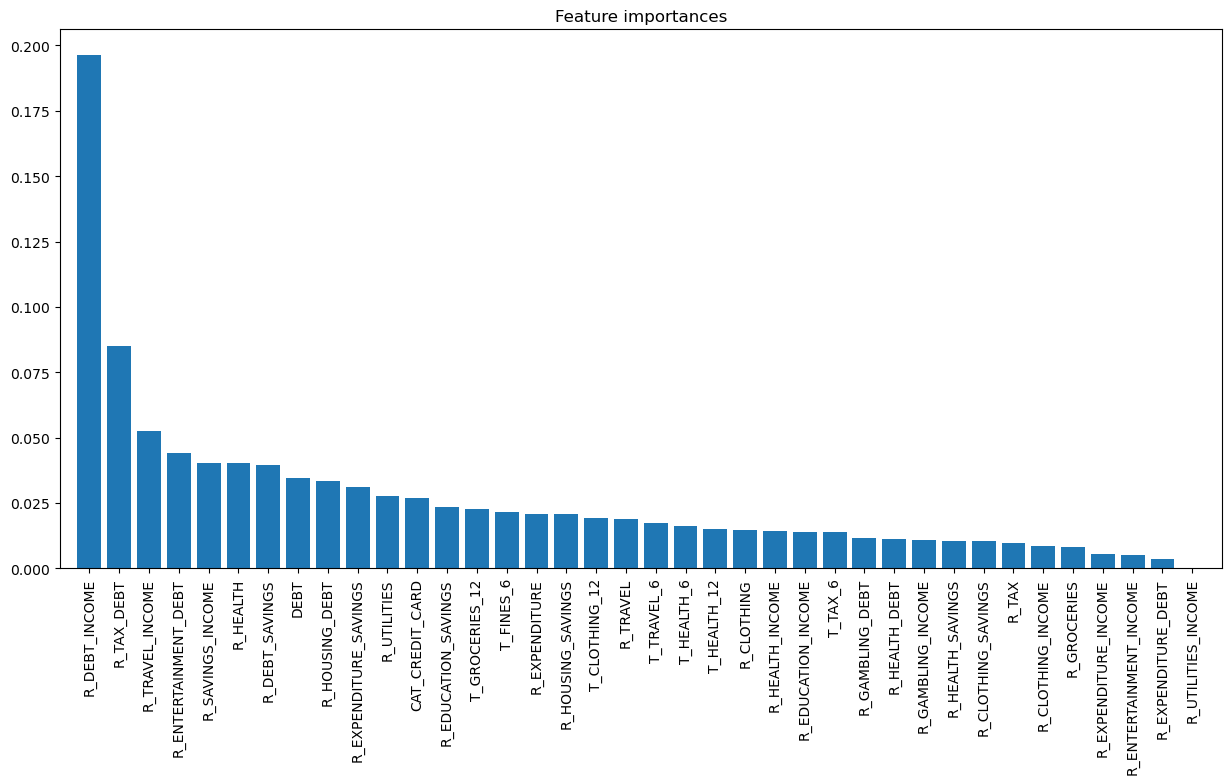

In [209]:
# feature importance
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

not_important = X_train.columns[indices][importances[indices]<0.001]

In [210]:
cor_matrix = X_train.corr().style.background_gradient(cmap='coolwarm').set_precision(4)
cor_matrix

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_62926/3720945833.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor_matrix = X_train.corr().style.background_gradient(cmap='coolwarm').set_precision(4)


,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,R_CLOTHING,R_CLOTHING_INCOME,R_CLOTHING_SAVINGS,R_EDUCATION_INCOME,R_EDUCATION_SAVINGS,R_ENTERTAINMENT_INCOME,R_ENTERTAINMENT_DEBT,T_FINES_6,R_GAMBLING_INCOME,R_GAMBLING_DEBT,T_GROCERIES_12,R_GROCERIES,T_HEALTH_12,T_HEALTH_6,R_HEALTH,R_HEALTH_INCOME,R_HEALTH_SAVINGS,R_HEALTH_DEBT,R_HOUSING_SAVINGS,R_HOUSING_DEBT,T_TAX_6,R_TAX,R_TAX_DEBT,T_TRAVEL_6,R_TRAVEL,R_TRAVEL_INCOME,R_UTILITIES,R_UTILITIES_INCOME,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_CREDIT_CARD
DEBT,1.0000,-0.1849,0.4799,-0.0136,0.5255,0.1098,-0.0148,-0.1088,0.0147,-0.0932,-0.3694,-0.2784,0.1114,0.0429,-0.1688,0.7236,0.1183,0.5885,0.5004,0.0457,-0.1920,-0.0589,-0.2605,-0.0316,-0.1957,0.6747,0.0193,-0.1668,0.5404,0.0411,-0.1608,0.0260,0.1175,0.0635,-0.4135,-0.2095,-0.3009,0.6458
R_SAVINGS_INCOME,-0.1849,1.0000,-0.2948,-0.2747,-0.2910,0.0193,-0.2788,-0.4076,-0.2216,-0.1877,-0.2395,0.2291,-0.0615,-0.2202,-0.0222,0.0200,0.0721,0.0997,0.0767,0.0189,0.6715,-0.3032,0.3865,-0.2260,0.2754,-0.2601,0.0101,0.0167,-0.1484,0.0216,-0.1100,0.0112,0.4392,0.0361,0.0476,-0.4135,0.2805,-0.1372
R_DEBT_INCOME,0.4799,-0.2948,1.0000,0.5323,0.0437,-0.0216,0.0329,0.0566,0.2598,0.0863,-0.2722,-0.3459,0.0423,0.0550,-0.2048,0.2137,-0.0331,0.0115,0.0066,-0.0235,-0.2442,0.2243,-0.3265,0.1553,-0.2436,0.1168,0.0252,-0.2732,0.0311,-0.0246,-0.0820,0.0001,0.1135,-0.0298,-0.1074,0.0034,-0.3751,0.3162
R_DEBT_SAVINGS,-0.0136,-0.2747,0.5323,1.0000,-0.0934,-0.0057,0.0117,0.4093,0.1983,0.2886,-0.0377,-0.1238,0.0038,-0.0042,-0.0797,-0.1409,-0.0431,-0.1767,-0.1350,-0.0257,-0.1605,0.6775,-0.1263,0.4373,-0.0965,-0.1254,0.0131,-0.1186,-0.0749,-0.0038,0.1324,0.0115,-0.1139,-0.0387,0.0981,0.4454,-0.1415,0.0414
T_CLOTHING_12,0.5255,-0.2910,0.0437,-0.0934,1.0000,0.2715,0.5312,0.1595,-0.1273,-0.1221,-0.2516,-0.1819,0.0679,0.1233,-0.0171,0.4939,0.2937,0.6387,0.6204,0.2165,-0.1601,0.0535,-0.2067,0.0059,-0.1596,0.7264,0.0257,0.0042,0.6399,0.1593,-0.1474,0.0155,-0.0305,0.2353,-0.4426,-0.1861,-0.2054,0.3551
R_CLOTHING,0.1098,0.0193,-0.0216,-0.0057,0.2715,1.0000,0.2079,0.0673,0.0301,0.0313,-0.0937,-0.0511,-0.0548,-0.0639,-0.0004,0.1267,0.5128,0.2733,0.3822,0.3944,0.1618,0.0666,0.0074,-0.0667,-0.0852,0.0306,-0.0395,-0.0283,0.3050,0.4796,0.0826,0.0072,-0.1227,0.6048,0.0030,-0.0244,-0.0107,0.0797
R_CLOTHING_INCOME,-0.0148,-0.2788,0.0329,0.0117,0.5312,0.2079,1.0000,0.5018,-0.0264,-0.0339,0.0070,-0.0401,0.0207,0.1555,0.0357,-0.0725,0.2214,0.0265,0.1085,0.2403,-0.0459,0.2257,-0.1582,0.1471,-0.1650,0.0968,0.0171,0.0474,0.0579,0.1226,-0.2145,-0.0085,-0.0094,0.1639,-0.1395,-0.0771,-0.1381,-0.0055
R_CLOTHING_SAVINGS,-0.1088,-0.4076,0.0566,0.4093,0.1595,0.0673,0.5018,1.0000,0.1329,0.3447,0.1833,0.0140,0.0347,0.1506,0.1549,-0.2004,0.0730,-0.1825,-0.1161,0.0958,-0.2427,0.7147,-0.1290,0.4249,-0.1017,-0.0886,0.0398,0.0453,-0.0509,0.0861,0.0325,0.0221,-0.2506,0.0691,0.1073,0.5443,-0.0673,-0.0709
R_EDUCATION_INCOME,0.0147,-0.2216,0.2598,0.1983,-0.1273,0.0301,-0.0264,0.1329,1.0000,0.5875,-0.0354,-0.1046,0.0229,-0.0038,-0.0484,0.0489,-0.0646,-0.1607,-0.1363,-0.0053,-0.2249,0.1755,-0.1424,-0.0165,-0.1203,-0.1342,0.0148,-0.0507,-0.1363,-0.0020,-0.1251,0.0282,-0.0665,-0.0439,0.0950,0.1638,-0.1099,0.0262
R_EDUCATION_SAVINGS,-0.0932,-0.1877,0.0863,0.2886,-0.1221,0.0313,-0.0339,0.3447,0.5875,1.0000,0.0648,-0.0061,-0.0166,-0.0154,-0.0315,-0.1285,-0.0198,-0.1665,-0.1298,0.0427,-0.1362,0.4504,-0.0539,0.0325,-0.0517,-0.1446,-0.0082,-0.0423,-0.1048,0.0797,-0.0032,0.0557,-0.1507,0.0035,0.1249,0.4278,-0.0189,-0.0366
